<a href="https://colab.research.google.com/github/kikiymini/7506R-1C2024-GRUPO02/blob/main/7506R_1C2024_GRUPO02_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>

#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Propiedades en venta</center>

### <center> Grupo 2</center>

## Integrantes:

*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


# Importación de librerias

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

from shapely import wkt
from shapely.geometry import MultiPolygon, Polygon, Point

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Lectura de archivo

### Desde google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/7506R-1C2024-GRUPO02/Dataset/properati_argentina_2021.csv'
barrios_file = '/content/drive/MyDrive/7506R-1C2024-GRUPO02/Dataset/barrios.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Desde maquina local

In [ ]:
# Si se esta trabajando en local, descomentar esta celta y comentar la de arriba
# file_path = './dataset/properati_argentina_2021.csv'
# barrios_file = './dataset/barrios.csv'
# df = pd.read_csv(file_path)

In [ ]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

# Análisis Exploratorio y Pre-procesamiento de Datos

En esta sección vamos a filtrar y seleccionar los datos a trabajar a lo largo del proyecto.




#### Filtrado

Se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

En la etapa de filtrado, vamos a utilizar la funcionalidad de `str.contains()` de pandas. Este código se basa en la documentación oficial de pandas que puedes encontrar en [este enlace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).


In [ ]:
# filtro por tipo de propiedad
# str.contains() se utiliza para buscar patrones de texto dentro de las cadenas en una serie.
# USD: indica el patrón que busco
# case: no distingue entre mayúsculas y minúsculas
# na: no registro valores NaN
filtro = df.property_type.str.contains('Casa|PH|Departamento',case=False,na=False)
ds_propiedades_filtradas = df[filtro]
ds_propiedades_filtradas = ds_propiedades_filtradas[~ds_propiedades_filtradas['property_type'].str.contains('Casa de campo')]

In [ ]:
# filtro propiedades en Capital Federal
filtro = ds_propiedades_filtradas.place_l2.str.contains('Capital Federal',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
# filtro propiedades en venta
filtro = ds_propiedades_filtradas.operation.str.contains('Venta',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
# filtro por moneda DÓLAR
filtro = ds_propiedades_filtradas.property_currency.str.contains('USD',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
# DataSet filtrado
ds_propiedades_filtradas.head()

id  start_date    end_date  created_on    latitud  \
25  CyZu6IaZgmQYGk8jmPajCg==  2021-09-09  2021-09-26  2021-09-09        NaN   
42  d3Z0MblSb2IMBoOBMGJEEQ==  2021-09-09  2021-09-26  2021-09-09 -34.637319   
43  rL7qPkQnomsMGu2ViS3sBw==  2021-09-09  2021-09-28  2021-09-09 -34.628647   
49  vuX/ccLAMVml4qWRFcOJUA==  2021-09-09  2022-01-05  2021-09-09 -34.610027   
51  ZTtSCeqZ3HUgf5jjwEzRcw==  2021-09-09  2022-03-09  2021-09-09 -34.631621   

     longitud         place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
25        NaN  Capital Federal      NaN      NaN      NaN       NaN     Venta   
42 -58.361124  Capital Federal     Boca      NaN      NaN       NaN     Venta   
43 -58.361871  Capital Federal     Boca      NaN      NaN       NaN     Venta   
49 -58.401934  Capital Federal     Once      NaN      NaN       NaN     Venta   
51 -58.416825  Capital Federal    Boedo      NaN      NaN       NaN     Venta   

   property_type  property_rooms  property_bedrooms  property_surface_total  \
25          Casa             4.0                3.0                   171.0   
42  Departamento             3.0                2.0                    58.0   
43  Departamento             4.0                3.0                    70.0   
49  Departamento             4.0                2.0                     NaN   
51            PH             4.0                2.0                     NaN   

    property_surface_covered  property_price property_currency  \
25                     133.0        210000.0               USD   
42                      55.0         82900.0               USD   
43                      70.0         99000.0               USD   
49                     104.0        146000.0               USD   
51                      73.0        250000.0               USD   

                                 property_title  
25  VENTA CASA LLAVE EN MANO - COSTA ESMERALDA   
42       VENTA TRES AMBIENTES LA BOCA PISO ALTO  
43   Departamento - 4 Ambientes - Catalinas Sur  
49          Venta departamento 4 ambientes Once  
51                                   PH - Boedo

#### Sets de entrenamiento y test

Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

En esta sección se utiliza el método `train_test_split()` de Scikit-learn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Este método es útil para evaluar el rendimiento de un modelo de aprendizaje automático.

El método `train_test_split()` se puede encontrar en la documentación oficial de Scikit-learn:

- [train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Documentación de train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
prop_train, prop_test = train_test_split(ds_propiedades_filtradas, train_size=0.8)
print("Propiedades para entrenar:", len(prop_train))
print("Propiedades para testear:", len(prop_test))

Propiedades para entrenar: 75399
Propiedades para testear: 18850


## Exploración Inicial

### Medidas de resumen de las variables cuantitativas del Dataset

In [ ]:
# Creo resumen con describe
prop_train_resumen = prop_train.describe()
# Agrego moda a la tabla resumen
prop_train_resumen.loc['mode'] = prop_train.mode().iloc[0]
prop_train_resumen


latitud      longitud  place_l6  property_rooms  \
count  72405.000000  72405.000000       0.0    74564.000000   
mean     -34.591785    -58.449187       NaN        2.820490   
std        0.177184      0.283083       NaN        1.420073   
min      -53.788624    -71.471192       NaN        1.000000   
25%      -34.616038    -58.466550       NaN        2.000000   
50%      -34.595878    -58.439040       NaN        3.000000   
75%      -34.577518    -58.408862       NaN        4.000000   
max      -24.219827    -54.133330       NaN       40.000000   
mode     -34.541250    -58.472966       NaN        3.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       66597.000000            71483.000000              72706.000000   
mean            2.014400              108.505015                 86.476563   
std             1.134249              944.437547                952.931998   
min            -1.000000               10.000000                  1.000000   
25%             1.000000               45.000000                 40.000000   
50%             2.000000               65.000000                 58.000000   
75%             3.000000              105.000000                 88.000000   
max            70.000000           137000.000000             217000.000000   
mode            1.000000               50.000000                 40.000000   

       property_price  
count    7.539900e+04  
mean     2.258344e+05  
std      3.121207e+05  
min      5.000000e+03  
25%      9.500000e+04  
50%      1.430000e+05  
75%      2.370000e+05  
max      1.200000e+07  
mode     1.100000e+05

En esta tabla resumen se pueden apreciar (en orden):

* El recuento de las entradas validas por atributo.
* El mean de cada atributo.
* La desviacion estandar.
* El valor minimo de cada atributo.
* El percentil 25.
* El percentil 50.
* El percentil 75.
* El valor maximo de cada atributo.
* La moda de cada atributo.

### Cantidad de valores posibles para cada variable cualitativo

In [ ]:
# Mostrar la cantidad de valores posibles para cada variable cualitativa
variables_cualitativas = [
    'property_type',
    'operation',
    'property_currency',
    'start_date',
    'end_date',
    'created_on',
    'place_l2',
    'place_l3',
    'place_l4',
    'place_l5',
    'place_l6',
    ]
prop_train[variables_cualitativas].nunique()

property_type          3
operation              1
property_currency      1
start_date           365
end_date             606
created_on           365
place_l2               1
place_l3              57
place_l4               4
place_l5               0
place_l6               0
dtype: int64

### Frecuencia de los valores posibles de variables cualitativas

En un grafico de barras se veran las frecuencias de los valores posibles para los atributos cualitativos mas importantes y donde hay mas de 1 alternativa, es decir no se tomara por ejemplo *place_l2* porque se sabe que por el filtro el 100% de los valores sera 'Capital Federal', asi mismo para *operation* que sera 'Venta' y *property_currency* que sera 'USD'.

* place_l3 (los 15 mas frecuentes)
* place_l4
* property_type

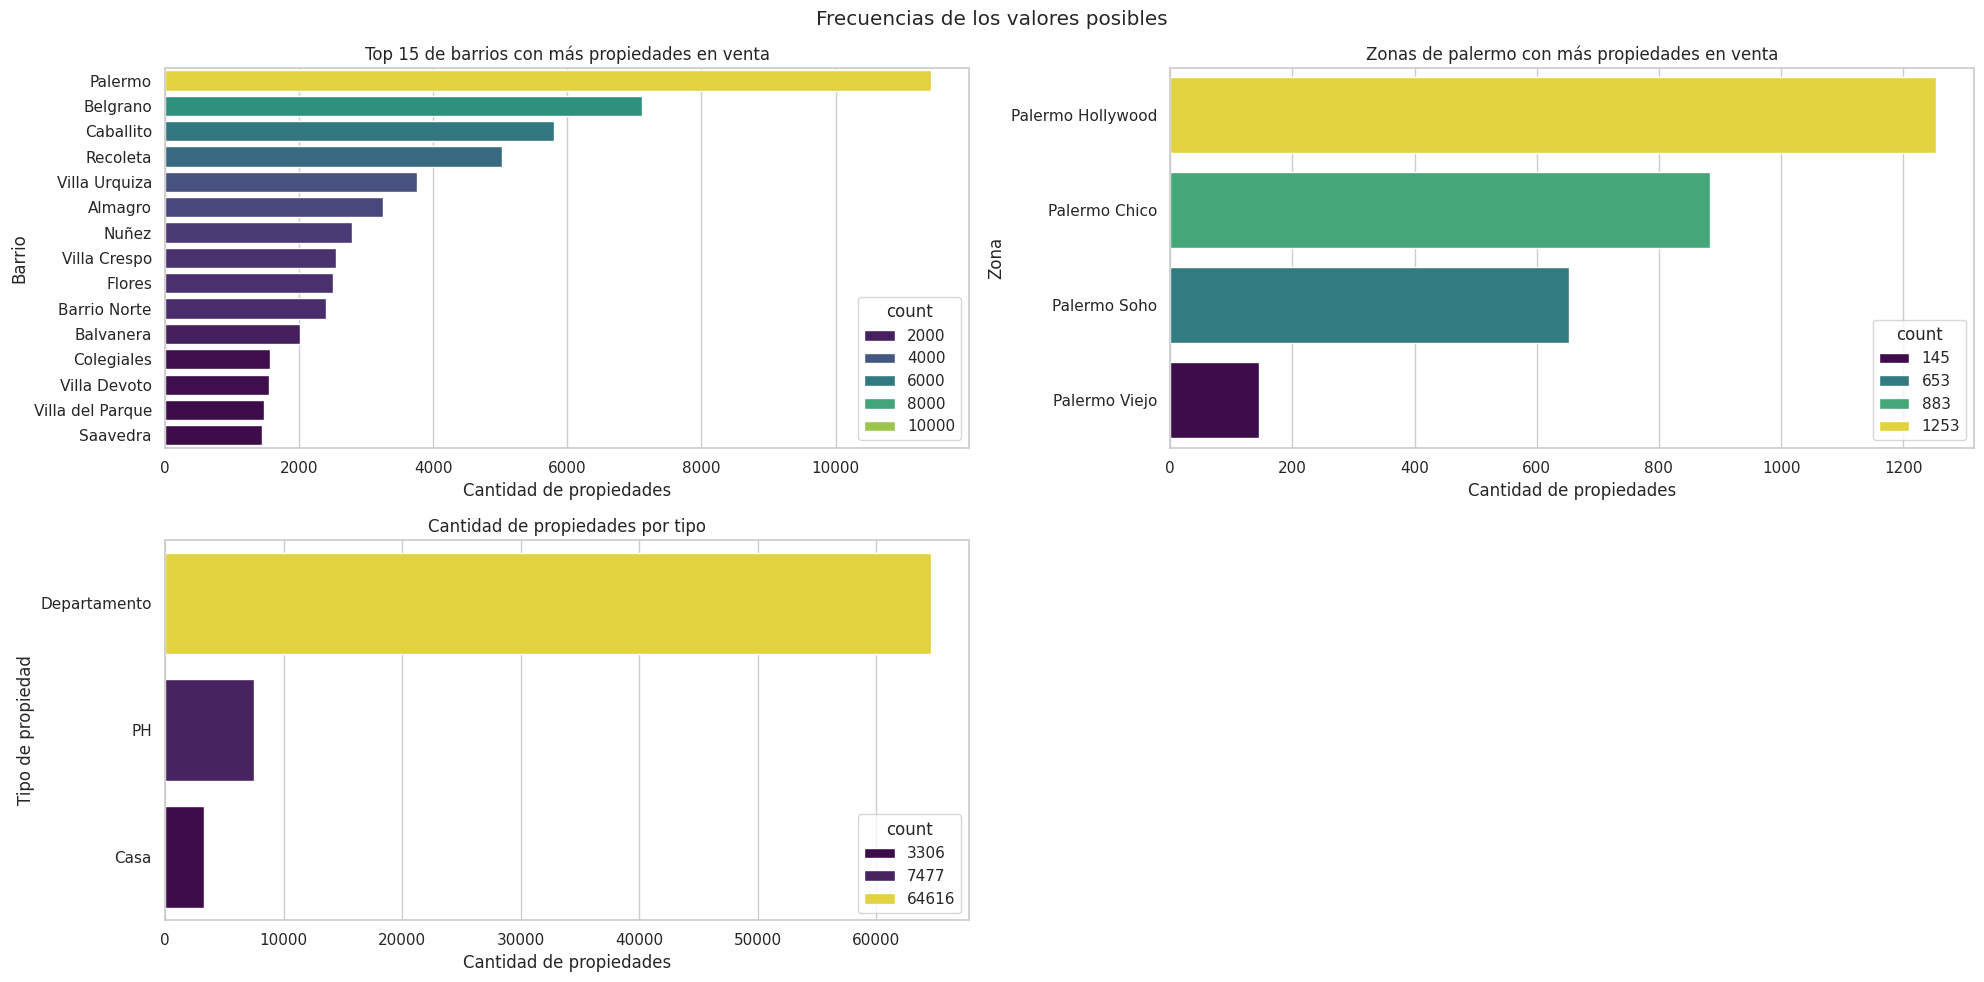

In [ ]:
plt.figure(figsize=(20, 10)) # 10x10 inches
plt.suptitle('Frecuencias de los valores posibles')

# bar plot por place_l3
plt.subplot(2, 2, 1) # 2 filas, 2 columnas, 1 posicion
frecuencias_place_3 = prop_train["place_l3"].value_counts().head(15)
sns.barplot(x=frecuencias_place_3.values, y=frecuencias_place_3.index, hue=frecuencias_place_3, palette='viridis')
plt.title('Top 15 de barrios con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Barrio')

# bar plot por place_l4
plt.subplot(2, 2, 2) # 2 filas, 2 columnas, 2 posicion
frecuencias_place_4 = prop_train["place_l4"].value_counts()
sns.barplot(x=frecuencias_place_4.values, y=frecuencias_place_4.index, hue=frecuencias_place_4, palette='viridis')
# Ya que los 4 valores posibles pertenecen a Palermo
plt.title('Zonas de palermo con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Zona')

# bar plot por property_type
plt.subplot(2, 2, 3) # 2 filas, 2 columnas, 3 posicion
frecuencias_property_type = prop_train["property_type"].value_counts()
sns.barplot(x=frecuencias_property_type.values, y=frecuencias_property_type.index, hue=frecuencias_property_type, palette='viridis')
plt.title('Cantidad de propiedades por tipo')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Tipo de propiedad')

plt.tight_layout()
plt.show()

*Anotacion: todos los place_l4 que no son NaN son zonas de palermo.*

### Variables irrelevantes para el analisis

Las variables que se pueden considerar irrelevantes para el analisis que se les dara son:

* **ID**: no aporta informacion para analizar, sin embargo puede ser util para propositos de manejo de datos.
* **Place_l2**: siempre son capital federal debido al primer filtro
* **Place_l5/l6**: no tienen ningun valor en ningun registro lo que los hace innecesarios.
* **Operation**: debido a el pre-procesamiento de los datos todos los registros tendran una operacion de venta, es decir que este atributo pasa a ser redundante.
* **Property_currency**: similarmente como pasa con *operation* pasa con este otro atributo, es un atributo redundante ya que todos seran USD.
* **Property_title**: no aporta informacion relevante al analisis.
* **Latitud/Longitud**: como ya se tiene el barrio de la propiedad en place_l2 esta informacion puede o no ser relevante dependiendo si se quiere ver la ubicacion exacta o si se quiere validar el barrio.
* **Variables de fechas (start/end/created)**: estas variables podrian ser utiles si se hace un analisis por ejemplo para ver cuales son las fechas donde mas ventas empiezan/terminan/se crean, de lo contrario no es relevante.

#### En sintesis

En base a lo anterior dicho se toma la decision de dejar de contar con los atributos:

* place_l2
* place_l5/l6 (se abordara en la seccion de datos faltantes)
* operation
* property_currency
* property title

In [ ]:
# Nuevo filtro para eliminar dichas columnas
columnas_a_eliminar = ['place_l2', 'operation', 'property_currency', 'property_title']
prop_train.drop(columns = columnas_a_eliminar,inplace=True)
prop_test.drop(columns = columnas_a_eliminar,inplace=True)

### Analisis grafico de distribucion de variables mas relevantes

* distribucion de precios
* distribucion de publicaciones por mes
* distribucion de habitaciones y dormitorios

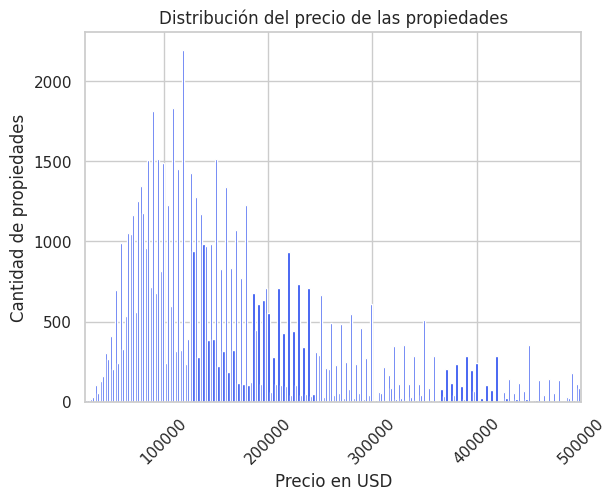

In [ ]:
# plot de distribucion de property_price

plt.hist(data=prop_train,x="property_price",bins=5000, color="#2348F0",rwidth=0.9)
plt.xlim(25000,500000)
plt.xlabel("Precio en USD")
plt.ylabel("Cantidad de propiedades")
plt.title("Distribución del precio de las propiedades")
plt.xticks(rotation=45)

plt.show()

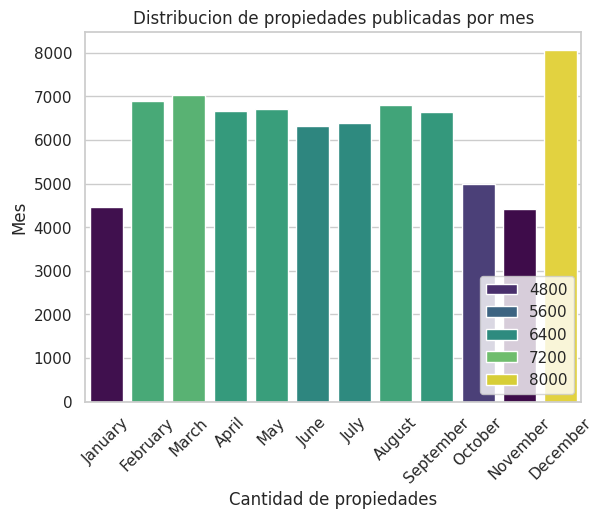

In [ ]:
# bar plot distribucion de ventas por mes

prop_train["created_on"] = pd.to_datetime(prop_train["created_on"])
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
frecuencias_mes = prop_train["created_on"].dt.month_name().value_counts().reindex(meses)
sns.barplot(x=frecuencias_mes.index, y=frecuencias_mes.values, hue=frecuencias_mes, palette='viridis')
plt.legend(loc='lower right')
plt.title('Distribucion de propiedades publicadas por mes')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Mes')
plt.xticks(rotation=45)

plt.show()

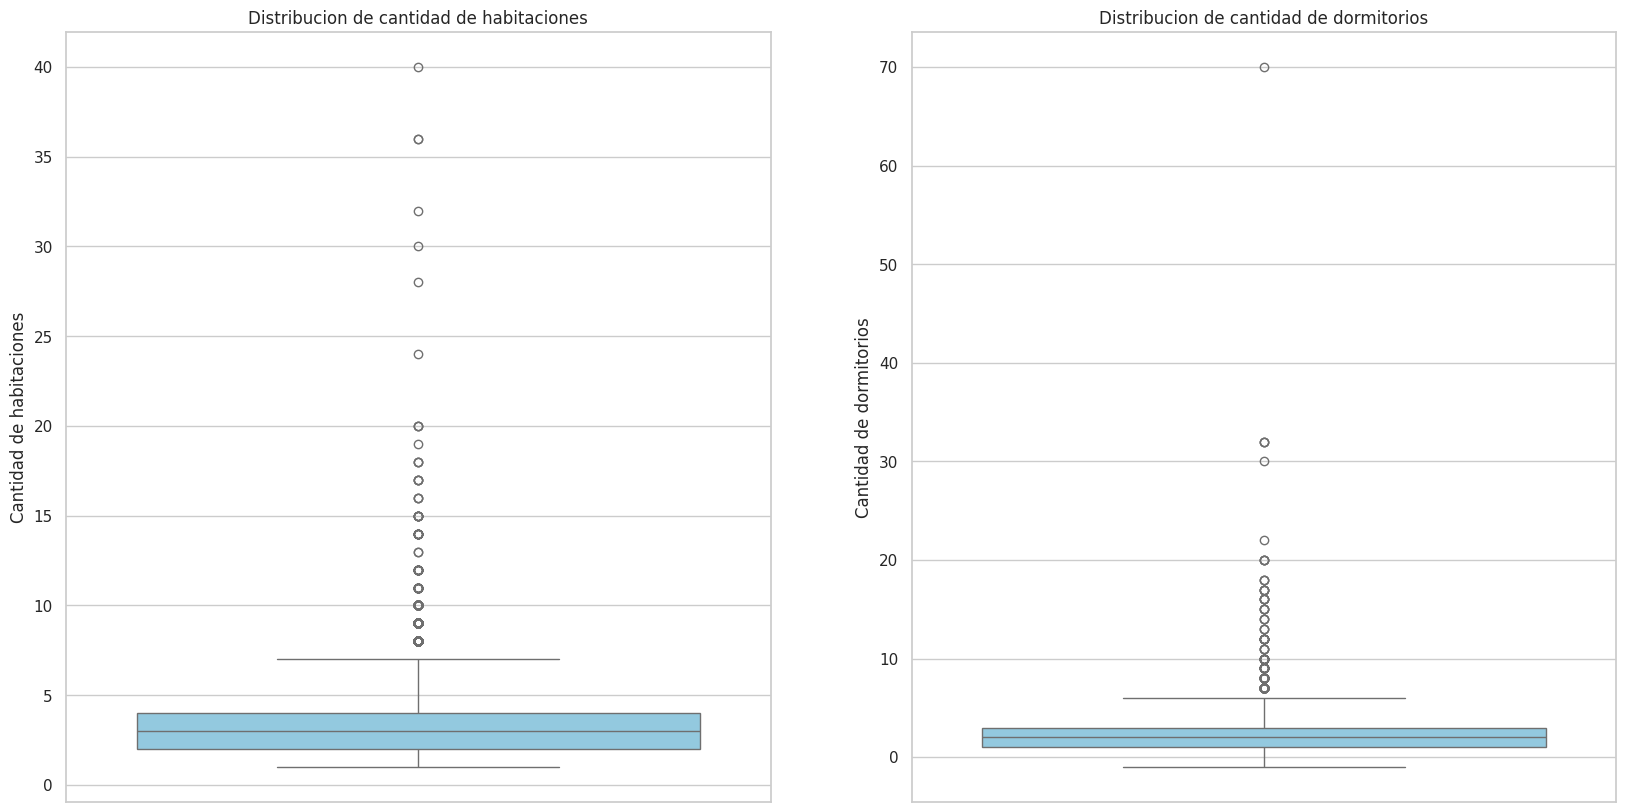

In [ ]:
# Boxplot de property_rooms y property_bedrooms
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, 1 posicion
sns.boxplot(data=prop_train, y='property_rooms', color='skyblue')
plt.title('Distribucion de cantidad de habitaciones')
plt.ylabel('Cantidad de habitaciones')

plt.subplot(1, 2, 2) # 1 fila, 2 columnas, 2 posicion
sns.boxplot(data=prop_train, y='property_bedrooms', color='skyblue')
plt.title('Distribucion de cantidad de dormitorios')
plt.ylabel('Cantidad de dormitorios')

plt.show()

### Analisis de correlaciones existentes entre variables

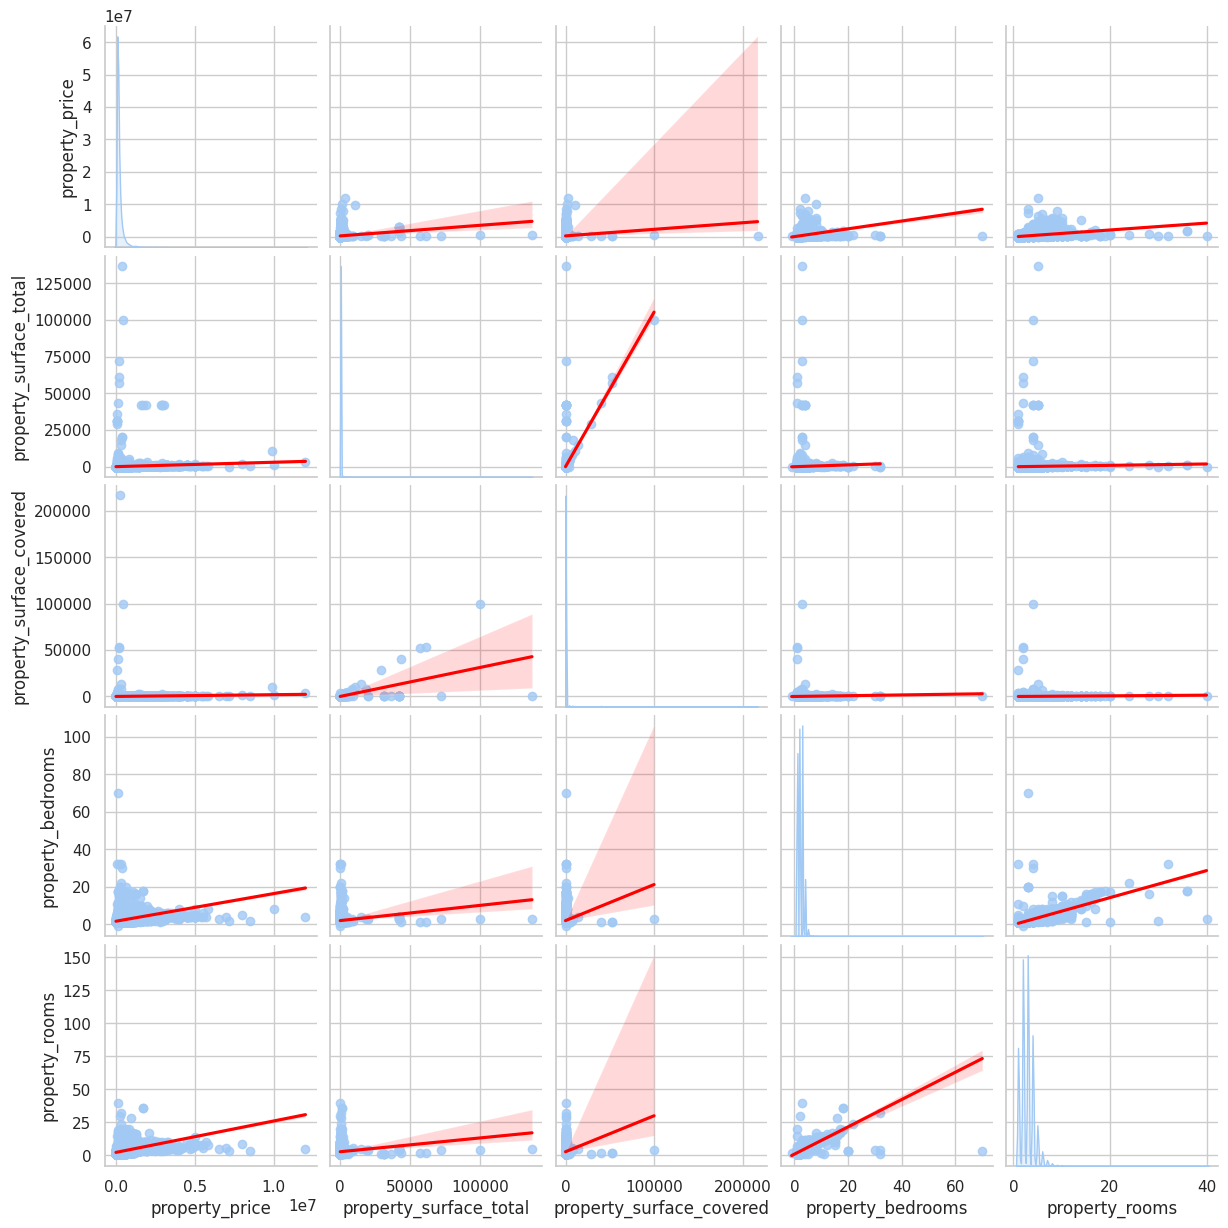

In [ ]:
# pairplot con price, surface_total, surface_covered, bedrooms, rooms
sns.pairplot(prop_train[['property_price', 'property_surface_total', 'property_surface_covered', 'property_bedrooms', 'property_rooms']], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

Observando este grafico de relaciones se pueden ver que algunas de estas variables tienen claramente una relacion y otras no tanto.

* La relacion entre la **superficie total** y **superficie cubierta** es lineal y acendente, es decir da la impresion que una dependiera de la otra, y si se piensa logicamente esto tiene sentido (si hay mas espacio se cubre mas espacio) aunque no siempre es necesariamente el caso (puede haber una casa pequeña en un terreno grande)
* La relacion entre el **precio** y la cantidad de **habitaciones** y **dormitorios**, en esta se puede notar que a mas habitaciones y/o dormitorios mas aumenta el maximo precio pero no deja de haber precios mas bajos, sin embargo, pasada una cierta cantidad (aproximadamente ~15) el precio deja de aumentar y mas bien se queda constante (entre los valores hasta ~250,000 USD)
* La relacion entre **habitaciones** y **dormitorios** tambien es lineal y acendente, lo cual puede deberse a que cuando una casa tiene muchas habitaciones esta probablemente tenga tambien muchos dormitorios.

*Extra: hay ciertos valores outliers que pueden afectar a la correlacion entre variables por ejemplo una propiedad con mas de 60 habitaciones, estos seran analizados en la seccion de valores atipicos*

Para hacer un analisis mas profundo de estos datos se analiza la *covarianza* y *correlacion* entre las variables usadas en la figura anterior:

In [ ]:
# covarianza y correlacion entre property_surface_total y property_surface_covered
covariance = prop_train['property_surface_total'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_surface_total'].corr(prop_train['property_surface_covered'])
print(f'Surface Total vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_rooms
covariance = prop_train['property_price'].cov(prop_train['property_rooms'])
correlation = prop_train['property_price'].corr(prop_train['property_rooms'])
print(f'Price vs Rooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_bedrooms
covariance = prop_train['property_price'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_price'].corr(prop_train['property_bedrooms'])
print(f'Price vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_total
covariance = prop_train['property_price'].cov(prop_train['property_surface_total'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_total'])
print(f'Price vs Surface Total\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_covered
covariance = prop_train['property_price'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_covered'])
print(f'Price vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre property_rooms y property_bedrooms
covariance = prop_train['property_rooms'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_rooms'].corr(prop_train['property_bedrooms'])
print(f'Rooms vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

Surface Total vs Surface Covered
Covariance: 289775.86 & Correlation: 0.57

Price vs Rooms
Covariance: 214371.90 & Correlation: 0.50

Price vs Bedrooms
Covariance: 155090.93 & Correlation: 0.42

Price vs Surface Total
Covariance: 29251828.41 & Correlation: 0.10

Price vs Surface Covered
Covariance: 18437306.27 & Correlation: 0.06

Rooms vs Bedrooms
Covariance: 1.30 & Correlation: 0.86



Esto nos dice que en efecto lo previamente observado era el caso. Tambien ahora gracias a este analisis se ve que las relaciones mas debiles son las dadas entre el precio y las superficies totales/cubiertas.

## Visualización de los datos

In [ ]:
# Crear una copia del DataFrame original prop_train
visu_prop_train = prop_train.copy()

# Aplicar el filtro por la columna 'property_rooms' < 6 en la copia
visu_prop_train = visu_prop_train[visu_prop_train['property_rooms'] < 6]

# Filtrar propiedades con precios entre 20,000 y 500,000
visu_prop_train = visu_prop_train[(visu_prop_train['property_price'] > 20000) &
                             (visu_prop_train['property_price'] < 500000)]

# Crear una tabla pivote para calcular el precio promedio por barrio y cantidad de habitaciones
df_visu = visu_prop_train.pivot_table(values='property_price',
                                      index='place_l3',
                                      columns='property_rooms',
                                      aggfunc='mean')

df_visu

#Modificamos un rango para que se vea mejor la visualizacion

property_rooms                  1.0            2.0            3.0  \
place_l3                                                            
Abasto                 70087.734694   90852.709091  122515.666667   
Agronomía              72605.111111  102686.913043  175018.000000   
Almagro                76577.106061   96519.716475  140561.226562   
Balvanera              65338.272727   77139.658163  117188.130094   
Barracas               87599.739130  108729.851528  156203.038217   
Barrio Norte           96748.671053  115604.223602  194606.205734   
Belgrano              102997.241337  145199.707087  216441.644767   
Boca                   63628.547619   68080.989011   92654.484211   
Boedo                  70301.264000   89528.596774  134288.729814   
Caballito              85319.757660  110596.881808  165562.662042   
Catalinas              47000.000000            NaN  129500.000000   
Centro / Microcentro   60147.500000   83327.777778  116466.666667   
Chacarita              84170.345588  109041.059880  178936.574324   
Coghlan                87207.695122  125118.692982  198521.966019   
Colegiales             89249.875000  129270.234136  191443.579186   
Congreso               65996.647059   81254.542373  117082.733871   
Constitución           59152.148515   67454.288462   93026.306122   
Flores                 71252.184426   91026.784345  133829.827020   
Floresta               67014.836066   86749.206642  131884.229391   
Las Cañitas           110000.000000  214857.142857            NaN   
Liniers                65554.720930   86703.016949  136778.134328   
Mataderos              67665.653846   90786.282258  134178.800995   
Monserrat              75546.158845   84466.375587  118170.687500   
Monte Castro           79019.021277   95876.042735  151250.398374   
Nuñez                 104392.185882  141439.705819  209696.866906   
Once                   52902.222222   76579.710145  116002.803738   
Palermo               105321.913101  148680.936479  237147.690289   
Parque Avellaneda      67164.285714   81572.413793  114225.000000   
Parque Centenario      80366.666667  100096.200000  144023.529412   
Parque Chacabuco       77669.767241   93882.085308  141253.141818   
Parque Chas            76738.958904  107130.569767  177021.571429   
Parque Patricios       65447.208333   91238.095238  109070.444444   
Paternal               76235.262500   90678.057554  126703.027523   
Pompeya                46627.272727   59966.636364   95518.181818   
Puerto Madero         245035.939759  335009.490506  398833.528090   
Recoleta               97592.642045  127579.159407  228086.835025   
Retiro                 92498.747312  101586.095238  184416.146789   
Saavedra               93543.692063  119699.232057  188238.360000   
San Cristobal          62145.951613   77812.647887  112803.912226   
San Nicolás            60459.129032   79502.510067  118976.597884   
San Telmo              79227.844068  104483.904762  138921.780731   
Tribunales             62274.222222   91200.000000  107532.791667   
Velez Sarsfield        68451.724138   92770.392157  145838.461538   
Versalles              76885.714286  107495.166667  150623.287671   
Villa Crespo           82188.351351  106292.091837  152445.970994   
Villa Devoto           91132.324561  113324.307888  180047.020561   
Villa General Mitre    69110.837209   85899.540816  133346.721311   
Villa Lugano           63979.000000   86150.967742   88559.959091   
Villa Luro             71844.444444   94559.496894  135228.266272   
Villa Ortuzar          79000.398148  100045.715084  183773.048387   
Villa Pueyrredón       80672.627273  110659.116505  159660.073333   
Villa Real             81200.000000  109187.500000  137591.666667   
Villa Riachuelo                 NaN   87750.000000   91700.000000   
Villa Santa Rita       77215.323077   98434.435294  141598.487603   
Villa Soldati                   NaN   67000.000000   87647.058824   
Villa Urquiza          91851.491420  124155.216867  190296.932633  

Text(70.93749999999999, 0.5, 'Zonas de Capital Federal')

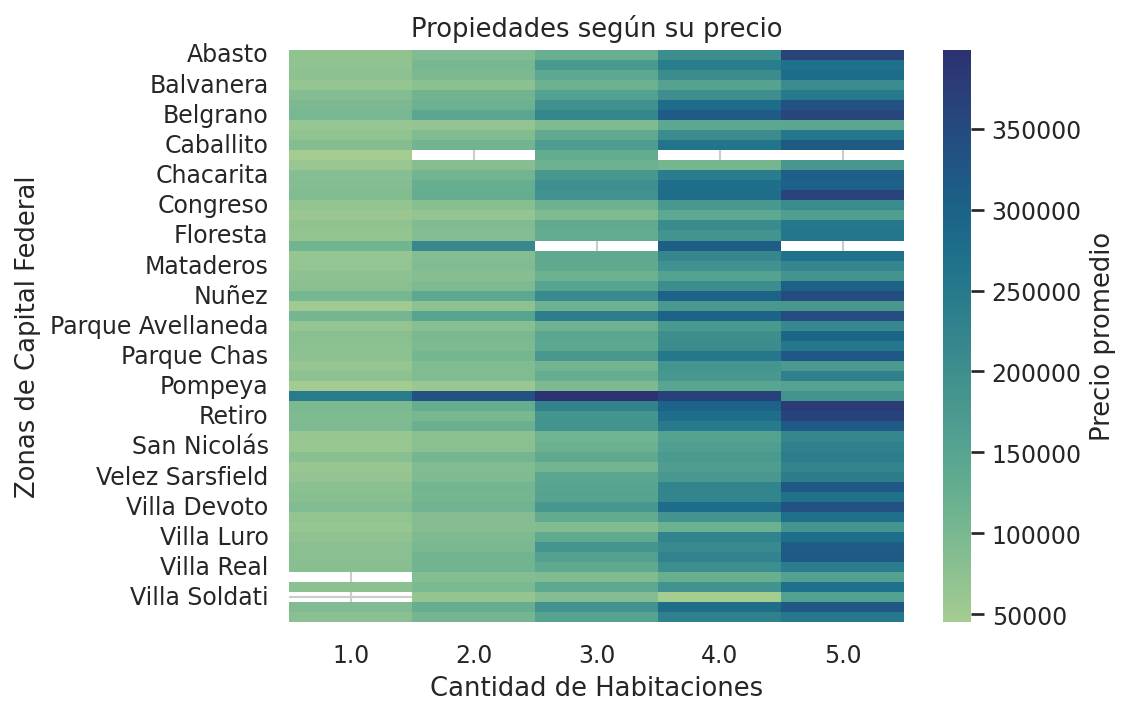

In [ ]:
# Nueva figura con un dpi de 155 para mejorar la calidad de la visualización
plt.figure(dpi=155)

# Establecer el título de la visualización
plt.title("Propiedades según su precio")

# Crear un heatmap utilizando Seaborn con los datos de df_visu
sns.heatmap(df_visu, square=False, cmap='crest', fmt=".0f", cbar_kws={'label': 'Precio promedio'})

# Establecer etiquetas para los ejes x e y
plt.xlabel("Cantidad de Habitaciones")
plt.ylabel("Zonas de Capital Federal")

# Heatmap que muestra el precio promedio por propiedad tomando en cuenta la cantidad de habitaciones y su ubicación

La visualización presentada es un mapa de calor (heatmap) que muestra el precio promedio de las propiedades en función de la cantidad de habitaciones y su ubicación en diferentes zonas de la Ciudad Autónoma de Buenos Aires (CABA). Al observar el heatmap, es posible identificar patrones en los precios según la ubicación y el tamaño de la propiedad. Por ejemplo, puede haber áreas donde las propiedades con más habitaciones tienden a tener precios más altos, mientras que en otras zonas los precios son más uniformes independientemente del tamaño de la propiedad.La visualización proporciona una manera efectiva de entender cómo se relacionan el precio promedio de las propiedades, la cantidad de habitaciones y la ubicación en diferentes áreas de la Ciudad Autónoma de Buenos Aires. Ayuda a los interesados a tomar decisiones informadas sobre la compra o inversión en propiedades en la ciudad.

<ipython-input-221-ee8e753002fe>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



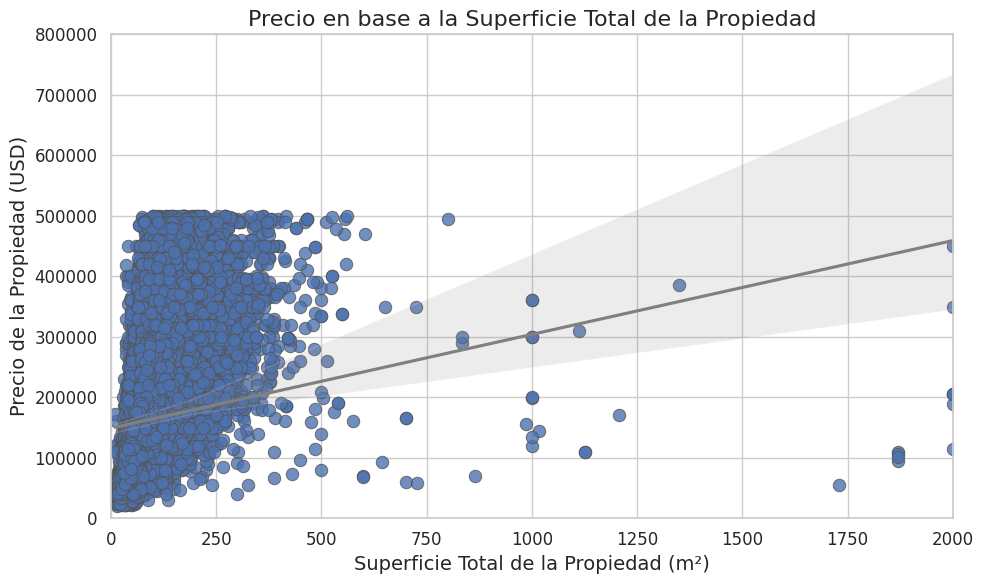

In [ ]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el scatter plot utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
                x='property_surface_total', y='property_price', palette='pastel', s=80, alpha=0.8)

# Agregar una línea de regresión
sns.regplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
            x='property_surface_total', y='property_price', scatter=False, color='gray')

# Ajustar título y etiquetas
plt.title('Precio en base a la Superficie Total de la Propiedad', fontsize=16)
plt.xlabel('Superficie Total de la Propiedad (m²)', fontsize=14)
plt.ylabel('Precio de la Propiedad (USD)', fontsize=14)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el rango de los ejes
plt.xlim(0, 2000)  # Establecer el rango x hasta 20,000
plt.ylim(0, 800000)
# Añadir sombreado alrededor de las burbujas
plt.gca().collections[0].set_edgecolor("#555555")

plt.tight_layout()
plt.show()

Esta visualización muestra un diagrama de dispersión (scatter plot) que relaciona el precio de la propiedad con su superficie total, con el agregado de una línea de regresión para visualizar la tendencia general de los datos.La línea de regresión trazada en el gráfico muestra la tendencia general de los datos. Permite ver si hay una relación lineal entre el precio y la superficie total de la propiedad. En este caso, la pendiente de la línea de regresión indica la tasa de cambio en el precio para cada unidad adicional de superficie.Cada punto en el diagrama de dispersión representa una propiedad individual, y su posición relativa en el gráfico indica su precio y superficie total. Esto facilita la identificación de propiedades que pueden estar por encima o por debajo de la tendencia general.

In [ ]:
# Calcular el precio promedio por barrio
precio_promedio_por_barrio = visu_prop_train.groupby('place_l3')['property_price'].mean().reset_index()

# Crear el gráfico de burbujas agrupadas
fig = px.scatter(precio_promedio_por_barrio,
                 x='place_l3', y='property_price',
                 size='property_price',
                 color='place_l3',
                 hover_name='place_l3',
                 size_max=50,
                 title='Precio promedio por barrio',
                 labels={'place_l3': 'Barrio', 'property_price': 'Precio promedio'})
fig.show()

Esta visualización muestra un gráfico de burbujas agrupadas que representa el precio promedio de las propiedades en cada barrio.El gráfico de burbujas agrupadas proporciona una representación visual del precio promedio de las propiedades en cada barrio de interés. Cada burbuja representa un barrio, y el tamaño de la burbuja indica el precio promedio de las propiedades en ese barrio. Los colores de las burbujas pueden indicar diferentes barrios para facilitar la identificación visual, las burbujas más grandes representan barrios con precios promedio más altos, mientras que las burbujas más pequeñas representan barrios con precios promedio más bajos.El gráfico de burbujas agrupadas es interactivo, lo que permite a los usuarios explorar los datos con mayor detalle al pasar el cursor sobre las burbujas para ver información adicional, como el nombre del barrio y el precio promedio.

In [ ]:
# Filtramos los Nan de latitud ya que es impresindible contar con este dato para asignarlo al mapa
visu_prop_train = visu_prop_train.dropna(subset=['latitud'])

def generar_mapa_con_registros_por_barrio(df):
    """
    Función para generar un mapa con los registros por barrio.

    Parámetros:
    - visu_prop_train: DataFrame que contiene los datos de las propiedades filtradas.

    Devuelve:
    - mapa: Objeto del mapa de Folium.
    """
    # Coordenadas del centro de la Ciudad Autónoma de Buenos Aires
    latitud_caba = -34.6037
    longitud_caba = -58.3816

    # Crear el mapa centrado en CABA
    mapa = folium.Map(location=[latitud_caba, longitud_caba], zoom_start=12)

    # Agregar un grupo de marcadores
    marker_cluster = MarkerCluster().add_to(mapa)

    # Contar la cantidad de registros por barrio
    registros_por_barrio = visu_prop_train['place_l3'].value_counts()

    # Agregar marcadores en el mapa para cada barrio
    for barrio, cantidad in registros_por_barrio.items():
        latitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['latitud'].iloc[0]
        longitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['longitud'].iloc[0]

        folium.Marker(location=[latitud, longitud],
                      tooltip=f"{barrio}: {cantidad} Propiedad en Venta").add_to(marker_cluster)

    return mapa

# Generar el mapa con los registros por barrio
mapa = generar_mapa_con_registros_por_barrio(visu_prop_train)

# Mostrar el mapa
mapa

La visualización proporciona un mapa interactivo que muestra la ubicación de las propiedades en venta en la Ciudad Autónoma de Buenos Aires (CABA), agrupadas por barrio.Cada marcador en el mapa representa una propiedad, y su ubicación específica está determinada por las coordenadas de latitud y longitud proporcionadas en los datos.Los grupos de marcadores en el mapa indican la concentración de propiedades en cada barrio, lo que puede proporcionar información sobre la popularidad y la demanda de viviendas en diferentes áreas de CABA.

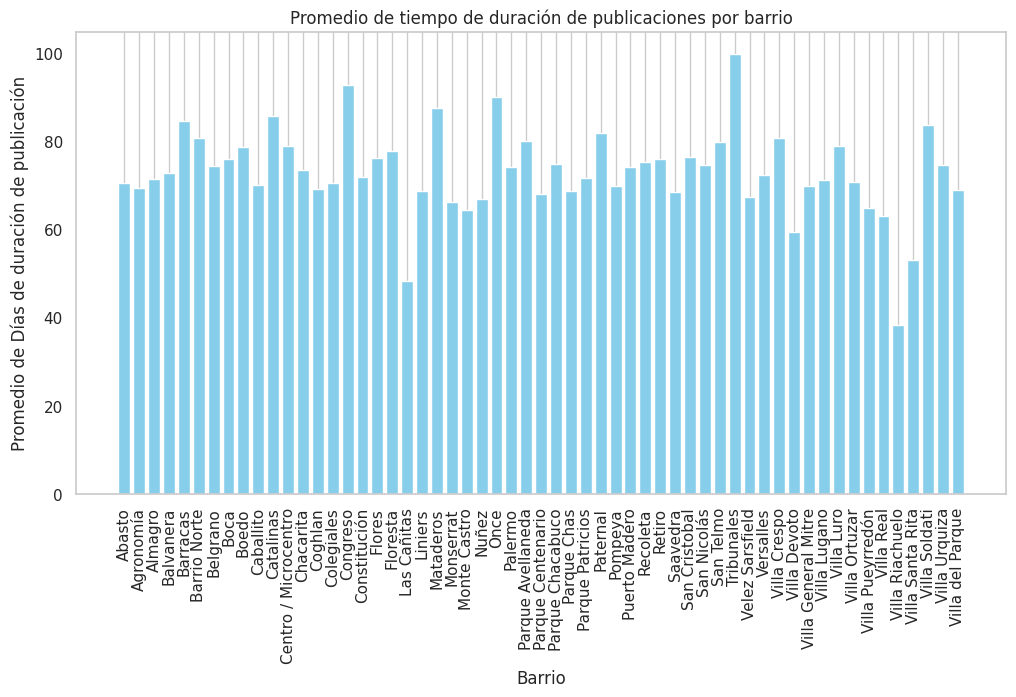

In [ ]:
# Convertir las fechas a tipo datetime si no están en ese formato
visu_prop_train['start_date'] = pd.to_datetime(visu_prop_train['start_date'], errors='coerce')
visu_prop_train['end_date'] = pd.to_datetime(visu_prop_train['end_date'], errors='coerce')

# Calcular la duración de cada publicación
visu_prop_train['duracion_publicacion'] = (visu_prop_train['end_date'] - visu_prop_train['start_date']).dt.days

# Agrupar por barrio y calcular el promedio de duración de las publicaciones
promedio_duracion_por_barrio = visu_prop_train.groupby('place_l3')['duracion_publicacion'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(promedio_duracion_por_barrio['place_l3'], promedio_duracion_por_barrio['duracion_publicacion'], color='skyblue')
plt.title('Promedio de tiempo de duración de publicaciones por barrio')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Días de duración de publicación')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()

Esta visualización presenta un gráfico de barras que muestra el promedio de tiempo de duración de las publicaciones por barrio en la Ciudad Autónoma de Buenos Aires (CABA). Cada barra en el gráfico representa un barrio específico, y su altura indica el promedio de días que las publicaciones permanecen activas en ese barrio.La visualización permite comparar fácilmente la duración promedio de las publicaciones entre diferentes barrios de la ciudad. Las barras más altas indican que las publicaciones en ese barrio tienden a permanecer activas por más tiempo, mientras que las barras más cortas indican una duración promedio más corta de las publicaciones.Los barrios con barras más altas pueden indicar áreas de la ciudad donde la demanda de propiedades es más alta o donde las propiedades tienden a permanecer en el mercado por períodos más prolongados. Esto puede ser útil para comprender las dinámicas del mercado inmobiliario en diferentes áreas de la ciudad.

## Datos Faltantes
En esta sección se va a realizar el análsis de la presencia de datos faltantes

### Análisis de datos faltantes a nivel columna

#### Análisis previo

In [ ]:
ds_train = prop_train
ds_test = prop_test

In [ ]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l3', 'place_l4', 'place_l5', 'place_l6', 'property_type',
       'property_rooms', 'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price'],
      dtype='object')

Para iniciar, vamos a analizar la cantidad de datos faltantes por columna y su porcentaje

In [ ]:
def obtener_filas(ds):
  return ds.shape[0]

def obtener_columnas(ds):
  return ds.shape[1]

In [ ]:
filas = obtener_filas(ds_train)
columnas = obtener_columnas(ds_train)
print("El dataset de entrenamiento tiene {} filas y {} columnas".format(filas,columnas))

El dataset de entrenamiento tiene 75399 filas y 16 columnas


Obtengo el porcentaje de cada columna que contiene datos nulos

In [ ]:
def obtener_promedio_nulos(ds):
  return ds.isna().sum() / obtener_filas(ds) * 100

promedio_datos_nulos = obtener_promedio_nulos(ds_train)
promedio_datos_nulos

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.970875
longitud                      3.970875
place_l3                      0.423083
place_l4                     96.108702
place_l5                    100.000000
place_l6                    100.000000
property_type                 0.000000
property_rooms                1.107442
property_bedrooms            11.673895
property_surface_total        5.193703
property_surface_covered      3.571665
property_price                0.000000
dtype: float64

Muestro la cantidad de datos nulos por columna

In [ ]:
def obtener_cantidad_nulos_ds(ds):
  return ds.isna().sum()

cant_datos_nulos = obtener_cantidad_nulos_ds(ds_train)
cant_datos_nulos

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                      2994
longitud                     2994
place_l3                      319
place_l4                    72465
place_l5                    75399
place_l6                    75399
property_type                   0
property_rooms                835
property_bedrooms            8802
property_surface_total       3916
property_surface_covered     2693
property_price                  0
dtype: int64

Grafico esta relación

<ipython-input-231-f848825aef01>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



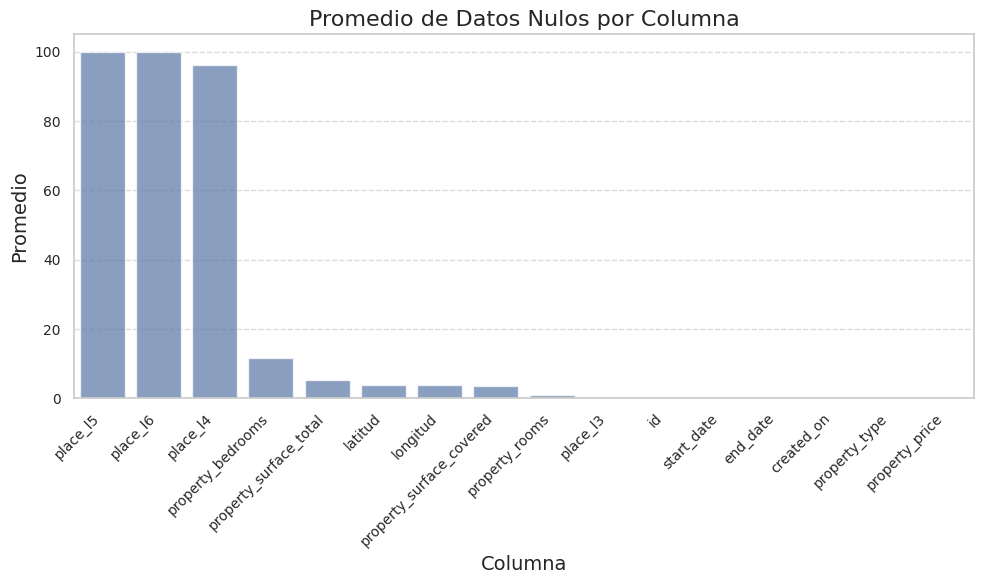

In [ ]:
ds_porcentaje = promedio_datos_nulos

# Ordenar los valores en orden descendente
ds_porcentaje = ds_porcentaje.sort_values(ascending = False)

# Establecer el estilo del gráfico
sns.set_style("whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el gráfico de barras
bar_plot = sns.barplot(x=ds_porcentaje.index, y=ds_porcentaje.values, alpha=0.7)

# Agregar título y etiquetas
bar_plot.set_title("Promedio de Datos Nulos por Columna", fontsize=16)
bar_plot.set_xlabel("Columna", fontsize=14)
bar_plot.set_ylabel("Promedio", fontsize=14)

# Rotar etiquetas del eje x para una mejor legibilidad
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Agregar líneas de la cuadrícula y ajustar el tamaño de la fuente
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Entonces los datos que debo analizar son:

In [ ]:
def obtener_cantidad_nulos(ds):
  promedio_datos_nulos = obtener_promedio_nulos(ds)
  promedio_datos_nulos.sort_values(ascending = False,inplace=True)
  filtro = promedio_datos_nulos!=0
  return promedio_datos_nulos[filtro] if not promedio_datos_nulos[filtro].empty else 'No existen valores NaN'

obtener_cantidad_nulos(ds_train)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.108702
property_bedrooms            11.673895
property_surface_total        5.193703
latitud                       3.970875
longitud                      3.970875
property_surface_covered      3.571665
property_rooms                1.107442
place_l3                      0.423083
dtype: float64

In [ ]:
obtener_cantidad_nulos(ds_test)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.238727
property_bedrooms            11.591512
property_surface_total        4.923077
latitud                       3.904509
longitud                      3.904509
property_surface_covered      3.506631
property_rooms                1.108753
place_l3                      0.519894
dtype: float64

#### Elimino places (place_l6, place_l5, place_l4)

Al ver el gráfico y el análisis previo de nulos. Puedo eliminar las columnas ```place_l6```, ```place_l5``` y ```place_l4```, pues tienen en su totalidad de datos nulos. El ```place_l4``` tiene casi su totalidad de nulos.

Consideramos que las columnas ```place_l6```, ```place_l5``` son datos faltantes de tipo MCAR

In [ ]:
columnas = ['place_l6','place_l5','place_l4']
ds_train.drop(columns=columnas, inplace=True)
ds_test.drop(columns=columnas, inplace=True)

In [ ]:
ds_train.head()

id  start_date    end_date created_on  \
383306  R0XtDXoFG7M4+e3GXz6/hw==  2021-04-27  2021-05-13 2021-04-27   
113494  paHtTc3maD9aa5logktjLQ==  2021-06-09  2022-06-03 2021-06-09   
235485  LHLKFOA3jnFpRfgyIZr1tg==  2021-06-02  2021-06-12 2021-06-02   
303208  HzdKVUadbgWKfr16PE84Ww==  2021-08-26  2021-11-03 2021-08-26   
201667  smr7cTzVTmuq599mjicjsQ==  2021-11-15  2021-12-28 2021-11-15   

          latitud   longitud      place_l3 property_type  property_rooms  \
383306 -34.603058 -58.507786  Villa Devoto  Departamento             3.0   
113494 -34.603988 -58.415864       Almagro  Departamento             1.0   
235485 -34.596416 -58.444260  Villa Crespo  Departamento             3.0   
303208 -34.600071 -58.436597  Villa Crespo  Departamento             2.0   
201667 -34.590463 -58.422436       Palermo  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
383306                2.0                   110.0                      93.0   
113494                1.0                    23.0                      23.0   
235485                2.0                    51.0                      50.0   
303208                1.0                    44.0                      40.0   
201667                1.0                    57.0                      53.0   

        property_price  
383306        260000.0  
113494         54900.0  
235485         68000.0  
303208         95000.0  
201667        199800.0

In [ ]:
ds_test.head()

id  start_date    end_date  created_on  \
287811  AOQLgdcClQNG1fUsCiqjXg==  2021-06-16  2022-02-09  2021-06-16   
94316   w6L88ErZmO6SXQatQxBtDA==  2021-09-24  2022-03-09  2021-09-24   
385682  pd8fQNOJgaXvxJgS9ZhRGg==  2021-02-10  2021-09-10  2021-02-10   
64651   DrnLHi/0rzfsH9+VIRRIVg==  2021-05-15  2021-08-31  2021-05-15   
67534   U0vrneBtSbBMxfbDtndNbQ==  2021-08-02  9999-12-31  2021-08-02   

          latitud   longitud           place_l3 property_type  property_rooms  \
287811 -34.648091 -58.489551  Parque Avellaneda  Departamento             3.0   
94316  -34.564090 -58.437373            Palermo  Departamento             3.0   
385682        NaN        NaN           Recoleta  Departamento             3.0   
64651  -34.636701 -58.454239             Flores            PH             3.0   
67534  -34.589101 -58.395191           Recoleta  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
287811                2.0                    59.0                      57.0   
94316                 2.0                   135.0                     100.0   
385682                2.0                   104.0                     100.0   
64651                 2.0                    93.0                      75.0   
67534                 3.0                   100.0                      90.0   

        property_price  
287811        123000.0  
94316         460000.0  
385682        345000.0  
64651         135000.0  
67534         350000.0

In [ ]:
nulos_preimputacion = obtener_cantidad_nulos(ds_train)

In [ ]:
obtener_cantidad_nulos(ds_test)

property_bedrooms           11.591512
property_surface_total       4.923077
latitud                      3.904509
longitud                     3.904509
property_surface_covered     3.506631
property_rooms               1.108753
place_l3                     0.519894
dtype: float64

#### Generar funciones para análisis

In [ ]:
# establezco si son o no nulos
def generar_ds_nulo(columnas):
  return ds_train[columnas].isna()

def filtrar_nulo(columna,ds):
  return ds[columna]==True

def filtrar_no_nulo(columna,ds):
  return ds[columna]==False

def aplicar_filtro(ds,filtro,columna,nulidad):
  ds.loc[filtro,columna] = nulidad
  return ds

In [ ]:
def contar_ds(ds,columna):
  return ds[columna].value_counts()

def imprimir_cantidades(nulos,no_nulos,columna):
  print("Cantidad de datos NULOS en {}: {}".format(columna,nulos))
  print("Cantidad de datos NO NULOS en {}: {}".format(columna,no_nulos))

In [ ]:
def generar_grafico(ds, columna):
    titulo = "Gráfico de barras: Cantidad de nulos en la variable " + columna
    ds[columna].value_counts().plot.bar(alpha=0.5, title=titulo, xlabel="tipo de dato", ylabel="cantidad de filas", fontsize=10)

#### Latitud y longitud
Vamos a anlizar los nulos de estas dos variables

In [ ]:
latatitud_longitud = generar_ds_nulo(['latitud','longitud'])
# filtros latitud
v_filtro_latitud = filtrar_nulo('latitud',latatitud_longitud)
f_filtro_latitud = filtrar_no_nulo('latitud',latatitud_longitud)
# filtros longitud
v_filtro_longitud = filtrar_nulo('longitud',latatitud_longitud)
f_filtro_longitud = filtrar_no_nulo('longitud',latatitud_longitud)
# aplico los filtros
latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_latitud,'latitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_latitud,'latitud','no nulo')

latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_longitud,'longitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_longitud,'longitud','no nulo')

latatitud_longitud.head()



latitud longitud
383306  no nulo  no nulo
113494  no nulo  no nulo
235485  no nulo  no nulo
303208  no nulo  no nulo
201667  no nulo  no nulo

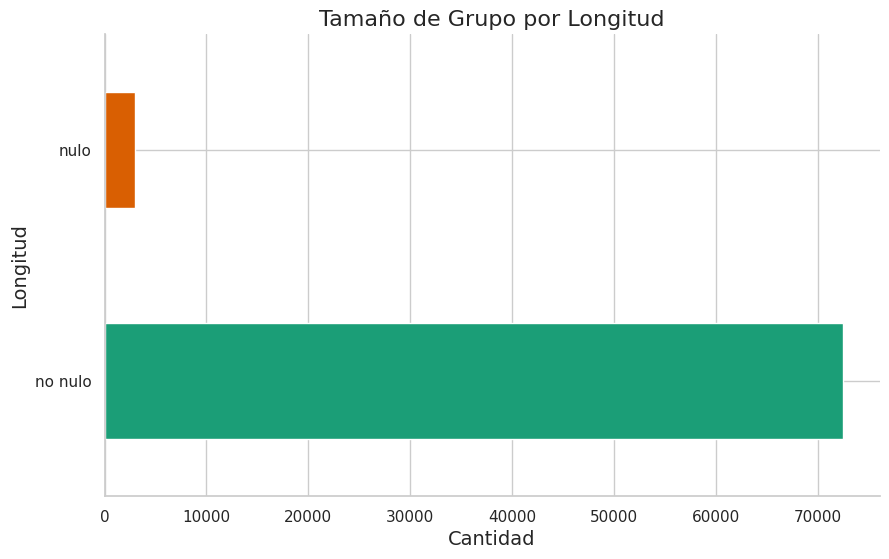

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Agrupar por 'longitud' y obtener el tamaño de cada grupo, luego trazar el gráfico de barras horizontales
latatitud_longitud.groupby('longitud').size().plot(kind='barh', color=sns.color_palette('Dark2'))

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Configurar el tamaño de la letra del título y las etiquetas
plt.title('Tamaño de Grupo por Longitud', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Longitud', fontsize=14)

# Mostrar el gráfico
plt.show()


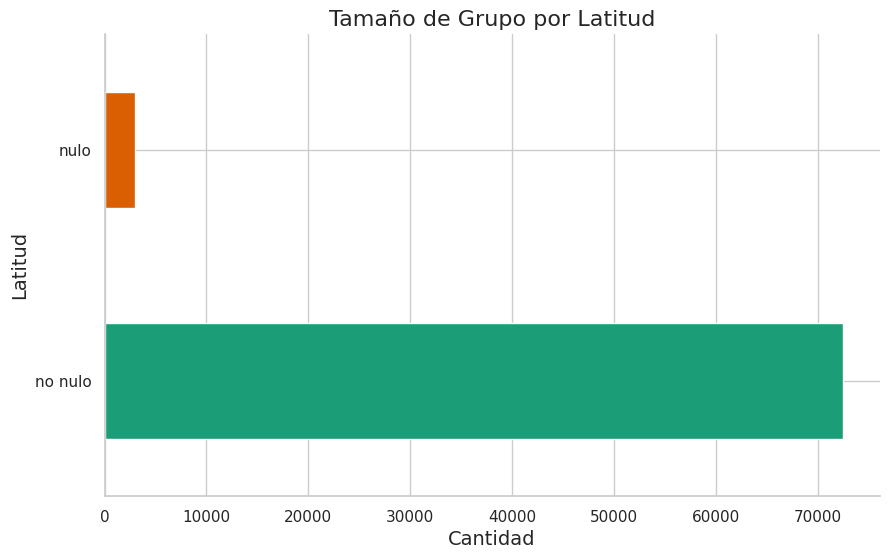

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Agrupar por 'latitud' y obtener el tamaño de cada grupo, luego trazar el gráfico de barras horizontales
latatitud_longitud.groupby('latitud').size().plot(kind='barh', color=sns.color_palette('Dark2'))

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Configurar el tamaño de la letra del título y las etiquetas
plt.title('Tamaño de Grupo por Latitud', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Latitud', fontsize=14)

# Mostrar el gráfico
plt.show()

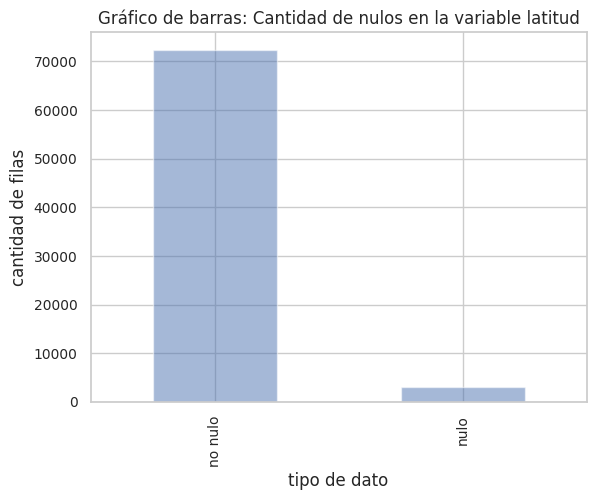

In [ ]:
generar_grafico(latatitud_longitud,'latitud')

In [ ]:
cant_nulos_longitud,cant_no_nulos_longitud = contar_ds(latatitud_longitud,'longitud')
imprimir_cantidades(cant_nulos_longitud,cant_no_nulos_longitud,'longitud')

Cantidad de datos NULOS en longitud: 72405
Cantidad de datos NO NULOS en longitud: 2994


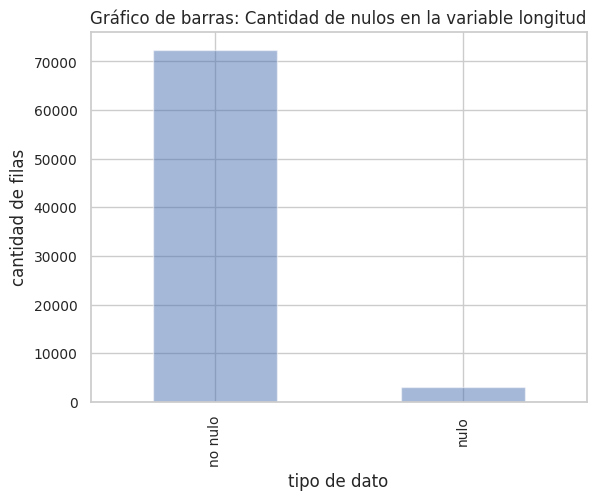

In [ ]:
generar_grafico(latatitud_longitud,'longitud')

#### Superficie total y Superficie cubierta (property_surface_total, property_surface_covered)

In [ ]:
# establezco si son o no nulos
sup_total_cubierta = generar_ds_nulo(['property_surface_total','property_surface_covered'])
# creo filtro si son o no nulos
v_filtro_total =  filtrar_nulo('property_surface_total',sup_total_cubierta)
f_filtro_total =  filtrar_no_nulo('property_surface_total',sup_total_cubierta)

v_filtro_cubierto =  filtrar_nulo('property_surface_covered',sup_total_cubierta)
f_filtro_cubierto =  filtrar_no_nulo('property_surface_covered',sup_total_cubierta)
# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_total,'property_surface_total','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_total,'property_surface_total','no nulo')

# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_cubierto,'property_surface_covered','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_cubierto,'property_surface_covered','no nulo')

sup_total_cubierta.head()

property_surface_total property_surface_covered
383306                no nulo                  no nulo
113494                no nulo                  no nulo
235485                no nulo                  no nulo
303208                no nulo                  no nulo
201667                no nulo                  no nulo

In [ ]:
cant_nulos_total, cant_no_nulos_total = contar_ds(sup_total_cubierta,'property_surface_total')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_surface_total')

Cantidad de datos NULOS en property_surface_total: 71483
Cantidad de datos NO NULOS en property_surface_total: 3916


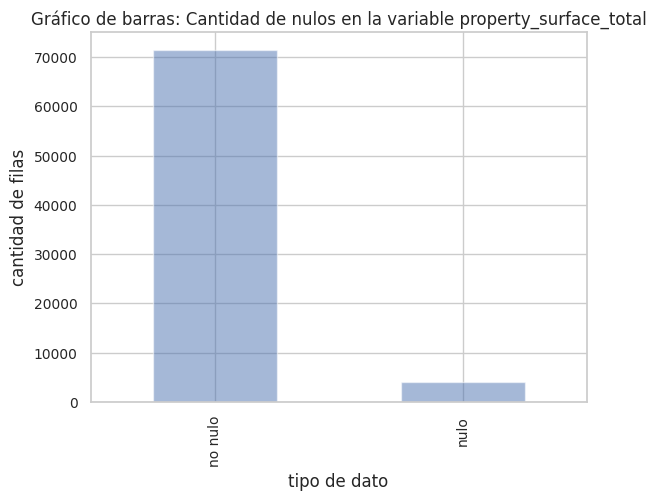

In [ ]:
generar_grafico(sup_total_cubierta,'property_surface_total')

In [ ]:
cant_nulos_total, cant_no_nulos_total = contar_ds(sup_total_cubierta,'property_surface_covered')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_surface_covered')

Cantidad de datos NULOS en property_surface_covered: 72706
Cantidad de datos NO NULOS en property_surface_covered: 2693


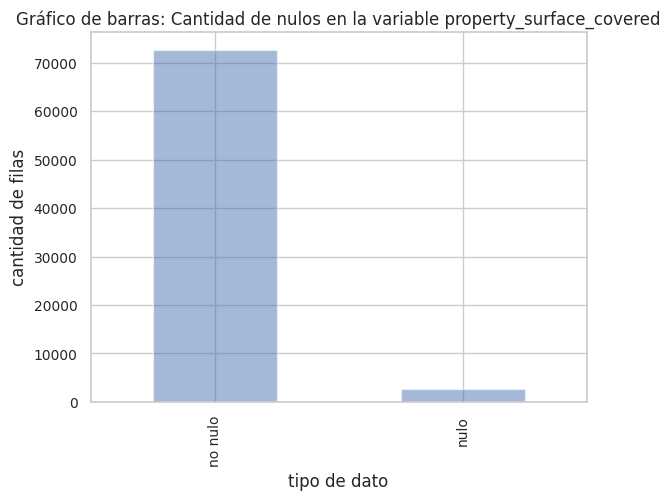

In [ ]:
generar_grafico(sup_total_cubierta,'property_surface_covered')

#### Habitaciones y dormitorios (property_rooms, property_bedrooms)

In [ ]:
# establezco si son o no nulos
habitaciones_dormis = generar_ds_nulo(['property_rooms','property_bedrooms'])
# creo filtro si son o no nulos
v_filtro_hab = filtrar_nulo('property_rooms',habitaciones_dormis)
f_filtro_hab =  filtrar_no_nulo('property_rooms',habitaciones_dormis)

v_filtro_dormis =  filtrar_nulo('property_bedrooms',habitaciones_dormis)
f_filtro_dormis =  filtrar_no_nulo('property_bedrooms',habitaciones_dormis)

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_hab,'property_rooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_hab,'property_rooms','no nulo')

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_dormis,'property_bedrooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_dormis,'property_bedrooms','no nulo')

habitaciones_dormis.head()

property_rooms property_bedrooms
383306        no nulo           no nulo
113494        no nulo           no nulo
235485        no nulo           no nulo
303208        no nulo           no nulo
201667        no nulo           no nulo

In [ ]:
cant_nulos_total, cant_no_nulos_total = contar_ds(habitaciones_dormis,'property_rooms')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_rooms')

Cantidad de datos NULOS en property_rooms: 74564
Cantidad de datos NO NULOS en property_rooms: 835


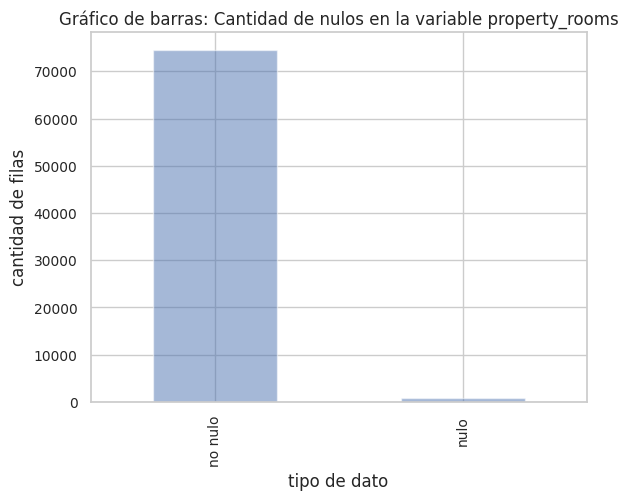

In [ ]:
generar_grafico(habitaciones_dormis,'property_rooms')

In [ ]:
cant_nulos_total, cant_no_nulos_total = contar_ds(habitaciones_dormis,'property_bedrooms')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_bedrooms')

Cantidad de datos NULOS en property_bedrooms: 66597
Cantidad de datos NO NULOS en property_bedrooms: 8802


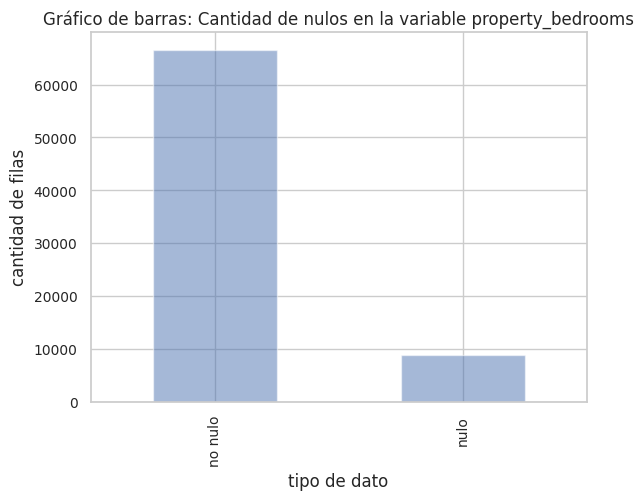

In [ ]:
generar_grafico(habitaciones_dormis,'property_bedrooms')

#### Barrio (place_l3)

In [ ]:
# establezco si son o no nulos
barrio = generar_ds_nulo('place_l3')
# creo filtro si son o no nulos
v_filtro_barrio =  barrio == True
f_filtro_barrio =  barrio == False
# establezco los nulos y no nulos
barrio.loc[v_filtro_barrio] = 'nulo'
barrio.loc[f_filtro_barrio] = 'no nulo'

barrio.head()

383306    no nulo
113494    no nulo
235485    no nulo
303208    no nulo
201667    no nulo
Name: place_l3, dtype: object

In [ ]:
cant_nulos_barrio,cant_no_nulos_barrio = barrio.value_counts()
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'place_l3')

Cantidad de datos NULOS en place_l3: 66597
Cantidad de datos NO NULOS en place_l3: 8802


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable place_l3'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

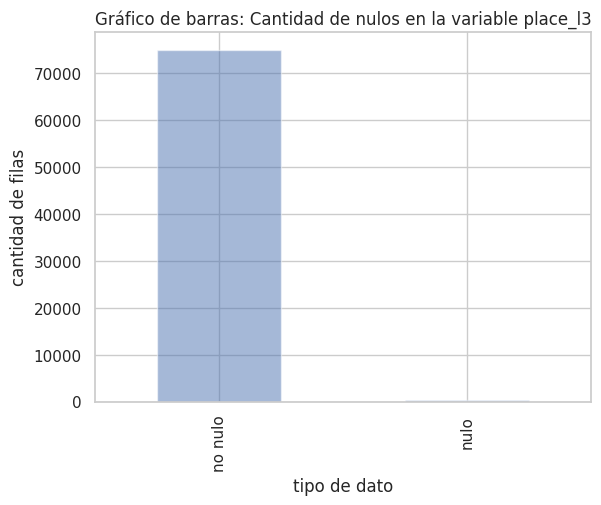

In [ ]:
barrio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable place_l3", xlabel="tipo de dato" , ylabel="cantidad de filas")

#### Precio

In [ ]:
precio = generar_ds_nulo('property_price')
# creo filtro si son o no nulos
v_filtro_precio =  precio == True
f_filtro_precio =  precio == False
# establezco los nulos y no nulos
precio.loc[v_filtro_precio] = 'nulo'
precio.loc[f_filtro_precio] = 'no nulo'

precio.head()

383306    no nulo
113494    no nulo
235485    no nulo
303208    no nulo
201667    no nulo
Name: property_price, dtype: object

In [ ]:
print("Cantidad de datos NO NULOS en property_price: {}".format(precio.value_counts()))

Cantidad de datos NO NULOS en property_price: property_price
no nulo    75399
Name: count, dtype: int64


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_price'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

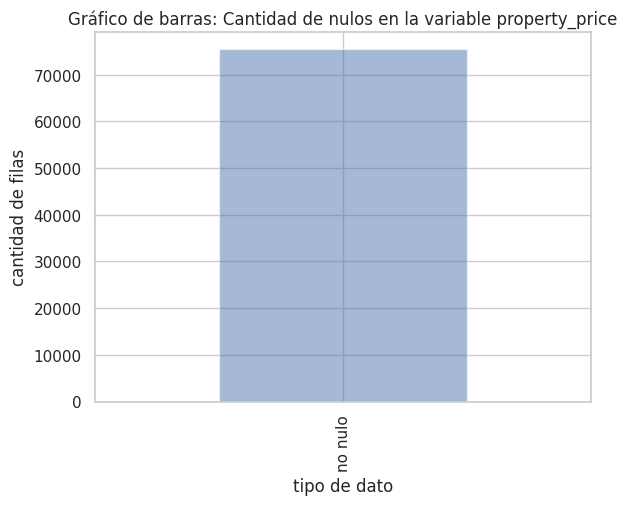

In [ ]:
precio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_price", xlabel="tipo de dato" , ylabel="cantidad de filas")

### Análisis de datos faltantes a nivel fila

Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos
faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de
faltantes por fila en el dataset.


In [ ]:
# Calcular la cantidad de filas nulas
cantidad_filas_nulas = ds_train.isna().sum(axis=1)
filtro = cantidad_filas_nulas > 0
cantidad_filas_nulas = cantidad_filas_nulas[filtro]
print("La cantidad de filas que tienen al menos un dato nulo es: ",len(cantidad_filas_nulas))

La cantidad de filas que tienen al menos un dato nulo es:  17164


<Axes: title={'center': 'Gráfico de barras: Cantidad de filas nulas en ds_train'}, xlabel='cantidad de nulos', ylabel='cantidad de filas'>

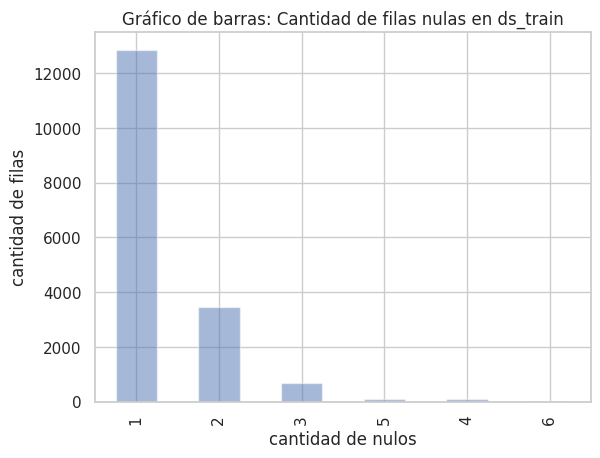

In [ ]:
cantidad_filas_nulas.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de filas nulas en ds_train", xlabel="cantidad de nulos" , ylabel="cantidad de filas")

### Revisión de datos faltantes o mal ingresados

Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de
valores, eliminación de registros incompletos, etc.

Recordemos los datos nulos que tenemos en ds_train

In [ ]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.673895
property_surface_total       5.193703
latitud                      3.970875
longitud                     3.970875
property_surface_covered     3.571665
property_rooms               1.107442
place_l3                     0.423083
dtype: float64

Veremos unas de las estrategias para para trabajar con datos faltantes. Procederemos a imputar datos

#### Imputación Cold Deck
Vamos a trabajar con los datos ```latitud``` y ```longitud``` para completar la variable ```place_l3```.
Para ello vamos a utilizar el csv ```barrios.csv``` provisto por [GCBA](https://data.buenosaires.gob.ar/dataset/barrios/resource/juqdkmgo-191-resource) que nos da la localización y límites geográficos de los barrios de la Ciudad.

Antes de imputar vamos a hacer una copia para analizar la imputación en el siguiente punto.

In [ ]:
ds_pre_imputacion = ds_train.copy()

Para ello vamos a usar Geopandas correspondiente a la documentación wkt

In [ ]:
ds_barrios = pd.read_csv(barrios_file, header=0,sep=';')
def completar_barrios(ds):
  for index, propiedad in ds.iterrows():
    if isinstance(propiedad["place_l3"], str):
      continue

    for index,barrio in ds_barrios.iterrows():
      barrio_aux = barrio['BARRIO']
      if barrio_aux == '' or barrio_aux is None:
        continue
      coordenada = Point(propiedad['longitud'],propiedad['latitud'])
      # uso wkt Para deserializar una cadena y obtener un nuevo objeto geométrico del tipo apropiado
      # uso covers para ver si está cubierta la coordenada de ds_barrios por lo que tiene mi ds
      if wkt.loads(barrio['WKT']).covers(coordenada):
        ds.loc[index,'place_l3'] = barrio_aux

  return

completar_barrios(ds_train)
completar_barrios(ds_test)

Visualizamos el dataset para ver si podemos ver algún nulo rápido.

In [ ]:
# Ordenar el DataFrame por 'place_l3'
ds_train_sorted = ds_train.sort_values(by='place_l3')

# Extraer la columna 'place_l3'
place_l3_column = ds_train_sorted['place_l3']

# Elimino la columna 'place_l3' del DataFrame
ds_train_sorted.drop(columns=['place_l3'], inplace=True)

# Inserto la columna 'place_l3' en la primera posición
ds_train_sorted.insert(0, 'place_l3', place_l3_column)

# Ahora ds_train_sorted tiene 'place_l3' como la primera columna
# para visualizarlo mejor
ds_train_sorted

place_l3                        id  start_date    end_date created_on  \
4       ALMAGRO                       NaN         NaN         NaN        NaT   
238097   Abasto  X5+rram7d4m/rpWojBJ27g==  2021-02-27  2021-05-02 2021-02-27   
22633    Abasto  LeGQK2LjVJjryqLwAft8bw==  2021-10-01  2021-11-26 2021-10-01   
177683   Abasto  QExyZeda1mlW4F9bJH+ZMA==  2021-03-23  2021-06-05 2021-03-23   
89052    Abasto  h1Pr/Q2MgjAJ4aBUUJuSZA==  2021-05-14  2021-05-18 2021-05-14   
...         ...                       ...         ...         ...        ...   
229657      NaN  COmHr4iaAEBxAJj0te0FaQ==  2021-07-27  2022-06-04 2021-07-27   
64216       NaN  5VTHu48RvDQerM4KXy0nWg==  2021-10-03  9999-12-31 2021-10-03   
174956      NaN  ZbzWaTcTmA82UI9+ylZhZA==  2021-08-31  2021-09-18 2021-08-31   
180567      NaN  VeUeVZzvn6CG1admtOWObg==  2021-02-16  2021-12-03 2021-02-16   
173667      NaN  NPA86ettFBDIW2fcHGhq9Q==  2021-05-11  2021-05-12 2021-05-11   

          latitud   longitud property_type  property_rooms  property_bedrooms  \
4             NaN        NaN           NaN             NaN                NaN   
238097 -34.603043 -58.415155  Departamento             1.0                NaN   
22633  -34.606532 -58.412094  Departamento             2.0                1.0   
177683 -34.600630 -58.406509  Departamento             1.0                NaN   
89052  -34.604325 -58.409307  Departamento             1.0                NaN   
...           ...        ...           ...             ...                ...   
229657 -38.958207 -67.923565          Casa             NaN                3.0   
64216  -34.607468 -58.383462  Departamento             1.0                NaN   
174956 -34.608425 -58.365002          Casa             6.0                5.0   
180567        NaN        NaN  Departamento             4.0                3.0   
173667 -27.631190 -55.496357  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  
4                          NaN                       NaN             NaN  
238097                    44.0                      41.0         83600.0  
22633                      NaN                      38.0         55000.0  
177683                    38.0                      38.0         72000.0  
89052                     47.0                      31.0         72000.0  
...                        ...                       ...             ...  
229657                   330.0                     150.0         95000.0  
64216                     25.0                      25.0         39400.0  
174956                   248.0                     135.0        245000.0  
180567                    77.0                      74.0         70000.0  
173667                    98.0                      88.0        269000.0  

[75414 rows x 13 columns]

Vemos que hay datos NaN en el barrio

In [ ]:
ds_train['place_l3'].isna().value_counts()

place_l3
False    75095
True       319
Name: count, dtype: int64

Estos datos en NaN pueden ser datos mal ingresados. Se ingresó mal la coordenada de la propiedad y se la clasificó como Capital Federal. Lo mismo puede suceder de que no tengan latitud ni longitud. Procedo a eliminar dichos datos

In [ ]:
columnas_a_eliminar = ['latitud','longitud','place_l3']
ds_train = ds_train.dropna(subset=columnas_a_eliminar)
ds_test =  ds_test.dropna(subset=columnas_a_eliminar)

Verifico mis datos_nulos en mi dataset

In [ ]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.560245
property_surface_total       5.089111
property_surface_covered     3.531220
property_rooms               0.969355
dtype: float64

#### Análisis de property's
Ahora vamos a seguir con el análisis de las siguientes variables:
*     property_bedrooms
*     property_rooms
*     property_surface_total
*     property_surface_covered

Podemos identificar que estas variables son tipos de datos faltantes MAR.

##### Análisis de ceros

Para empezar verifico si alguno de estos datos es negativo. Pues valores negativos para alguno de estos atributos no tiene sentido.

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                          True
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Vemos que existen valores menores o iguales que 0 en el atributo ```property_bedrooms```. Procedo a ver cuantos registros cumplen con esta condición.

In [ ]:
filtro = ds_propiedades_filtradas['property_bedrooms'] < 1
ds_propiedades_filtradas[filtro]

id  start_date    end_date  created_on  \
406880  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18  2021-01-07   

          latitud   longitud         place_l2       place_l3 place_l4  \
406880 -34.577595 -58.495185  Capital Federal  Villa Urquiza      NaN   

       place_l5  place_l6 operation property_type  property_rooms  \
406880      NaN       NaN     Venta  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
406880               -1.0                    61.0                      43.0   

        property_price property_currency  \
406880        125000.0               USD   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...

Como hay un registro, procederemos a asignarlo nulo.

In [ ]:
ds_train.loc[ds_train['property_bedrooms'] < 1,'property_bedrooms'] = np.nan

Se verifica si hay valores menores o iguales que cero.

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Se realiza el mismo análisis con ds_test

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_test[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

##### Análisis de duplicados

Verificamos si hay datos duplicados en estas columnas

In [ ]:
ds_train[ds_train.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_test[ds_test.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Procederemos a eliminar filas duplicadas

In [ ]:
size_antes = len(ds_train)
ds_train_filtrado = ds_train.drop_duplicates()
size_despues = len(ds_train_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_train")

Se eliminaron: 0 filas duplicadas de ds_train


In [ ]:
ds_train_filtrado.reset_index(drop=True, inplace=True)

In [ ]:
size_antes = len(ds_test)
ds_test_filtrado = ds_test.drop_duplicates()
size_despues = len(ds_test_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_test")

Se eliminaron: 0 filas duplicadas de ds_test


In [ ]:
ds_test_filtrado.reset_index(drop=True, inplace=True)

##### Completacion de las columnas de forma multivariada

Como las variables faltantes son datos de tipo MAR (Missing At Random), elijiremos el proceso de imputación de datos MICE (Multivariate Imputation by Chained Equations)

In [ ]:
# la variable columnas_con_numeros tiene las columnas a analizar
lr = LinearRegression()
imp = IterativeImputer(
    estimator=lr,
    missing_values = np.nan,
    max_iter = 20,
    verbose = 0,
    random_state = 0,
    min_value = 1
)


def rellenar_variables(ds,columnas):
  df_eliminar_nans_op3_completo = ds[columnas].copy()
  ds[columnas] = imp.fit_transform(df_eliminar_nans_op3_completo)

rellenar_variables(ds_train,columnas_con_numeros)


<ipython-input-284-72180959683a>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
obtener_promedio_nulos(ds_train)

id                          0.0
start_date                  0.0
end_date                    0.0
created_on                  0.0
latitud                     0.0
longitud                    0.0
place_l3                    0.0
property_type               0.0
property_rooms              0.0
property_bedrooms           0.0
property_surface_total      0.0
property_surface_covered    0.0
property_price              0.0
dtype: float64

In [ ]:
obtener_cantidad_nulos(ds_train)

'No existen valores NaN'

### Comparación de distribuciones
En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con
la distribución anterior a la imputación de los datos faltantes.

Para ello veamos nuestro ```ds_pre_imputacion```

In [ ]:
ds_pre_imputacion.head()

id  start_date    end_date created_on  \
383306  R0XtDXoFG7M4+e3GXz6/hw==  2021-04-27  2021-05-13 2021-04-27   
113494  paHtTc3maD9aa5logktjLQ==  2021-06-09  2022-06-03 2021-06-09   
235485  LHLKFOA3jnFpRfgyIZr1tg==  2021-06-02  2021-06-12 2021-06-02   
303208  HzdKVUadbgWKfr16PE84Ww==  2021-08-26  2021-11-03 2021-08-26   
201667  smr7cTzVTmuq599mjicjsQ==  2021-11-15  2021-12-28 2021-11-15   

          latitud   longitud      place_l3 property_type  property_rooms  \
383306 -34.603058 -58.507786  Villa Devoto  Departamento             3.0   
113494 -34.603988 -58.415864       Almagro  Departamento             1.0   
235485 -34.596416 -58.444260  Villa Crespo  Departamento             3.0   
303208 -34.600071 -58.436597  Villa Crespo  Departamento             2.0   
201667 -34.590463 -58.422436       Palermo  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
383306                2.0                   110.0                      93.0   
113494                1.0                    23.0                      23.0   
235485                2.0                    51.0                      50.0   
303208                1.0                    44.0                      40.0   
201667                1.0                    57.0                      53.0   

        property_price  
383306        260000.0  
113494         54900.0  
235485         68000.0  
303208         95000.0  
201667        199800.0

Recordemos que datos imputamos

In [ ]:
nulos_preimputacion

property_bedrooms           11.673895
property_surface_total       5.193703
latitud                      3.970875
longitud                     3.970875
property_surface_covered     3.571665
property_rooms               1.107442
place_l3                     0.423083
dtype: float64

In [ ]:
nulos_preimputacion.index.tolist()

['property_bedrooms',
 'property_surface_total',
 'latitud',
 'longitud',
 'property_surface_covered',
 'property_rooms',
 'place_l3']

Para ver la distribuciones de las variables imputadas vamos a utilizar un gráfico de distribución continua BoxPlot. El cual nos va a ayudar a visualizar la distribución de los datos y la asimetría de los mismos mediante la visualización de cuartiles y promedios de los datos.

#### Funciones de distribución

In [ ]:
def generar_distribucion(variable):
  # Configuración de estilo y colores
  sns.set(style="whitegrid")
  sns.set_palette("pastel")

  # Creo la cuadrícula de subgráficos con una fila y dos columnas
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0], width=0.5)
  axes[0].set_title("Boxplot {} pre-imputación".format(variable), fontsize=14)
  axes[0].set_ylabel("Valor", fontsize=12)
  axes[0].set_xlabel("", fontsize=12)

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1], width=0.5)
  axes[1].set_title("Boxplot {} post-imputación".format(variable), fontsize=14)
  axes[1].set_ylabel("Valor", fontsize=12)
  axes[1].set_xlabel("", fontsize=12)

  # Ajusto el diseño
  plt.tight_layout()

  plt.show()

  return

In [ ]:
def generar_distribucion_zoom(variable):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0])
  axes[0].set_title("Boxplot {} pre-imputacion".format(variable))
  axes[0].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1])
  axes[1].set_title("Boxplot {} post-imputacion".format(variable))
  axes[1].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Ajustar el diseño
  plt.tight_layout()

  plt.show()
  return

In [ ]:
def obtener_cantidad_variables(ds,columna):
  analisis = ds[columna].value_counts().reset_index()
  analisis.columns = [columna, 'cantidad']
  return analisis

In [ ]:
def comparar_imputacion(pre, post, columna):
    for i in range(len(pre)):
        registros_imputados = post['cantidad'][i] - pre['cantidad'][i]
        registros_imputados = abs(registros_imputados)  # Tomar el valor absoluto
        print("{} registros se imputaron con el valor de {} {}".format(registros_imputados, pre[columna][i], columna))
    return

#### Comparación property_bedrooms

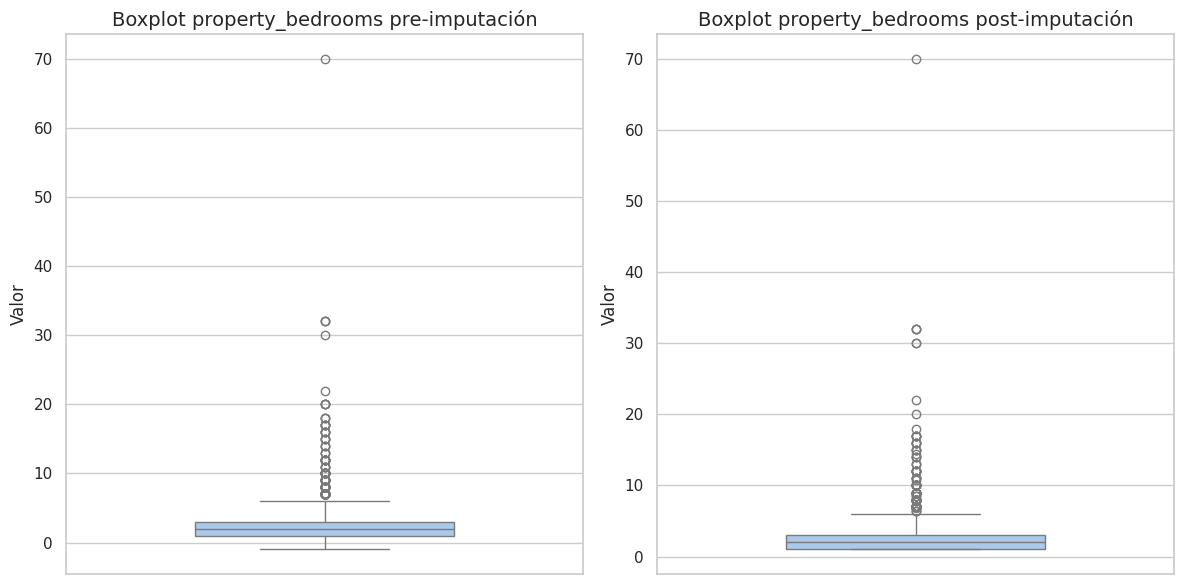

In [ ]:
generar_distribucion("property_bedrooms")

Un poco de zoom

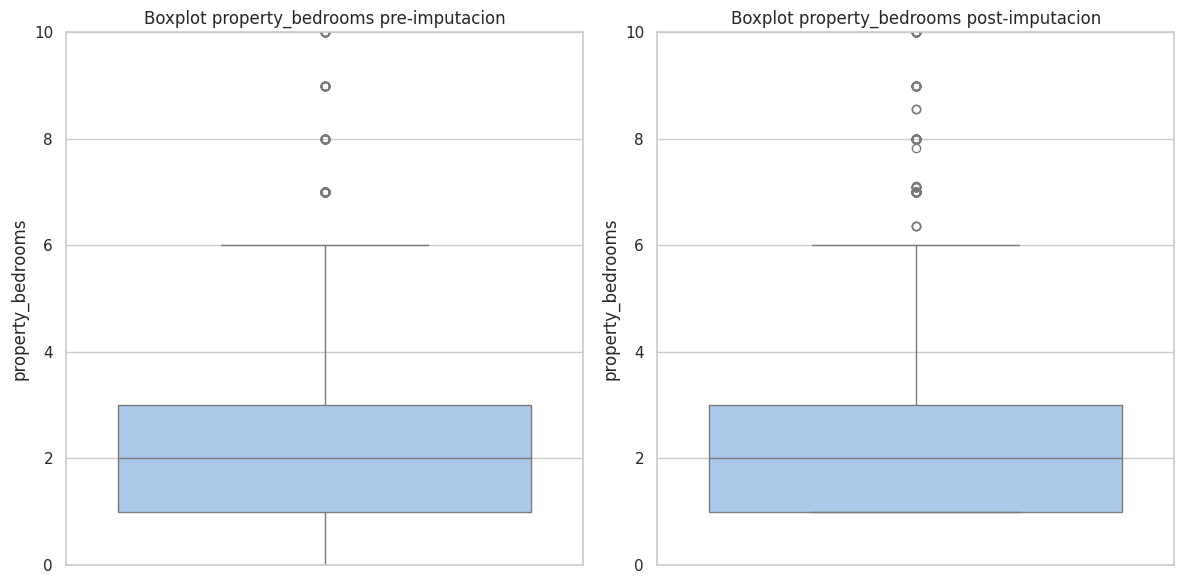

In [ ]:
generar_distribucion_zoom("property_bedrooms")

La comparación de los boxplots revela una gran coherencia en la distribución de la variable entre los conjuntos de datos antes y después de la imputación. Aunque se observa una discrepancia leve entre los valores de aproximadamente 20 y 30, esta diferencia es mínima en comparación con la totalidad de los datos. Esto sugiere que las imputaciones se realizaron de manera consistente y dentro de los límites razonables de la variable, sin introducir valores atípicos o extremos.

Vamos a analizar cada property_bedrooms

In [ ]:
pre_bedrooms = obtener_cantidad_variables(ds_pre_imputacion,'property_bedrooms')
pre_bedrooms.head()

property_bedrooms  cantidad
0                1.0     25485
1                2.0     21971
2                3.0     14198
3                4.0      3807
4                5.0       738

In [ ]:
post_bedrooms = obtener_cantidad_variables(ds_train,'property_bedrooms')
post_bedrooms.head()

property_bedrooms  cantidad
0                1.0     31888
1                2.0     21154
2                3.0     13546
3                4.0      3599
4                5.0       681

Con esto podemos ver la cantidad de imputaciones que se hicieron gracias al método MICE.

In [ ]:
comparar_imputacion(pre_bedrooms,post_bedrooms,'property_bedrooms')

6403 registros se imputaron con el valor de 1.0 property_bedrooms
817 registros se imputaron con el valor de 2.0 property_bedrooms
652 registros se imputaron con el valor de 3.0 property_bedrooms
208 registros se imputaron con el valor de 4.0 property_bedrooms
57 registros se imputaron con el valor de 5.0 property_bedrooms
17 registros se imputaron con el valor de 6.0 property_bedrooms
3 registros se imputaron con el valor de 7.0 property_bedrooms
2 registros se imputaron con el valor de 8.0 property_bedrooms
0 registros se imputaron con el valor de 9.0 property_bedrooms
0 registros se imputaron con el valor de 10.0 property_bedrooms
0 registros se imputaron con el valor de 12.0 property_bedrooms
3 registros se imputaron con el valor de 16.0 property_bedrooms
2 registros se imputaron con el valor de 17.0 property_bedrooms
3 registros se imputaron con el valor de 15.0 property_bedrooms
2 registros se imputaron con el valor de 20.0 property_bedrooms
2 registros se imputaron con el valor 

Podemos concluir que la mayoría de los datos nulos en la variable property_bedrooms fueron llenados con la cantidad de un dormitorio

#### Comparación property_rooms

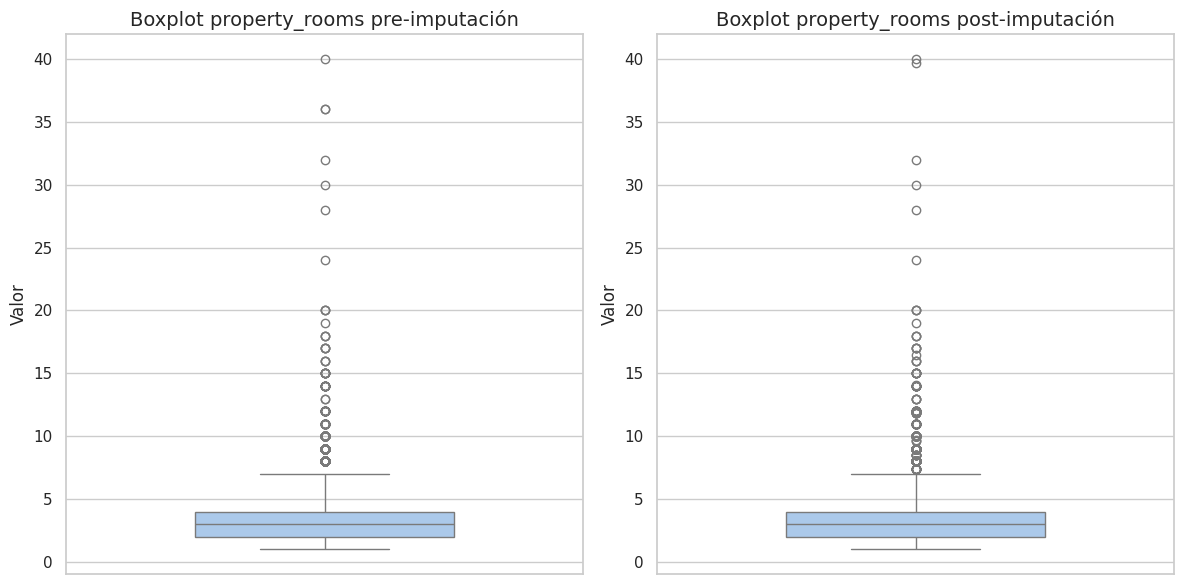

In [ ]:
generar_distribucion("property_rooms")

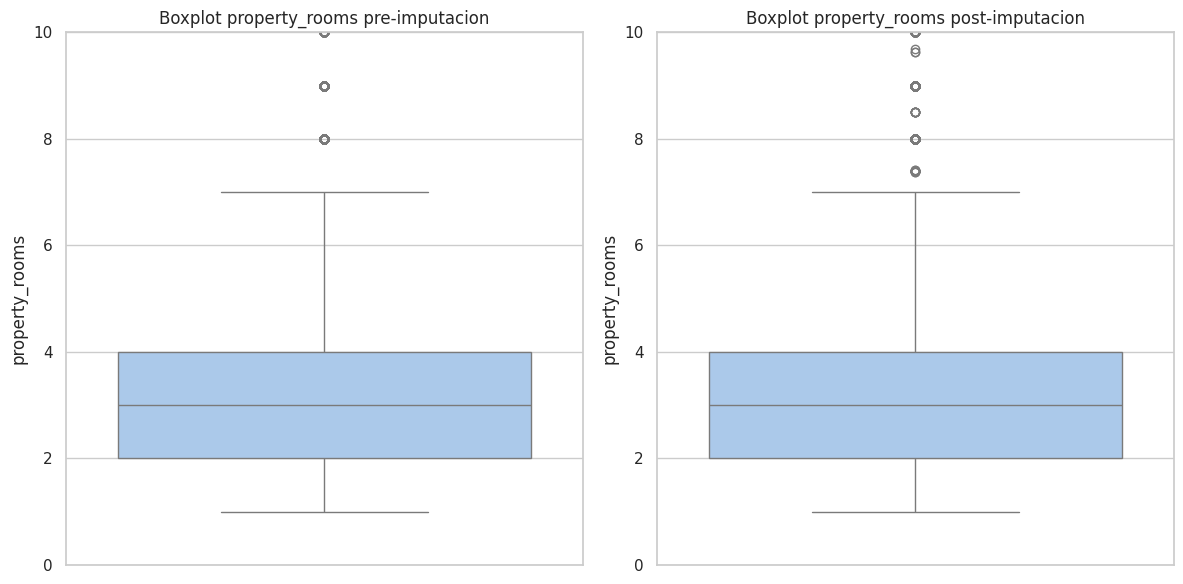

In [ ]:
generar_distribucion_zoom("property_rooms")

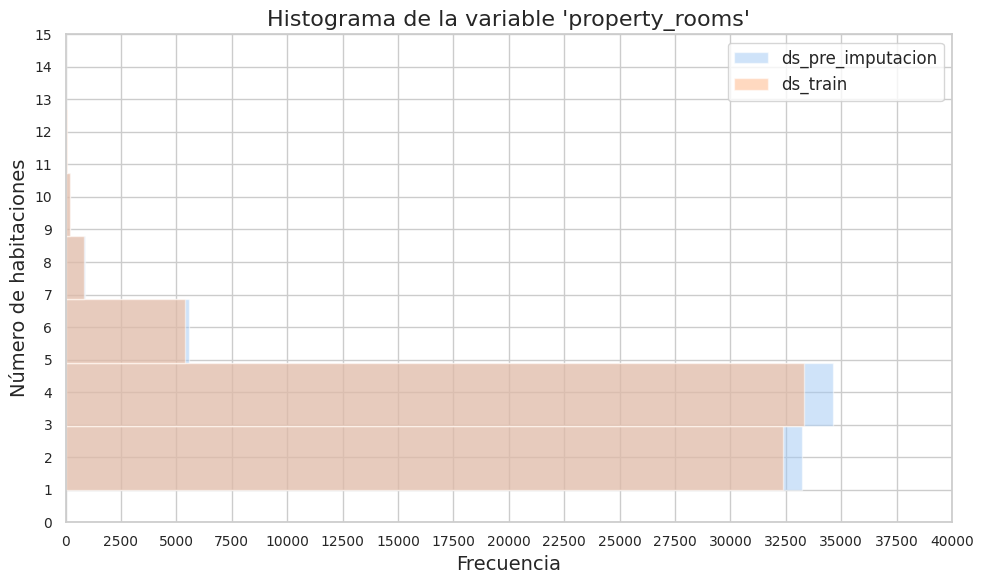

In [ ]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Histograma para ds_pre_imputacion en el eje y (invertido)
plt.hist(ds_pre_imputacion['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_pre_imputacion')

# Histograma para ds_train en el eje y (invertido)
plt.hist(ds_train['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_train')

# Ajustes de título y etiquetas
plt.title("Histograma de la variable 'property_rooms'", fontsize=16)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Número de habitaciones", fontsize=14)

# Ajustes de límites de los ejes (zoom)
plt.ylim(0, 15)
plt.xlim(0, 40000)

# Establecer intervalos del eje x
plt.xticks(np.arange(0, 40001, 2500), fontsize=10)

# Añadir leyenda
plt.legend(fontsize=12)

# Establecer intervalos del eje y
plt.yticks(np.arange(16), fontsize=10)

plt.tight_layout()
plt.show()

<Axes: xlabel='property_rooms'>

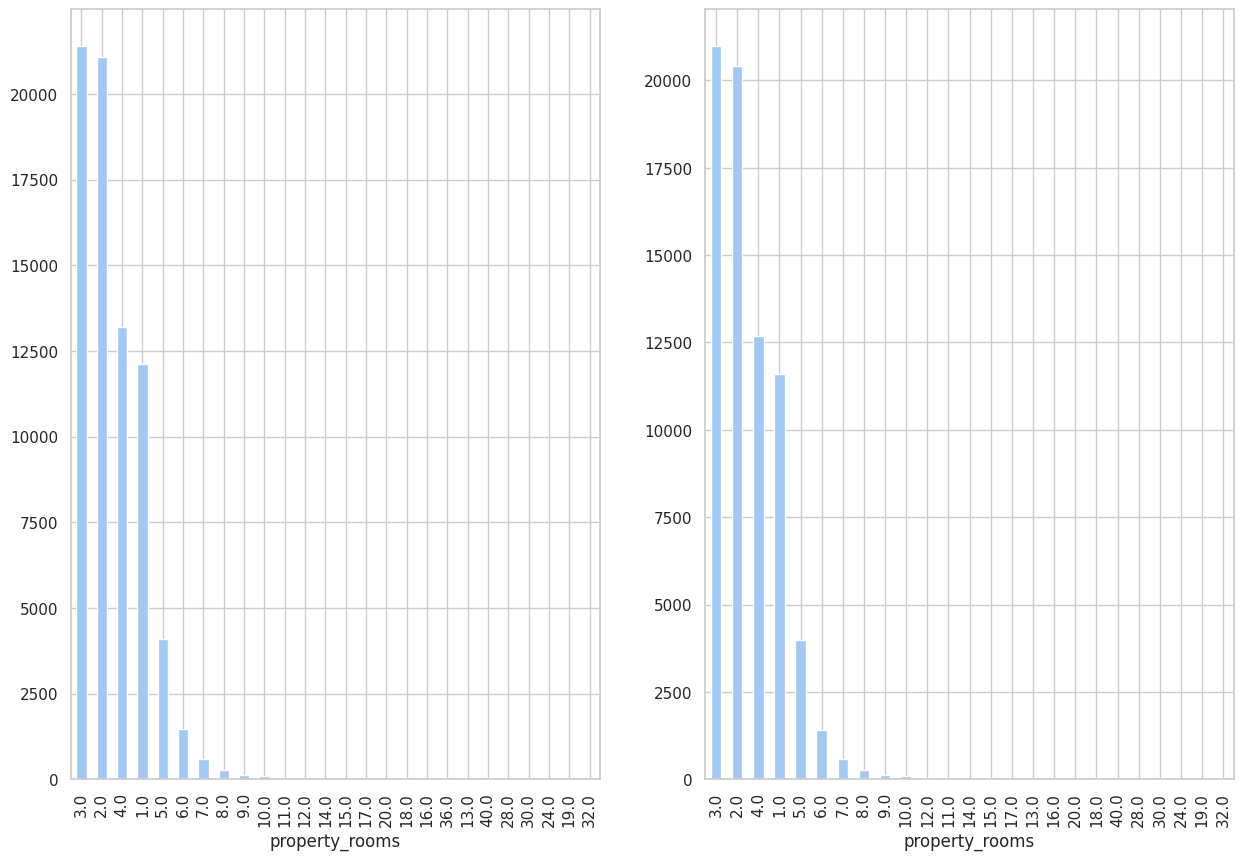

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
ds_pre_imputacion["property_rooms"].value_counts().plot.bar(ax=axes[0])
ds_train["property_rooms"].round().value_counts().plot.bar(ax=axes[1])

A través de estos gráficos, se observan sutiles discrepancias al asignar la cantidad de habitaciones a la hora de realizar la imputación.

In [ ]:
pre_rooms = obtener_cantidad_variables(ds_pre_imputacion,'property_rooms')
pre_rooms.head()

property_rooms  cantidad
0             3.0     21403
1             2.0     21092
2             4.0     13202
3             1.0     12126
4             5.0      4098

In [ ]:
post_rooms = obtener_cantidad_variables(ds_train,'property_rooms')
post_rooms.head()

property_rooms  cantidad
0             3.0     20615
1             2.0     20319
2             4.0     12591
3             1.0     11598
4             5.0      3905

In [ ]:
comparar_imputacion(pre_rooms,post_rooms,'property_rooms')

788 registros se imputaron con el valor de 3.0 property_rooms
773 registros se imputaron con el valor de 2.0 property_rooms
611 registros se imputaron con el valor de 4.0 property_rooms
528 registros se imputaron con el valor de 1.0 property_rooms
193 registros se imputaron con el valor de 5.0 property_rooms
94 registros se imputaron con el valor de 6.0 property_rooms
40 registros se imputaron con el valor de 7.0 property_rooms
16 registros se imputaron con el valor de 8.0 property_rooms
1 registros se imputaron con el valor de 9.0 property_rooms
5 registros se imputaron con el valor de 10.0 property_rooms
0 registros se imputaron con el valor de 11.0 property_rooms
0 registros se imputaron con el valor de 12.0 property_rooms
0 registros se imputaron con el valor de 14.0 property_rooms
0 registros se imputaron con el valor de 15.0 property_rooms
4 registros se imputaron con el valor de 17.0 property_rooms
4 registros se imputaron con el valor de 20.0 property_rooms
3 registros se imput

Podemos inferir que la mayoría de los valores faltantes en la variable "property_rooms" fueron sustituidos por la cantidad de dos habitaciones.

#### Comparación property_surface_total

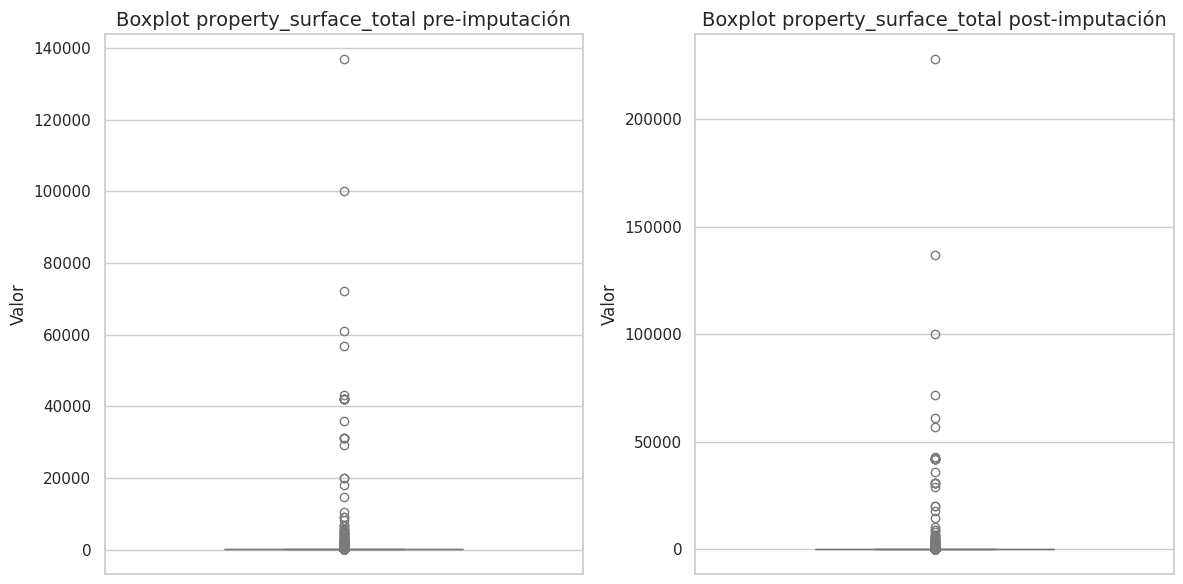

In [ ]:
generar_distribucion("property_surface_total")

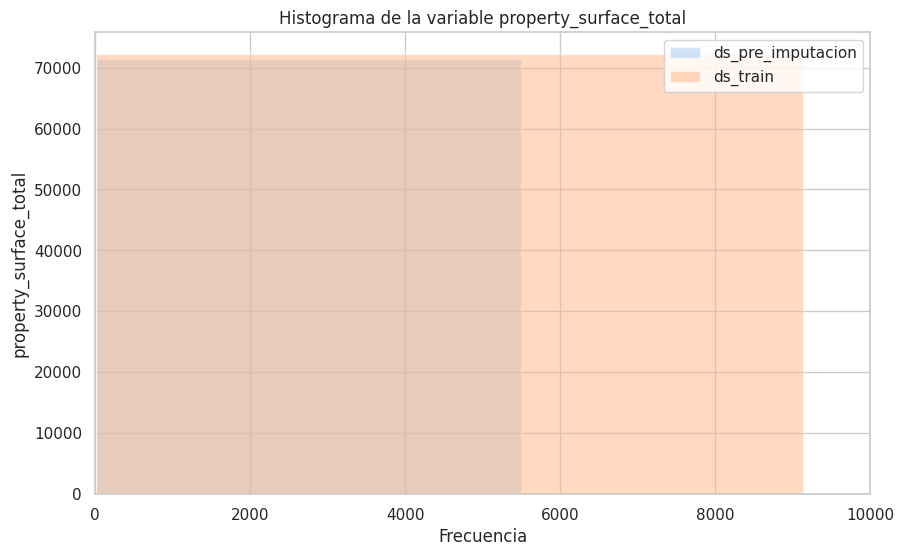

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_total'], bins=25, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_total'], bins=25, alpha=0.5, label='ds_train')

plt.title("Histograma de la variable property_surface_total")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_total")

plt.xlim(0, 10000)

plt.legend()

plt.show()

Observamos una notable disparidad en la cantidad de datos faltantes antes de la imputación de la variable "superficie total".

In [ ]:
pre_total = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_total')
pre_total.head()

property_surface_total  cantidad
0                    50.0      1442
1                    40.0      1376
2                    45.0      1269
3                    42.0      1246
4                    60.0      1209

In [ ]:
post_total = obtener_cantidad_variables(ds_train,'property_surface_total')
post_total.head()

property_surface_total  cantidad
0                    50.0      1368
1                    40.0      1337
2                    45.0      1217
3                    42.0      1195
4                    60.0      1158

In [ ]:
comparar_imputacion(pre_total,post_total,'property_surface_total')

74 registros se imputaron con el valor de 50.0 property_surface_total
39 registros se imputaron con el valor de 40.0 property_surface_total
52 registros se imputaron con el valor de 45.0 property_surface_total
51 registros se imputaron con el valor de 42.0 property_surface_total
51 registros se imputaron con el valor de 60.0 property_surface_total
47 registros se imputaron con el valor de 35.0 property_surface_total
61 registros se imputaron con el valor de 38.0 property_surface_total
45 registros se imputaron con el valor de 55.0 property_surface_total
29 registros se imputaron con el valor de 43.0 property_surface_total
43 registros se imputaron con el valor de 37.0 property_surface_total
36 registros se imputaron con el valor de 44.0 property_surface_total
41 registros se imputaron con el valor de 36.0 property_surface_total
49 registros se imputaron con el valor de 34.0 property_surface_total
40 registros se imputaron con el valor de 48.0 property_surface_total
30 registros se impu

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_total" fueron reemplazados con una superficie total de 73 m²


#### Comparación property_surface_covered

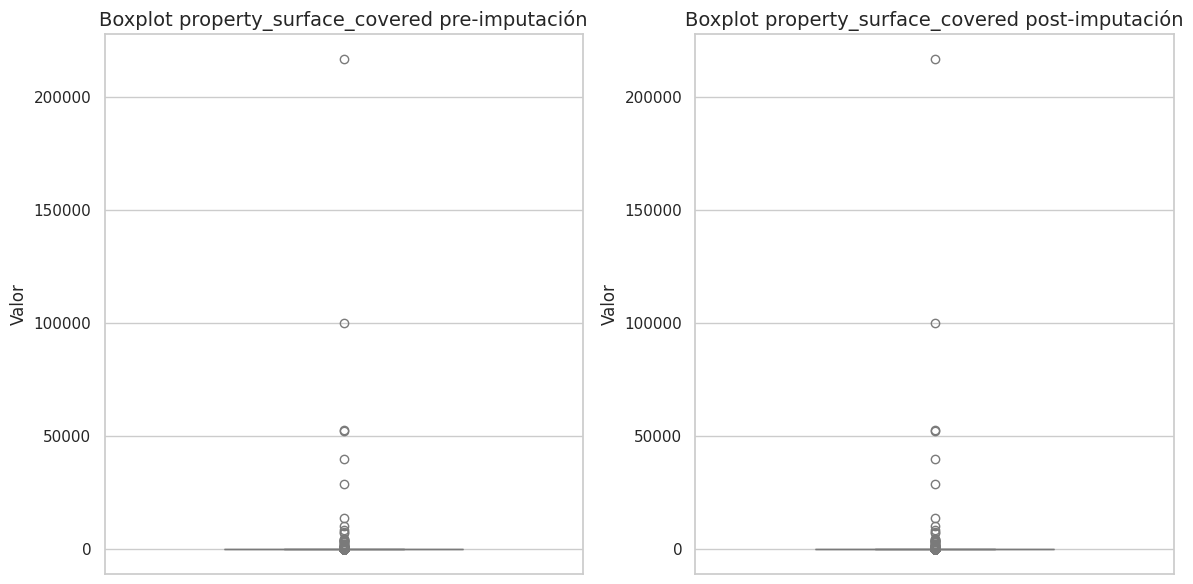

In [ ]:
generar_distribucion("property_surface_covered")

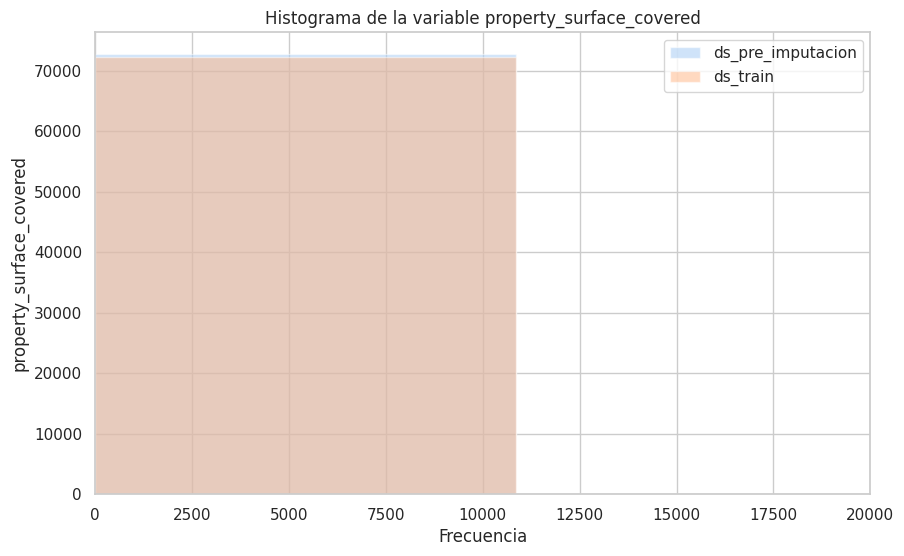

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_covered'], bins=20, alpha=0.5,  label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_covered'], bins=20, alpha=0.5,  label='ds_train')


plt.title("Histograma de la variable property_surface_covered")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_covered")


plt.xlim(0,20000)

plt.legend()

plt.show()

Se observa una ligera disparidad en los datos faltantes. Se puede inferir que se imputaron pocos datos para la variable "property_surface_covered", ya que esta variable tenía entre los menos valores nulos.

In [ ]:
pre_cubierto = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_covered')
pre_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1918
1                      38.0      1625
2                      50.0      1595
3                      45.0      1537
4                      35.0      1512

In [ ]:
post_cubierto = obtener_cantidad_variables(ds_train,'property_surface_covered')
post_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1867
1                      38.0      1548
2                      50.0      1538
3                      45.0      1473
4                      35.0      1447

In [ ]:
comparar_imputacion(pre_cubierto,post_cubierto,'property_surface_covered')

51 registros se imputaron con el valor de 40.0 property_surface_covered
77 registros se imputaron con el valor de 38.0 property_surface_covered
57 registros se imputaron con el valor de 50.0 property_surface_covered
64 registros se imputaron con el valor de 45.0 property_surface_covered
65 registros se imputaron con el valor de 35.0 property_surface_covered
50 registros se imputaron con el valor de 42.0 property_surface_covered
54 registros se imputaron con el valor de 60.0 property_surface_covered
49 registros se imputaron con el valor de 36.0 property_surface_covered
60 registros se imputaron con el valor de 32.0 property_surface_covered
58 registros se imputaron con el valor de 30.0 property_surface_covered
50 registros se imputaron con el valor de 37.0 property_surface_covered
51 registros se imputaron con el valor de 34.0 property_surface_covered
58 registros se imputaron con el valor de 33.0 property_surface_covered
40 registros se imputaron con el valor de 43.0 property_surface_

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_covered" fueron completados con una superficie cubierta de 78 m²

#### Comparación latitud

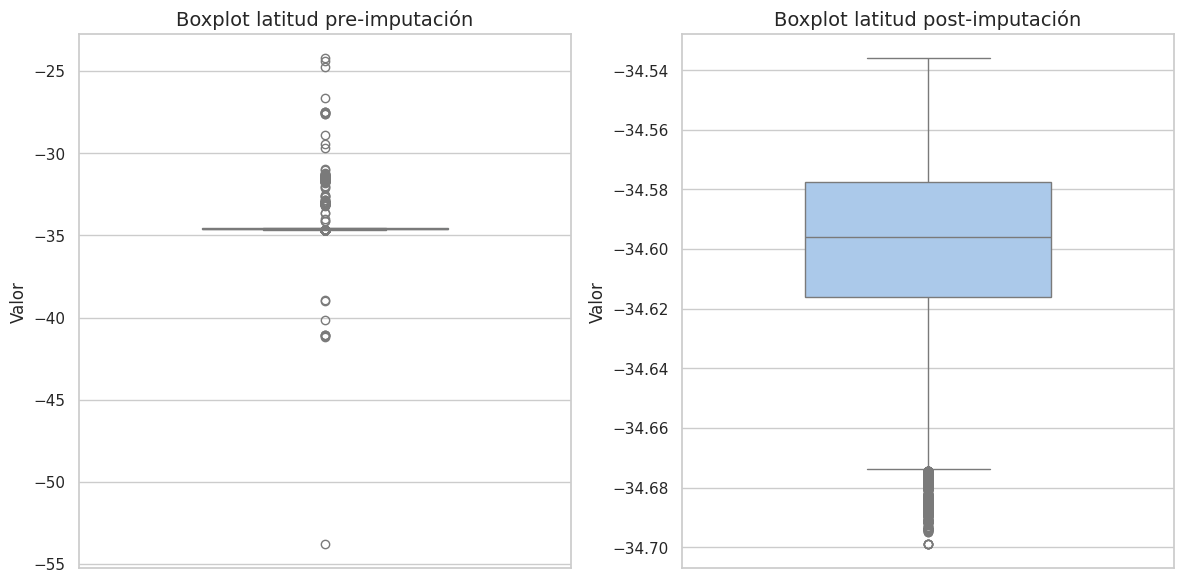

In [ ]:
generar_distribucion("latitud")

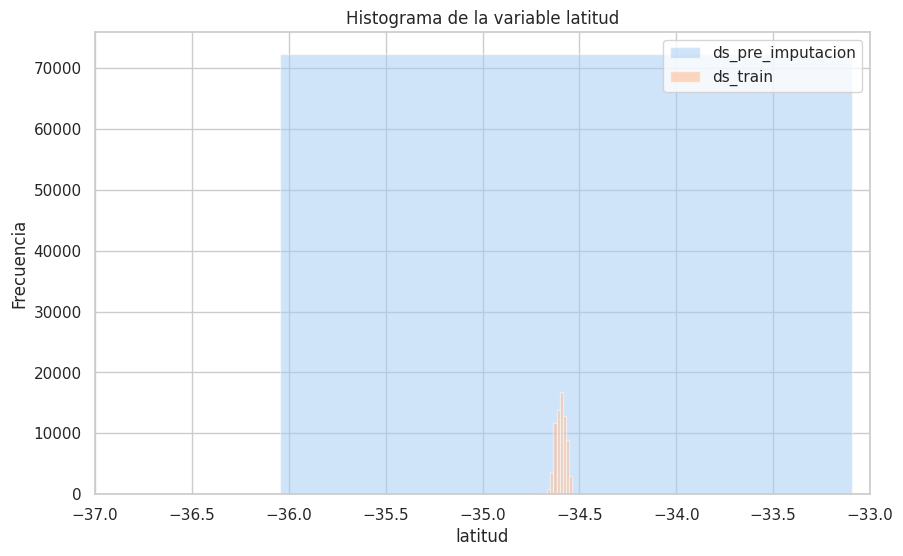

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['latitud'], bins=10, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['latitud'], bins=10, alpha=0.5, label='ds_train')

plt.xlim(-37, -33)

plt.title("Histograma de la variable latitud")
plt.xlabel("latitud")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

Se puede observar que antes de la imputación, la latitud tenía una frecuencia constante para todos sus valores. Sin embargo, al imputar los datos, la frecuencia varía más, generando una distribución en forma de campana de Gauss. Se destaca que la latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -34.58.

In [ ]:
pre_latitud = obtener_cantidad_variables(ds_pre_imputacion,'latitud')
pre_latitud

latitud  cantidad
0     -34.541250       119
1     -34.619406       100
2     -34.604538        88
3     -34.541616        84
4     -34.582098        76
...          ...       ...
39239 -34.640541         1
39240 -34.624860         1
39241 -34.635656         1
39242 -34.629527         1
39243 -34.615896         1

[39244 rows x 2 columns]

In [ ]:
post_latitud = obtener_cantidad_variables(ds_train,'latitud')
post_latitud

latitud  cantidad
0     -34.541250       119
1     -34.619406       100
2     -34.604538        88
3     -34.541616        84
4     -34.582098        76
...          ...       ...
39112 -34.590987         1
39113 -34.620224         1
39114 -34.640541         1
39115 -34.624860         1
39116 -34.615896         1

[39117 rows x 2 columns]

Parecieran ser iguales... pero lo hemos imputado

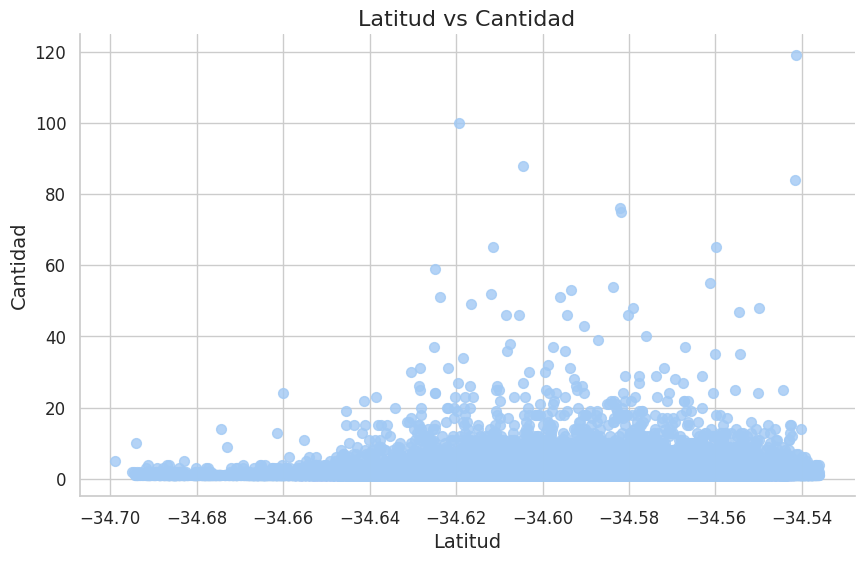

In [ ]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_latitud['latitud'], post_latitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Latitud vs Cantidad", fontsize=16)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
pre_latitud.equals(post_latitud)

False

In [ ]:
print(len(pre_latitud))
print(len(post_latitud))
print('diferencia: {}'.format(len(pre_latitud)-len(post_latitud)))

39244
39117
diferencia: 127


#### Comparación longitud

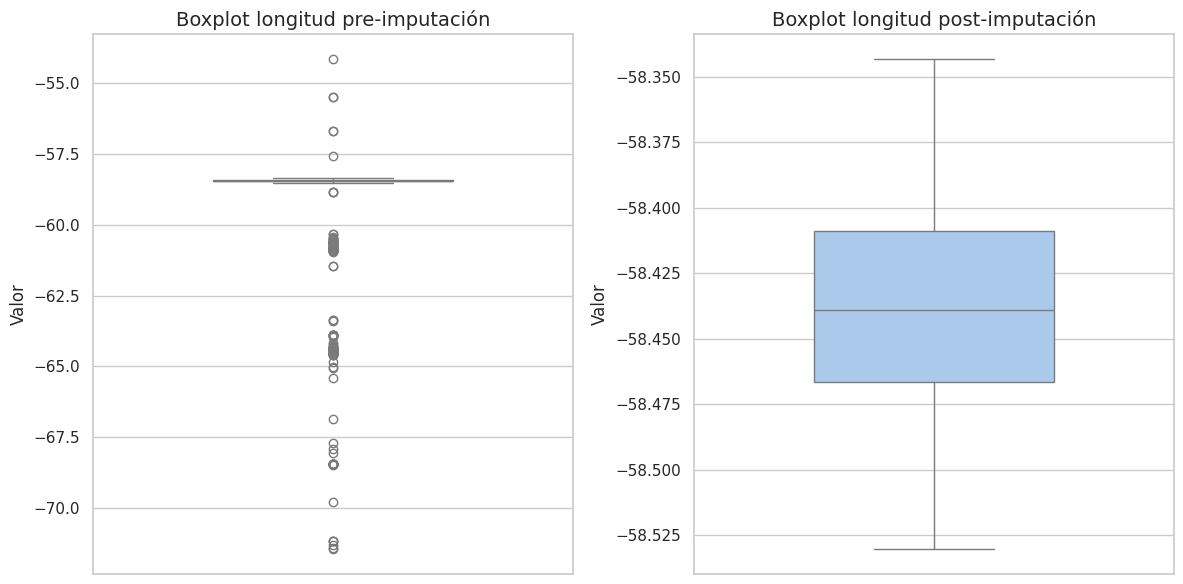

In [ ]:
generar_distribucion("longitud")

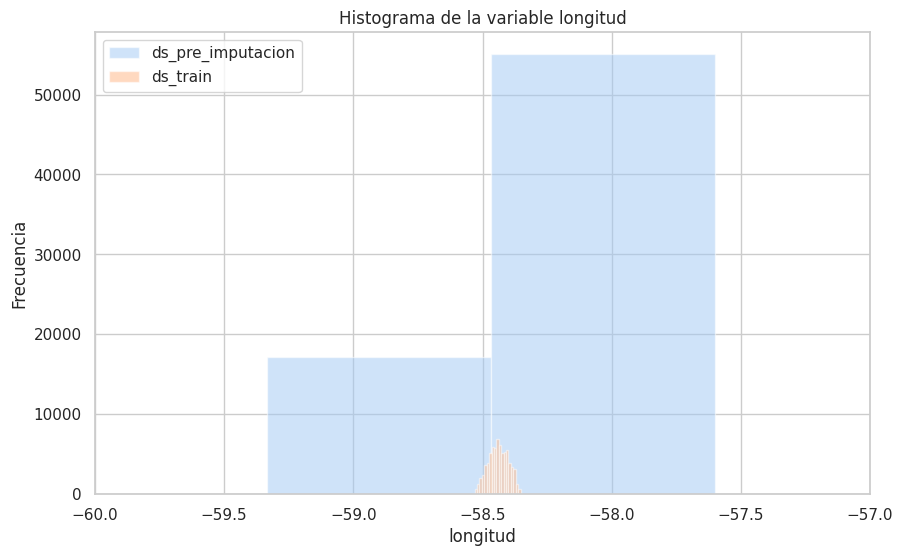

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['longitud'], bins=20, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['longitud'], bins=20, alpha=0.5, label='ds_train')


plt.title("Histograma de la variable longitud")
plt.xlabel("longitud")
plt.ylabel("Frecuencia")

plt.xlim(-60, -57)

plt.legend()

plt.show()

Todos los valores que se mencionarán en el siguiente párrafo se consideran aproximados.

Antes de la imputación, se observa que la latitud tenía una frecuencia medianamente constante. Desde la latitud -59.5 hasta -58.5, la frecuencia es de aproximadamente 18000, luego aumenta en más de 50000 hasta llegar a la latitud -57.5.

Tras la imputación de los datos, se observa una variación en la frecuencia que genera una distribución en forma de campana de Gauss. La latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -58.400.

In [ ]:
pre_longitud = obtener_cantidad_variables(ds_pre_imputacion,'longitud')
pre_longitud.head()

longitud  cantidad
0 -58.472966       119
1 -58.451999       100
2 -58.424956        88
3 -58.473377        84
4 -58.448859        76

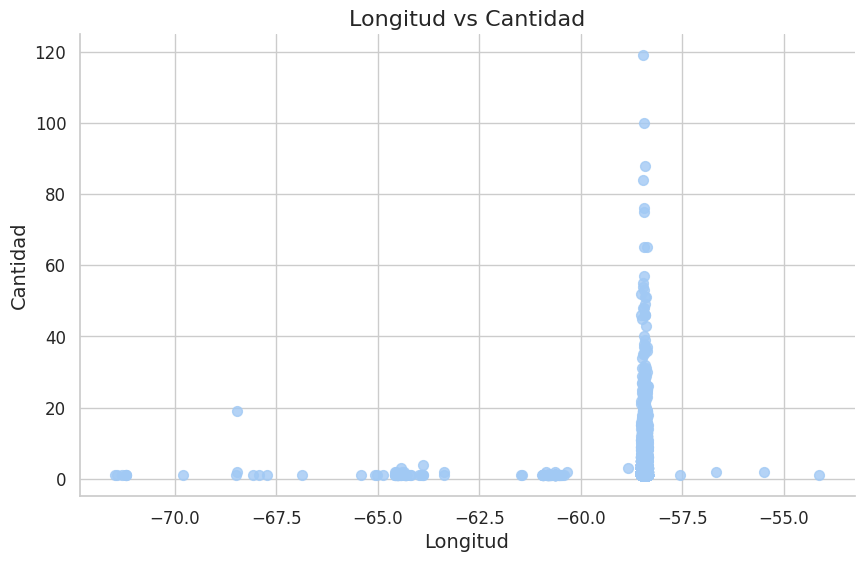

In [ ]:
# @title longitud vs cantidad

# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(pre_longitud['longitud'], pre_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
post_longitud = obtener_cantidad_variables(ds_train,'longitud')
post_longitud.head()

longitud  cantidad
0 -58.472966       119
1 -58.451999       100
2 -58.424956        88
3 -58.473377        84
4 -58.448859        76

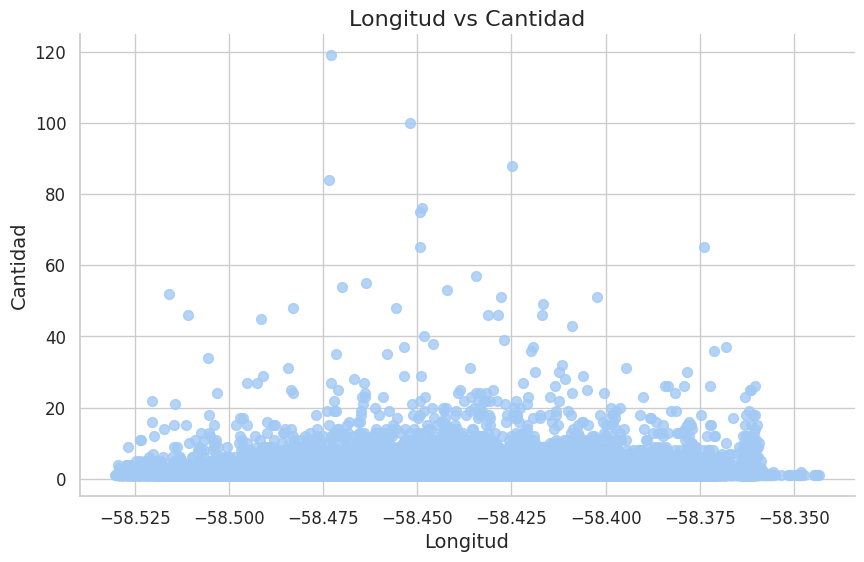

In [ ]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_longitud['longitud'], post_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
pre_longitud.equals(post_longitud)

False

In [ ]:
print(len(pre_longitud))
print(len(post_longitud))
print('diferencia: {}'.format(len(pre_longitud)-len(post_longitud)))

39066
38939
diferencia: 127


#### Comparación place_l3

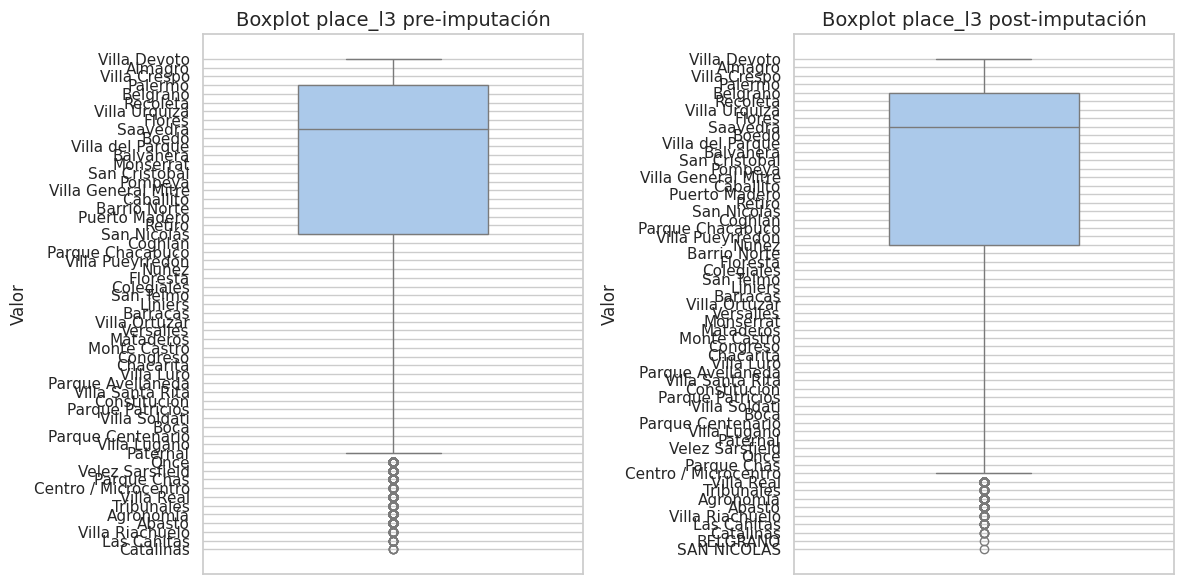

In [ ]:
generar_distribucion("place_l3")

Se observa que antes de la imputación, el barrio con mayor cantidad de propiedades era San Cristóbal, mientras que después de la imputación, la media ha cambiado y ahora es Villa Urquiza. No obstante, Palermo continúa siendo el barrio con la mayor cantidad de propiedades en ambos casos.

In [ ]:
pre_barrio = obtener_cantidad_variables(ds_pre_imputacion,'place_l3')
pre_barrio.head()

place_l3  cantidad
0        Palermo     11419
1       Belgrano      7120
2      Caballito      5801
3       Recoleta      5023
4  Villa Urquiza      3757

In [ ]:
post_barrio = obtener_cantidad_variables(ds_train,'place_l3')
post_barrio.head()

place_l3  cantidad
0        Palermo     10699
1       Belgrano      6608
2      Caballito      5663
3       Recoleta      4837
4  Villa Urquiza      3637

In [ ]:
comparar_imputacion(pre_barrio,post_barrio,'place_l3')

720 registros se imputaron con el valor de Palermo place_l3
512 registros se imputaron con el valor de Belgrano place_l3
138 registros se imputaron con el valor de Caballito place_l3
186 registros se imputaron con el valor de Recoleta place_l3
120 registros se imputaron con el valor de Villa Urquiza place_l3
134 registros se imputaron con el valor de Almagro place_l3
186 registros se imputaron con el valor de Nuñez place_l3
86 registros se imputaron con el valor de Villa Crespo place_l3
93 registros se imputaron con el valor de Flores place_l3
158 registros se imputaron con el valor de Barrio Norte place_l3
61 registros se imputaron con el valor de Balvanera place_l3
9 registros se imputaron con el valor de Colegiales place_l3
7 registros se imputaron con el valor de Villa Devoto place_l3
8 registros se imputaron con el valor de Villa del Parque place_l3
9 registros se imputaron con el valor de Saavedra place_l3
56 registros se imputaron con el valor de Puerto Madero place_l3
29 regist

Podemos concluir que la mayoría de los valores faltantes en la variable "place_l3" fueron completados con el nombre del barrio "Palermo".

## Valores atípicos

### *Prefacio*

Recordando lo visto en la sección de variables cualitativas en Exploración inicial.

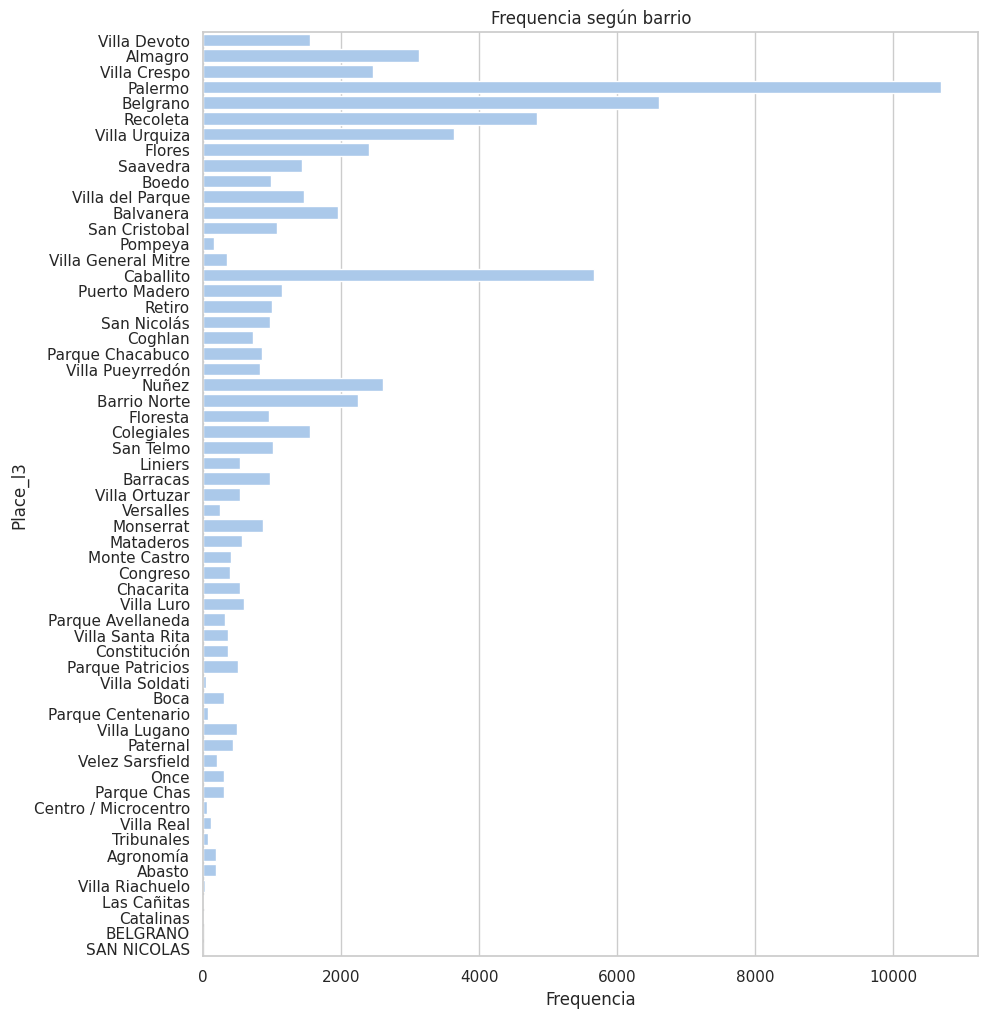

In [ ]:
# Hacemos un gráfico de frecuencias de los barrios
plt.figure(figsize=(10, 12))
sns.countplot(y=ds_train.place_l3)
plt.xlabel('Frequencia')
plt.ylabel('Place_l3')
plt.title('Frequencia según barrio')
plt.show()

Las Cañitas, Catalinas, San Nicolas tienen una representación nula/casi nula.
Villa Soldati, Microcentro, Parque Centenario, Villa Riachuelo, Tribunales tienen una representación tan pequeña que tenemos que tener en cuenta que los registros pueden ser casos aislados/no representativos de la realidad de las ventas de inmuebles en el barrio.

In [ ]:
# Hacemos una copia del dataset hasta el momento
ds_atipicos = ds_train.copy()

Funciones auxiliares para el análisis:



In [ ]:
#Función para cálculo de limite superior e inferior de outliers según cuartiles
def limite_rango_iq(df, variable):
  # Cuartiles
  Q1 = np.quantile(df[variable], 0.25)
  Q3 = np.quantile(df[variable], 0.75)

  # Rango intercuartil
  IQR = Q3 - Q1

  # Limite inferior Outliers
  out_inf = Q1 - 1.5 * IQR

  # Limite superior Outliers
  out_sup = Q1 + 1.5 * IQR

  return out_inf, out_sup

# Funcion para cálculo de Z Score normal
def calculo_z_score(serie):
  media = np.mean(serie)
  std = np.std(serie)
  return (serie - media) / std

#Función para calculo de Z Score modificado
def calculo_z_mod(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  return (serie - median) * 0.6745 / MAD

# Grafico comparativo
def plot_comparativo(df_antes, df_despues, var):

  # Create subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  # Plot for df_antes
  sns.boxplot(y=df_antes[var], ax=axs[0])
  axs[0].set_title('Antes')

  # Plot for df_despues
  sns.boxplot(y=df_despues[var], ax=axs[1])
  axs[1].set_title('Después')

  # Show plots
  plt.tight_layout()
  plt.show()
  return

# Boxplot por barrio de la variable a evaluar
def plot_por_barrio(df, var):
  # Lista de barrios
  barrios = ['Coghlan','Colegiales','Abasto','Nuñez','Constitución',
             'Boedo', 'San Nicolás', 'Retiro', 'Liniers', 'Almagro',
             'Boca', 'Palermo', 'Balvanera','Barracas', 'Caballito',
             'Villa Ortuzar', 'Villa Luro', 'Puerto Madero', 'Pompeya', 'Saavedra',
             'Parque Chacabuco', 'Belgrano', 'Recoleta', 'Floresta', 'Monserrat',
             'Villa del Parque', 'San Telmo', 'Villa Crespo', 'Tribunales', 'Once',
             'Barrio Norte', 'Villa Lugano', 'Congreso', 'Villa Urquiza', 'Mataderos',
             'Villa Devoto', 'Recoleta', 'San Cristobal', 'Villa Pueyrredon', 'Congreso']

  # Subplots
  fig, axs = plt.subplots(8, 5, figsize=(16, 24))
  axs = axs.flatten()

  for i, barrio in enumerate(barrios):
      filtered_data = df[df['place_l3'] == barrio]

      sns.boxplot(y=filtered_data[var], ax=axs[i])

      axs[i].set_title(f'{var} en {barrio}')

  # Adjust layout
  plt.tight_layout()
  # Show the plot
  plt.show()
  return



### Análisis univariado

Vamos a intentar identificar los outliers univariados utilizando los IQR y el Z Score.

*Análisis según cantidad de habitaciones(property_bedrooms)*

<Axes: ylabel='property_bedrooms'>

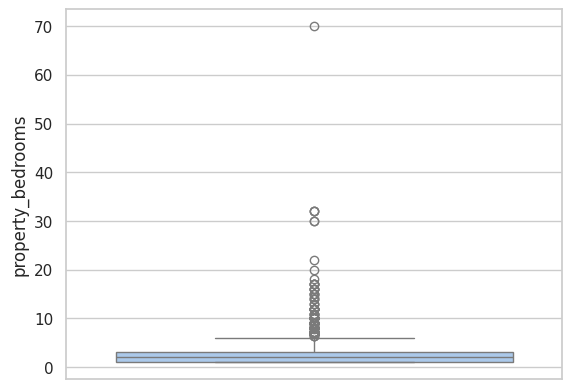

In [ ]:
sns.boxplot(y=ds_train.property_bedrooms)

In [ ]:
limite_rango_iq(ds_train, 'property_bedrooms')

(-2.0, 4.0)

Primero analizamos el outlier más notorio y verificamos si es un valor posible.

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 40]
outlier

id  start_date    end_date created_on    latitud  \
94998  4TbEkLoqy/0c3zakd66/FQ==  2021-09-24  2022-01-27 2021-09-24 -34.646632   

        longitud    place_l3 property_type  property_rooms  property_bedrooms  \
94998 -58.497902  Villa Luro  Departamento             3.0               70.0   

       property_surface_total  property_surface_covered  property_price  
94998              932.520857                      70.0        135000.0

Es un departamento de 3 ambientes con 70 habitaciones, lo cual no es posible. Tampoco podemos asumir que es un error de tipeo. A su vez, la superficie total es exagerada en comparación de la superficie cubierta y el precio de la propiedad.  Vamos a eliminar el outlier y visualizar nuevamente el código.  

<ipython-input-341-a0f165733f40>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: ylabel='property_bedrooms'>

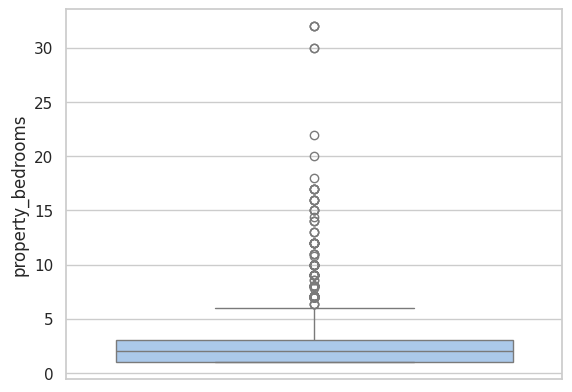

In [ ]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_bedrooms'] > 40].index
ds_train.drop(id_outlier,inplace=True)

# Visualizamos
sns.boxplot(y=ds_train.property_bedrooms)

Existen muchos valores atípicos por sobre el umbral marcado por los cuartiles, pero teniendo en cuenta que estamos trabajando con casas, PH y departamentos unicamente, revisaremos las anomalías mayores a 15, a partir de donde no hay muchas ocurrencias.



In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 15]
outlier

id  start_date    end_date created_on  \
208593  CtbHDgBLf3+kTc20y2iVhw==  2021-11-29  2022-01-14 2021-11-29   
36421   VoyodCc8rftOZHr4TeYcpw==  2021-09-21  2022-02-03 2021-09-21   
49960   O/JMW/VVo7OmWF7SkXtBuA==  2021-10-16  2021-12-24 2021-10-16   
48279   r3sXlEIiCgBG5TtUkN93mw==  2021-03-14  2021-06-05 2021-03-14   
402448  9OrT+9jZlW4rMGyZYsmNPA==  2021-09-07  2022-02-09 2021-09-07   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   
332857  760pAR/aW7whZAZRLML/ZA==  2021-09-17  2022-02-25 2021-09-17   
366101  8o3ZwoXgOddHoex/irib7g==  2021-04-10  2021-06-05 2021-04-10   
115403  VuF9cBcZ03aoEcEWAsWGjA==  2021-12-07  2022-01-27 2021-12-07   
362676  Gj3g5KCtRbYcwZIuh/wJGg==  2021-01-16  2021-08-06 2021-01-16   
285222  WHu8kgA8Vu692UM8Dz3gnA==  2021-02-24  2022-02-09 2021-02-24   
362696  KuzGWi8jCNPL9nvKAUqLKw==  2021-01-16  2021-08-06 2021-01-16   
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
307211  uqM9/WXFJkEJnXEQefcpRQ==  2021-09-19  2021-09-19 2021-09-19   
346602  yzI9zylc11wllHX16av6jA==  2021-09-30  2021-11-02 2021-09-30   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   
86014   pVG9sES9De/1eQ+tB90NjQ==  2021-03-26  2021-06-05 2021-03-26   

          latitud   longitud          place_l3 property_type  property_rooms  \
208593 -34.629796 -58.363928              Boca            PH       18.000000   
36421  -34.576061 -58.421289           Palermo  Departamento        3.000000   
49960  -34.630186 -58.389156  Parque Patricios  Departamento        1.000000   
48279  -34.608645 -58.485619  Villa del Parque  Departamento        4.000000   
402448 -34.611413 -58.389221         Monserrat          Casa       17.000000   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa       39.659828   
389282 -34.570959 -58.458106          Belgrano          Casa       28.000000   
332857 -34.611905 -58.382384         Monserrat  Departamento       18.000000   
366101 -34.648922 -58.380522          Barracas          Casa       18.000000   
115403 -34.598070 -58.444686      Villa Crespo            PH       17.000000   
362676 -34.618485 -58.377993         San Telmo          Casa       16.000000   
285222 -34.638432 -58.369712          Barracas            PH       20.000000   
362696 -34.618485 -58.377993         San Telmo  Departamento       16.000000   
292167 -34.616487 -58.371596         San Telmo            PH       24.000000   
307211 -34.611905 -58.382384         Monserrat            PH       15.000000   
346602 -34.632537 -58.360577              Boca  Departamento       19.000000   
90004  -34.633236 -58.480313          Floresta            PH       32.000000   
86014  -34.591110 -58.400685          Recoleta  Departamento        4.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
208593          17.000000              386.000000                     323.0   
36421           20.000000              127.000000                     117.0   
49960           32.000000               32.000000                      32.0   
48279           32.000000               83.000000                      75.0   
402448          16.000000              585.000000                     458.0   
1932            30.026362           228142.236477                  217000.0   
389282          16.000000              845.000000                     845.0   
332857          17.000000              554.000000                     334.0   
366101          17.000000              515.000000                     515.0   
115403          17.000000              689.000000                     598.0   
362676          16.000000             1195.703468                     943.0   
285222          17.000000              807.000000                     470.0   
362696          16.000000             1195.703468                     943.0   
292167          22.000000              800.000000    

Tenemos 230 anomalías. Los casos donde el número de ambientes es razonable, parece error de tipeo. Lo corregimos

In [ ]:
condition = (ds_train['property_bedrooms'] > 15) & (ds_train['property_rooms'] < 10)
ds_train.loc[condition, 'property_surface_covered'] /= 10

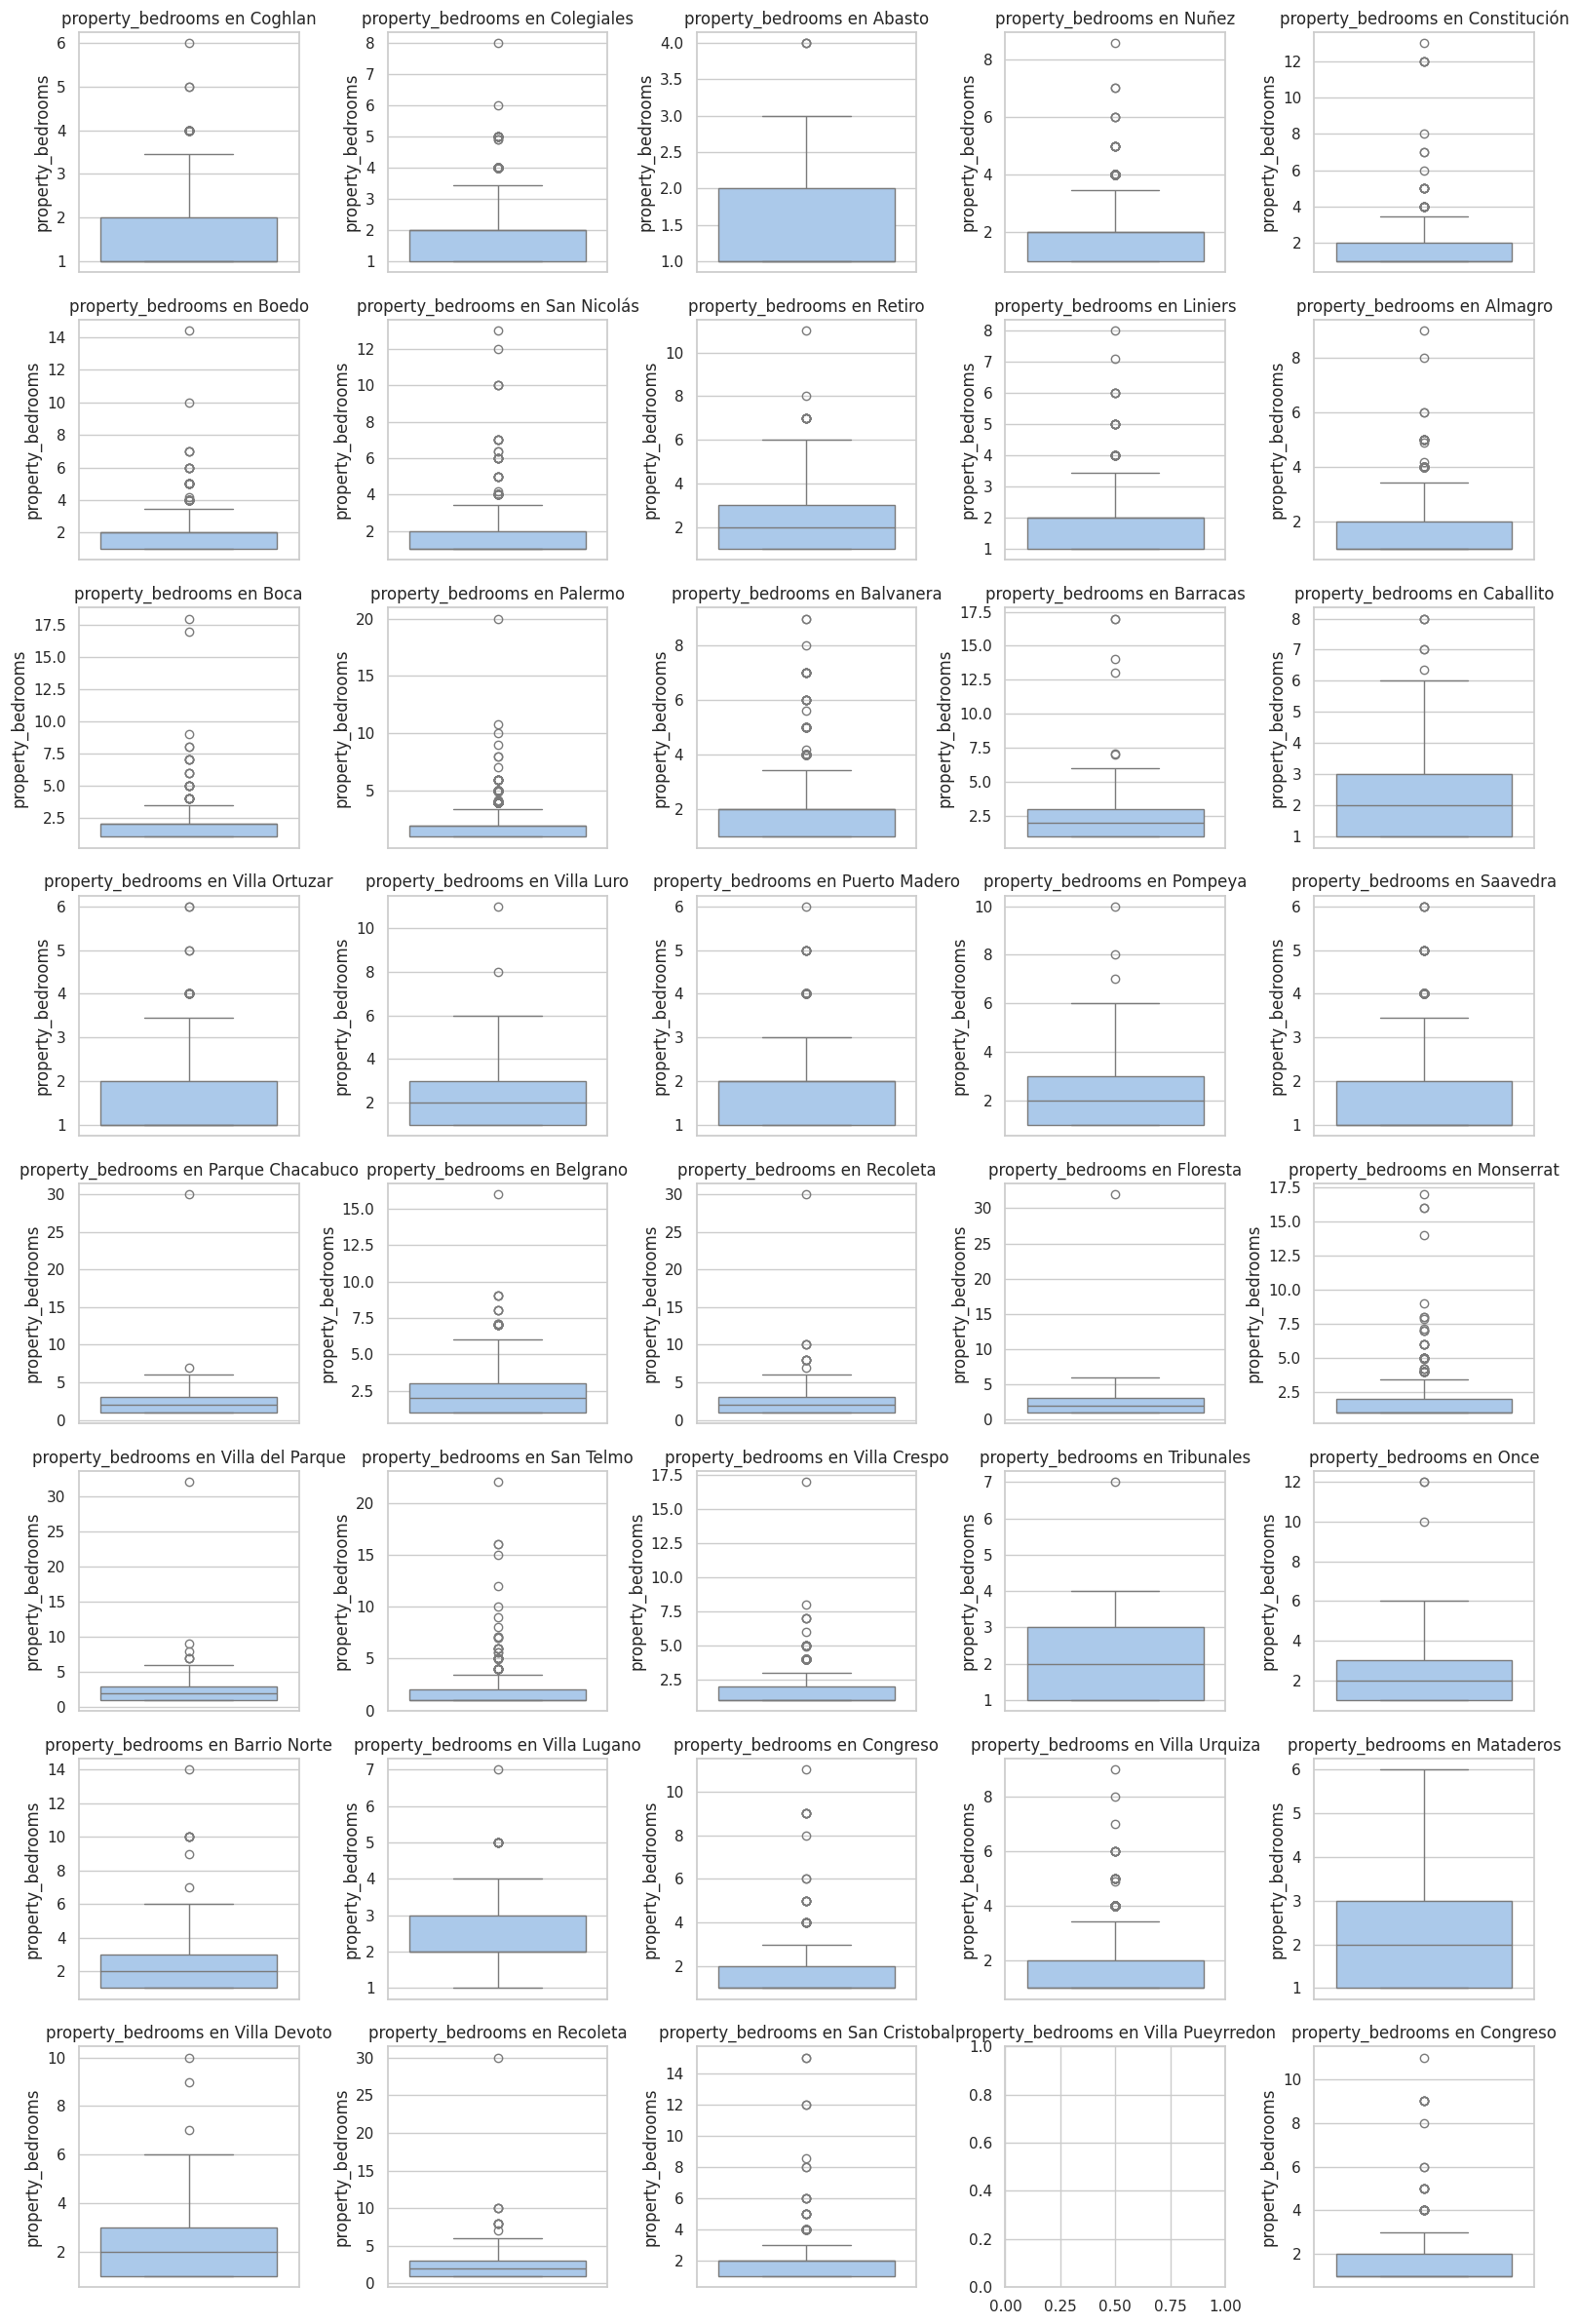

In [ ]:
plot_por_barrio(ds_train, 'property_bedrooms')

Analizando los boxplot de la cantidad de habitaciones pero dividido según el barrio en el que se encuentra la propiedad, podemos ver aún teniendo en cuenta las variaciones, que aquellos casos de casas con más de 8 habitaciones son outliers extremos y decidimos normalizarlas utilizando una transformación logaritmica.

Nota: el limite intercuartil en general para la zona de CABA era 4, pero como vemos en barrios como Caballito esto se encuentra totalmente dentro de la norma.

In [ ]:
ds_train.loc[ds_train['property_bedrooms'] > 7.0, 'property_bedrooms'] = np.log(ds_train['property_bedrooms'])

In [ ]:
ds_train[ds_train['property_bedrooms'] > 6]

id  start_date    end_date created_on  \
446881  FCKQIqoZzcZ7V9FAbGTc7g==  2021-05-22  2021-06-07 2021-05-22   
421589  S9r34tSB8+FE5vkjVO4w+Q==  2021-07-07  2021-08-03 2021-07-07   
316979  qEFSh4OMmD1vteEduetkcw==  2021-09-29  2021-12-19 2021-09-29   
198127  la5vVFPvjtlJv3F690Sn6A==  2021-02-14  2021-03-01 2021-02-14   
354636  jMJzyQRQyB7RMx45YwYLCw==  2021-03-31  2021-11-03 2021-03-31   
...                          ...         ...         ...        ...   
247708  apOYQ/oKpXN+V8QXbEgMVg==  2021-09-13  2022-01-27 2021-09-13   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
449622  YxjhWpsXv+4ySaNcSmtSxw==  2021-12-16  2022-02-09 2021-12-16   
81379   KTRv8eydPSmcTC2epBmirg==  2021-03-12  2021-05-01 2021-03-12   
301648  mtpUHpAUZ4hE/PR4Bevnxw==  2021-08-10  2021-09-15 2021-08-10   

          latitud   longitud           place_l3 property_type  property_rooms  \
446881 -34.629273 -58.418845              Boedo          Casa       12.000000   
421589 -34.604969 -58.478785   Villa del Parque          Casa        8.506732   
316979 -34.626540 -58.373731          San Telmo          Casa       10.000000   
198127 -34.625901 -58.465396             Flores            PH       10.000000   
354636 -34.641514 -58.367007               Boca            PH       10.000000   
...           ...        ...                ...           ...             ...   
247708 -34.625905 -58.474918             Flores          Casa        9.000000   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
449622 -34.546268 -58.459154              Nuñez            PH        8.000000   
81379  -34.565236 -58.486268      Villa Urquiza          Casa        8.000000   
301648 -34.593316 -58.377201             Retiro  Departamento        9.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
446881                7.0              500.000000                     500.0   
421589                7.0              440.000000                     235.0   
316979                7.0              604.379529                     490.0   
198127                7.0              386.000000                     231.0   
354636                7.0              123.000000                     118.0   
...                   ...                     ...                       ...   
247708                7.0              427.165829                     322.0   
387679                7.0              250.000000                     250.0   
449622                7.0              246.000000                     172.0   
81379                 7.0              590.000000                     530.0   
301648                7.0              380.000000                     350.0   

        property_price  
446881        450000.0  
421589        260000.0  
316979        800000.0  
198127        280000.0  
354636        150000.0  
...                ...  
247708        350000.0  
387679        212000.0  
449622        370000.0  
81379        1599000.0  
301648        650000.0  

[80 rows x 13 columns]

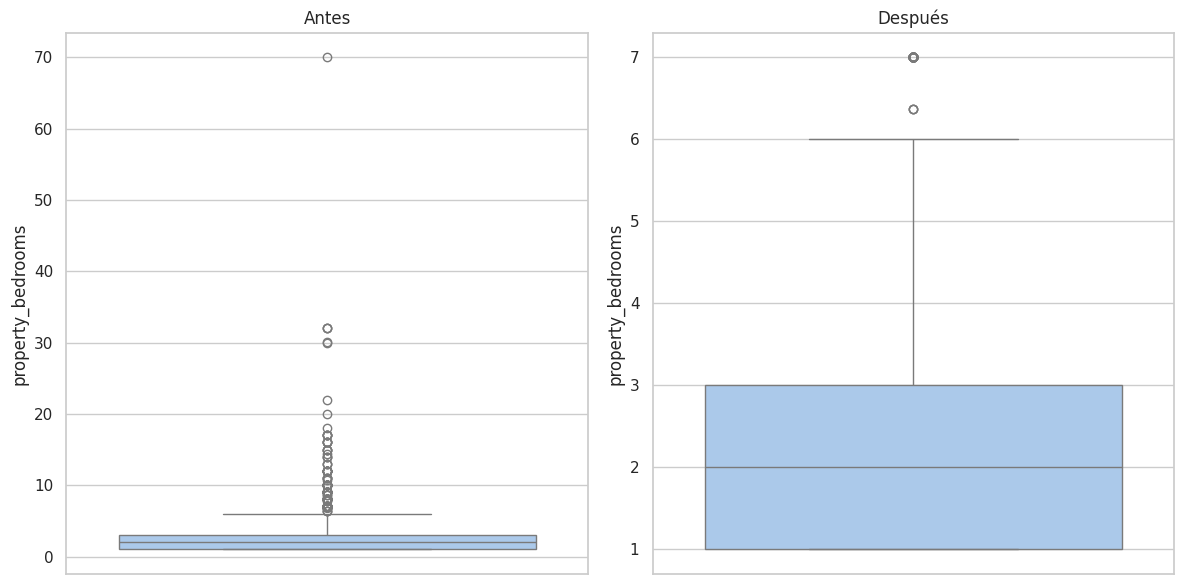

In [ ]:
plot_comparativo(ds_atipicos, ds_train, 'property_bedrooms')

Podemos ver que se han solucionado la mayoría de las anomalías. Dejaremos las restantes (84 registros) para el análisis multivariado.

*Análisis según cantidad de ambientes (property_rooms)*

<Axes: ylabel='property_rooms'>

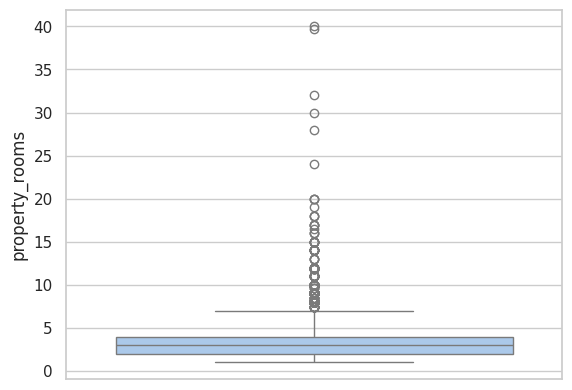

In [ ]:
sns.boxplot(y=ds_train.property_rooms)

In [ ]:
limite_rango_iq(ds_train, 'property_rooms')

(-1.0, 5.0)

El limite intercuartil superior es 5.0. Vemos que si bien hay muchos outliers por sobre el limite de 5 ambientes, esto se acentúa una vez que se superan los 20 ambientes.



In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_rooms'] > 20]
outlier

id  start_date    end_date created_on  \
356618  +e6yeZZqYElYRYq4/cd9qg==  2021-11-18  2021-12-02 2021-11-18   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   
21009   bmop3OsDu5kJmbAVgJ5wzA==  2021-03-15  2021-06-05 2021-03-15   
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   

          latitud   longitud          place_l3 property_type  property_rooms  \
356618 -34.588742 -58.422459           Palermo  Departamento       40.000000   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa       39.659828   
389282 -34.570959 -58.458106          Belgrano          Casa       28.000000   
21009  -34.616391 -58.456038         Caballito  Departamento       30.000000   
292167 -34.616487 -58.371596         San Telmo            PH       24.000000   
90004  -34.633236 -58.480313          Floresta            PH       32.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
356618           3.000000               75.000000                      68.0   
1932             3.402076           228142.236477                  217000.0   
389282           2.772589              845.000000                     845.0   
21009            2.000000               79.000000                      79.0   
292167           3.091042              800.000000                     650.0   
90004            3.465736              535.000000                     435.0   

        property_price  
356618        145000.0  
1932          250000.0  
389282        950000.0  
21009         230000.0  
292167        350000.0  
90004         300000.0

Si bien los datos de habitaciones y ambientes no son posibles, por ahora no serán borrados ya que el resto (superficie cubierta, precio) parecen coherentes con el resto del dataset y pueden ser útiles.

Controlaremos según barrio.

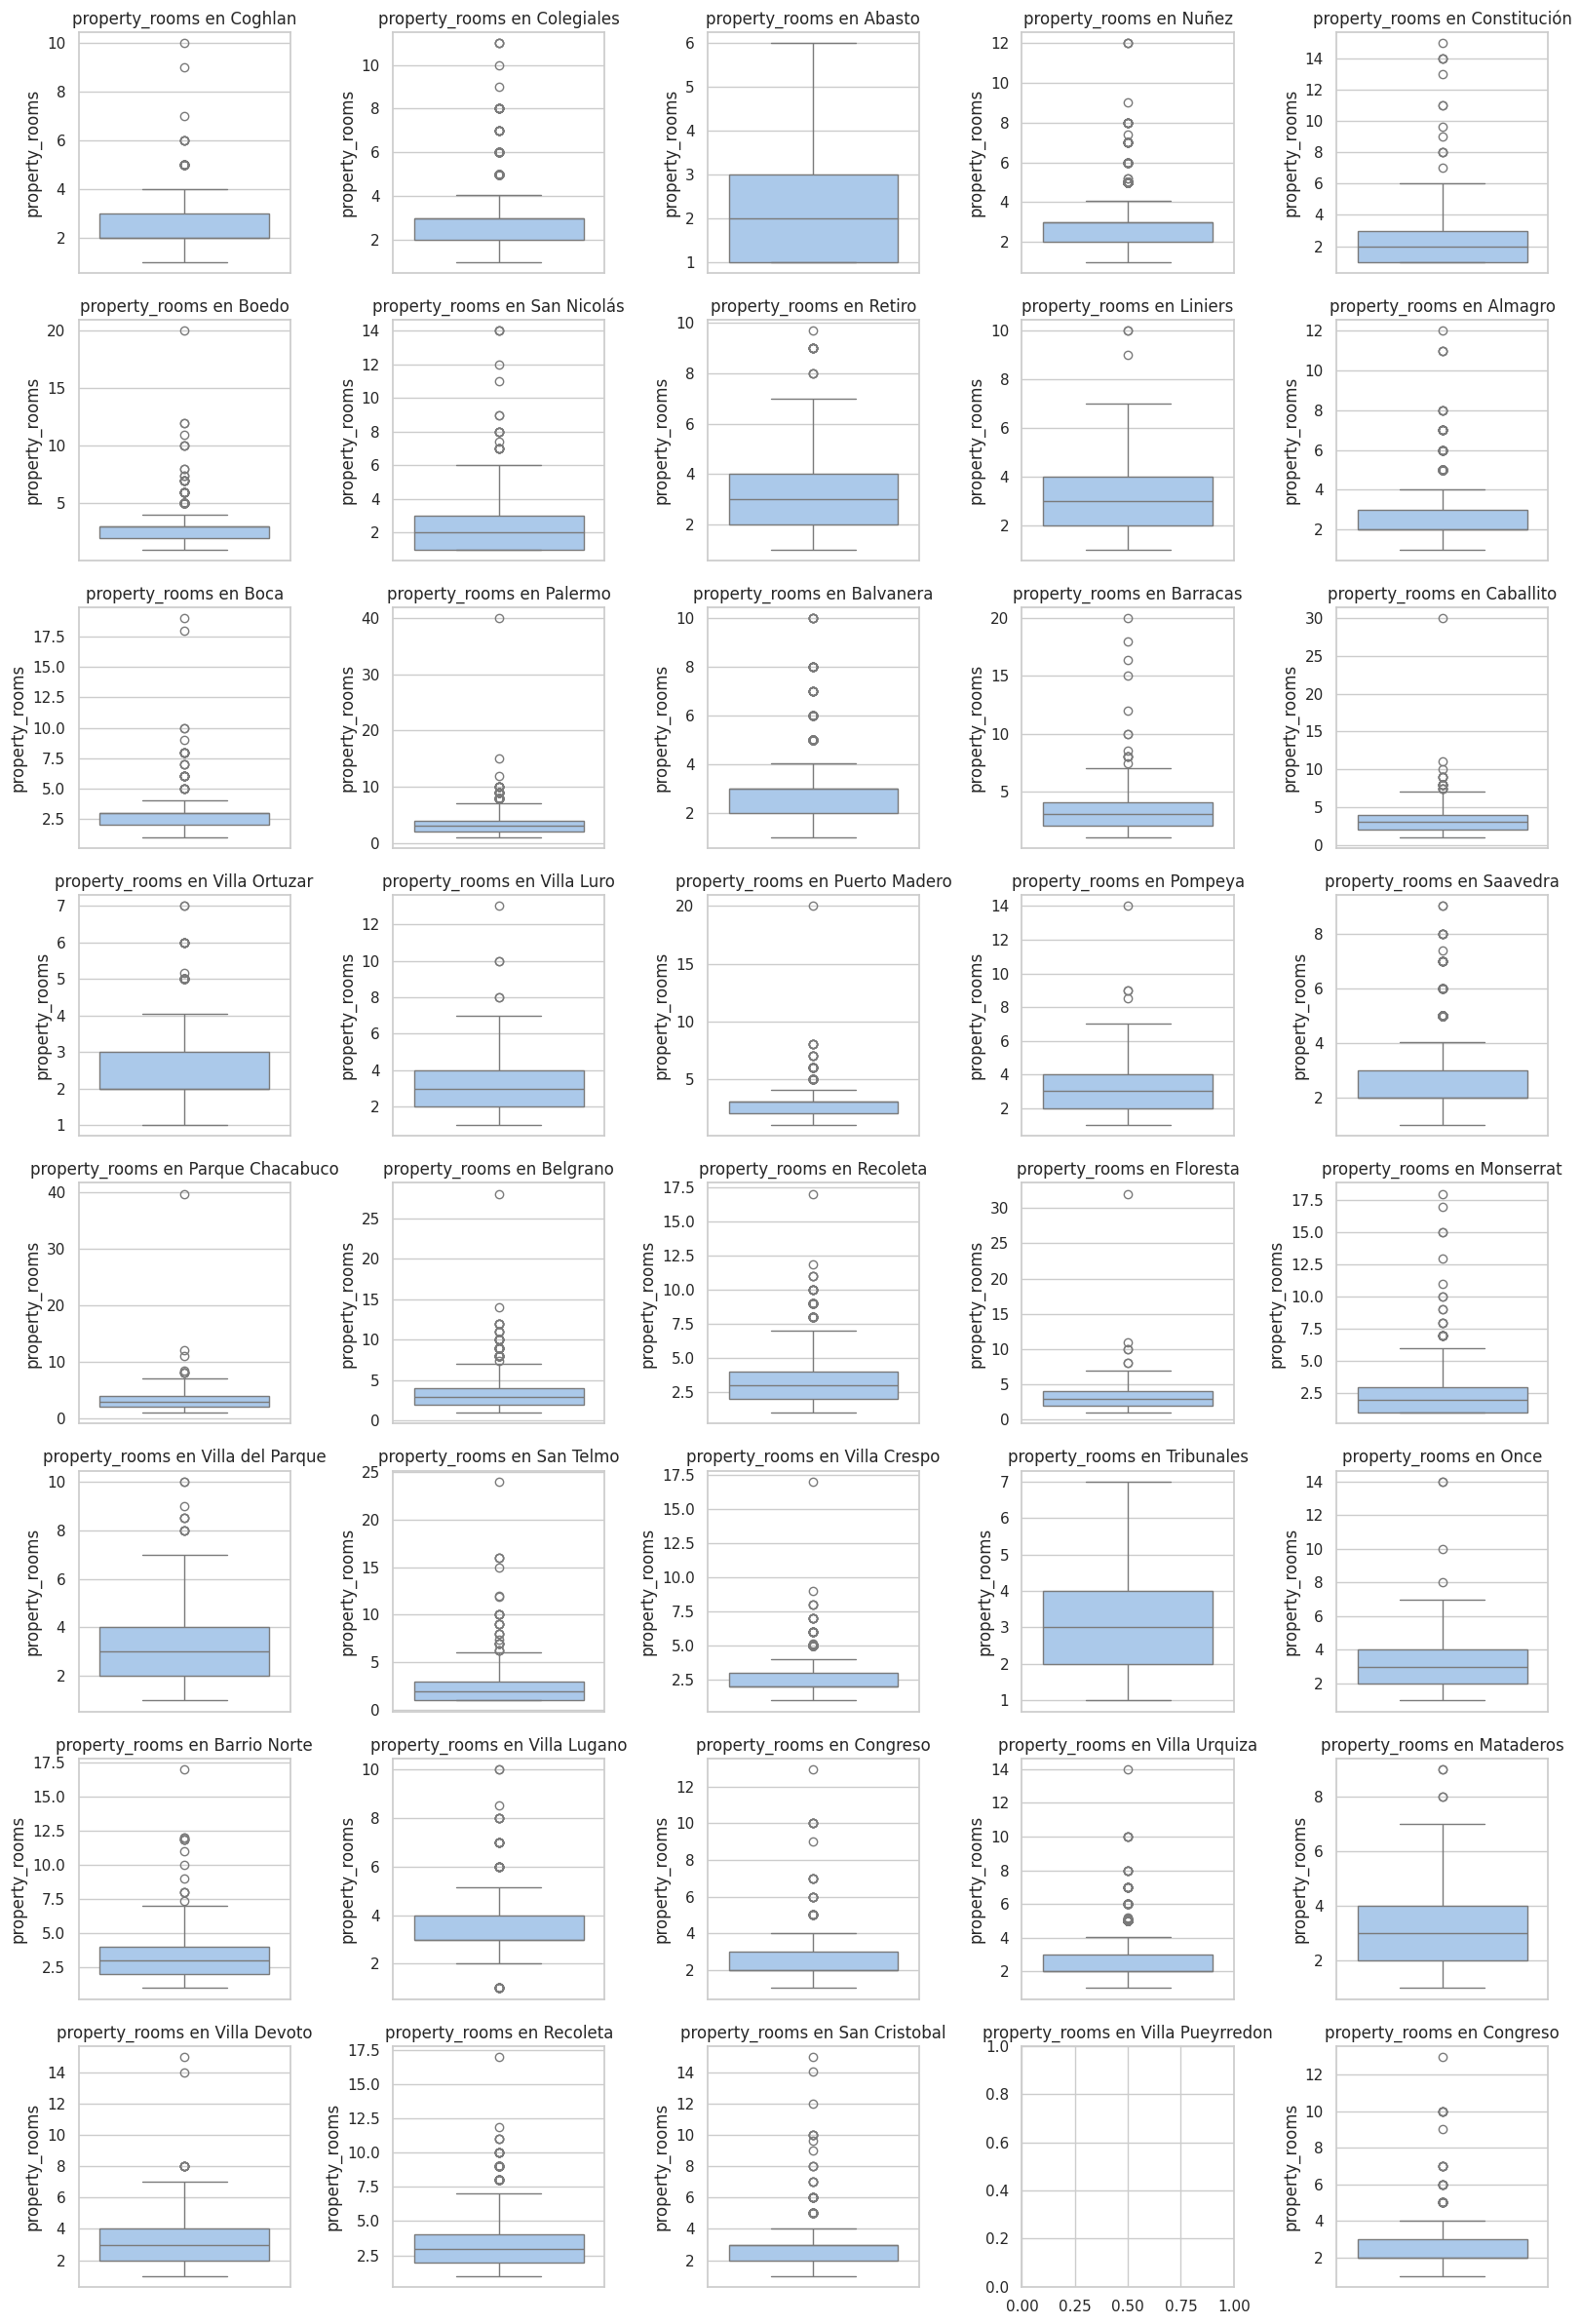

In [ ]:
plot_por_barrio(ds_train, 'property_rooms')

Si bien nuestro límite intercuartil era de 5.0 vemos una tendencia un poco superior al ver los boxplot por barrio, así que realizaremos una corrección en aquellos registros atípicos que superen los 10 ambientes.

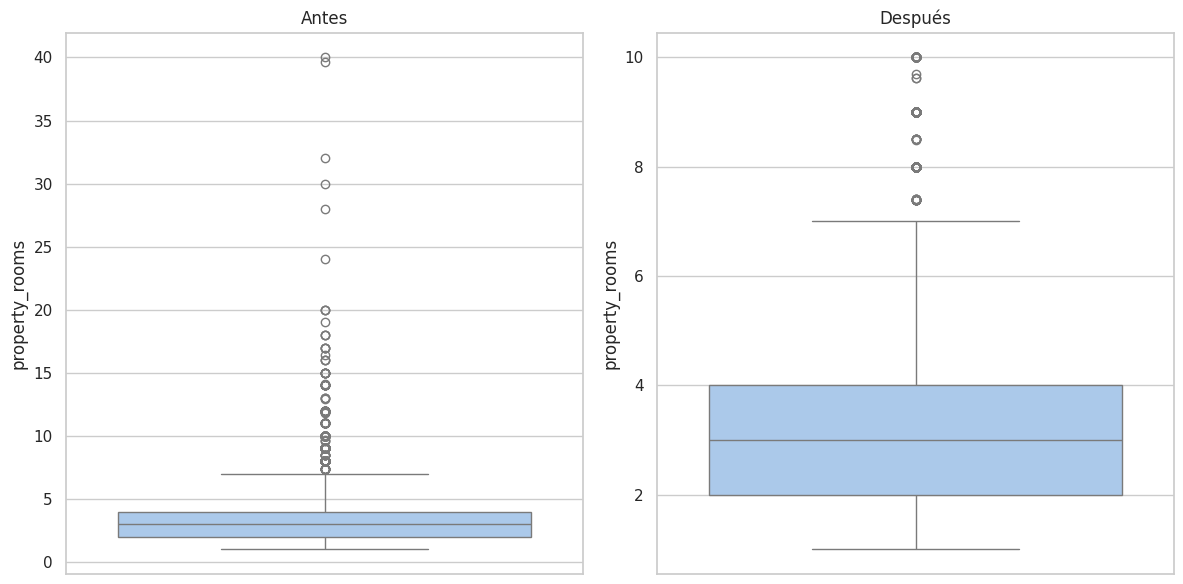

In [ ]:
#Normalizacion logaritmica
ds_train.loc[ds_train['property_rooms'] > 10.0, 'property_rooms'] = np.log(ds_train['property_rooms'])

#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_rooms')

In [ ]:
ds_train[(ds_train['property_rooms'] > 7.0)]

id  start_date    end_date created_on  \
128243  Mj2tZHhITY/y9W2UTnGo6w==  2021-07-01  9999-12-31 2021-07-01   
440708  g5dsY3PYIbZY4pp3+CuSxA==  2021-07-20  2021-08-26 2021-07-20   
91833   LriQZ+T+Xbzt/DaC9e3QiQ==  2021-08-03  2021-08-08 2021-08-03   
89489   6iQtmcGaWGarTIP6napDzA==  2021-05-14  2021-06-05 2021-05-14   
329630  VjyAHutPQVQq4ARXdkg69A==  2021-08-12  2021-09-03 2021-08-12   
...                          ...         ...         ...        ...   
162072  sbDhukV1HofQ4syugD2p6w==  2021-10-07  2021-10-08 2021-10-07   
170999  KlZw1lj+bU2Mg2arL5k50g==  2021-04-19  2021-06-05 2021-04-19   
301648  mtpUHpAUZ4hE/PR4Bevnxw==  2021-08-10  2021-09-15 2021-08-10   
432480  OdKgdQn/cJrFVoIUFZaPSA==  2021-12-16  2022-03-25 2021-12-16   
68261   RgwVvqqnl1RA+KjQv06asw==  2021-03-27  2021-05-27 2021-03-27   

          latitud   longitud             place_l3 property_type  \
128243 -34.610565 -58.500691         Monte Castro          Casa   
440708 -34.578491 -58.408168              Palermo  Departamento   
91833  -34.629306 -58.465354               Flores  Departamento   
89489  -34.596868 -58.383801             Recoleta  Departamento   
329630 -34.572411 -58.420593              Palermo  Departamento   
...           ...        ...                  ...           ...   
162072 -34.576855 -58.410590              Palermo  Departamento   
170999 -34.578002 -58.409141              Palermo  Departamento   
301648 -34.593316 -58.377201               Retiro  Departamento   
432480 -34.610995 -58.469020  Villa General Mitre            PH   
68261  -34.574454 -58.470503             Belgrano          Casa   

        property_rooms  property_bedrooms  property_surface_total  \
128243             8.0           4.000000                   200.0   
440708             8.0           4.000000                   366.0   
91833              8.0           2.079442                   275.0   
89489             10.0           6.000000                   388.0   
329630             8.0           4.000000                   450.0   
...                ...                ...                     ...   
162072             8.0           4.000000                   489.0   
170999             8.0           5.000000                   316.0   
301648             9.0           7.000000                   380.0   
432480             8.0           3.000000                   286.0   
68261              8.0           5.000000                   976.0   

        property_surface_covered  property_price  
128243                200.000000        310000.0  
440708                366.000000       1600000.0  
91833                 275.000000        219000.0  
89489                 311.000000        650000.0  
329630                450.000000       2600000.0  
...                          ...             ...  
162072                454.000000       3200000.0  
170999                363.710316       1200000.0  
301648                350.000000        650000.0  
432480                243.000000        280000.0  
68261                 650.000000       1500000.0  

[488 rows x 13 columns]

Tenemos 502 valores por sobre el máximo marcado por el bigote en el boxplot actual y que pueden ser considerados outliers. Reveeremos estos valores en otros análisis.

*Análisis según precio de la propiedad (property_price)*

<Axes: ylabel='property_price'>

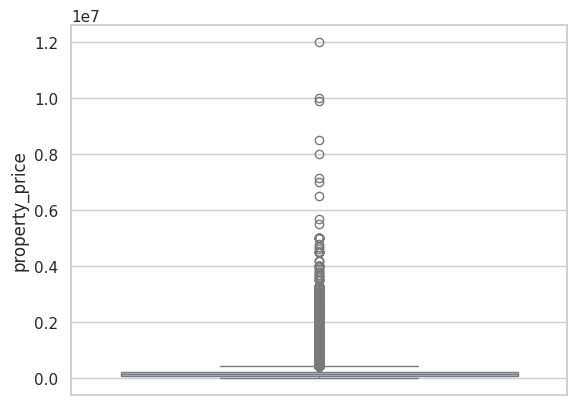

In [ ]:
sns.boxplot(y=ds_train.property_price)

In [ ]:
limite_rango_iq(ds_train, 'property_price')

(-115000.0, 305000.0)

Primero analizamos las anomalías más extremas, valores mayores o iguales a 8M.

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_price'] >= 8000000]
outlier

id  start_date    end_date created_on  \
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   
332190  PkbD1ixa/IWHlTjwozccRQ==  2021-09-17  2022-03-09 2021-09-17   
156777  8ChrVZoOYyEqAJMIP/pXoQ==  2021-02-17  2021-02-19 2021-02-17   

          latitud   longitud     place_l3 property_type  property_rooms  \
1140   -34.605781 -58.376705  San Nicolás  Departamento        4.514314   
148534 -34.565947 -58.442326     Belgrano          Casa        9.000000   
85725  -34.572494 -58.462433     Belgrano          Casa        5.000000   
332190 -34.593634 -58.377164       Retiro          Casa        9.690236   
156777 -34.608300 -58.371200    Monserrat          Casa        3.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
1140             3.150928                 10500.0                   10500.0   
148534           5.000000                  1763.0                    1763.0   
85725            4.000000                  3197.0                    3367.0   
332190           2.079442                  1166.0                    1485.0   
156777           2.000000                   225.0                      93.0   

        property_price  
1140         9900000.0  
148534       8000000.0  
85725       12000000.0  
332190      10000000.0  
156777       8500000.0

Buscando propiedades actualmente en venta en barrios y tamaños similares, parecería haber un error. Sin embargo, incluso haciendo un reducción de un decimo (valores más coherentes para esos varrios y tamaños de casas), estaríamos por sobre el límite intercuartil, asi que por ahora no haremos transformaciones.

Analicemos según barrio:

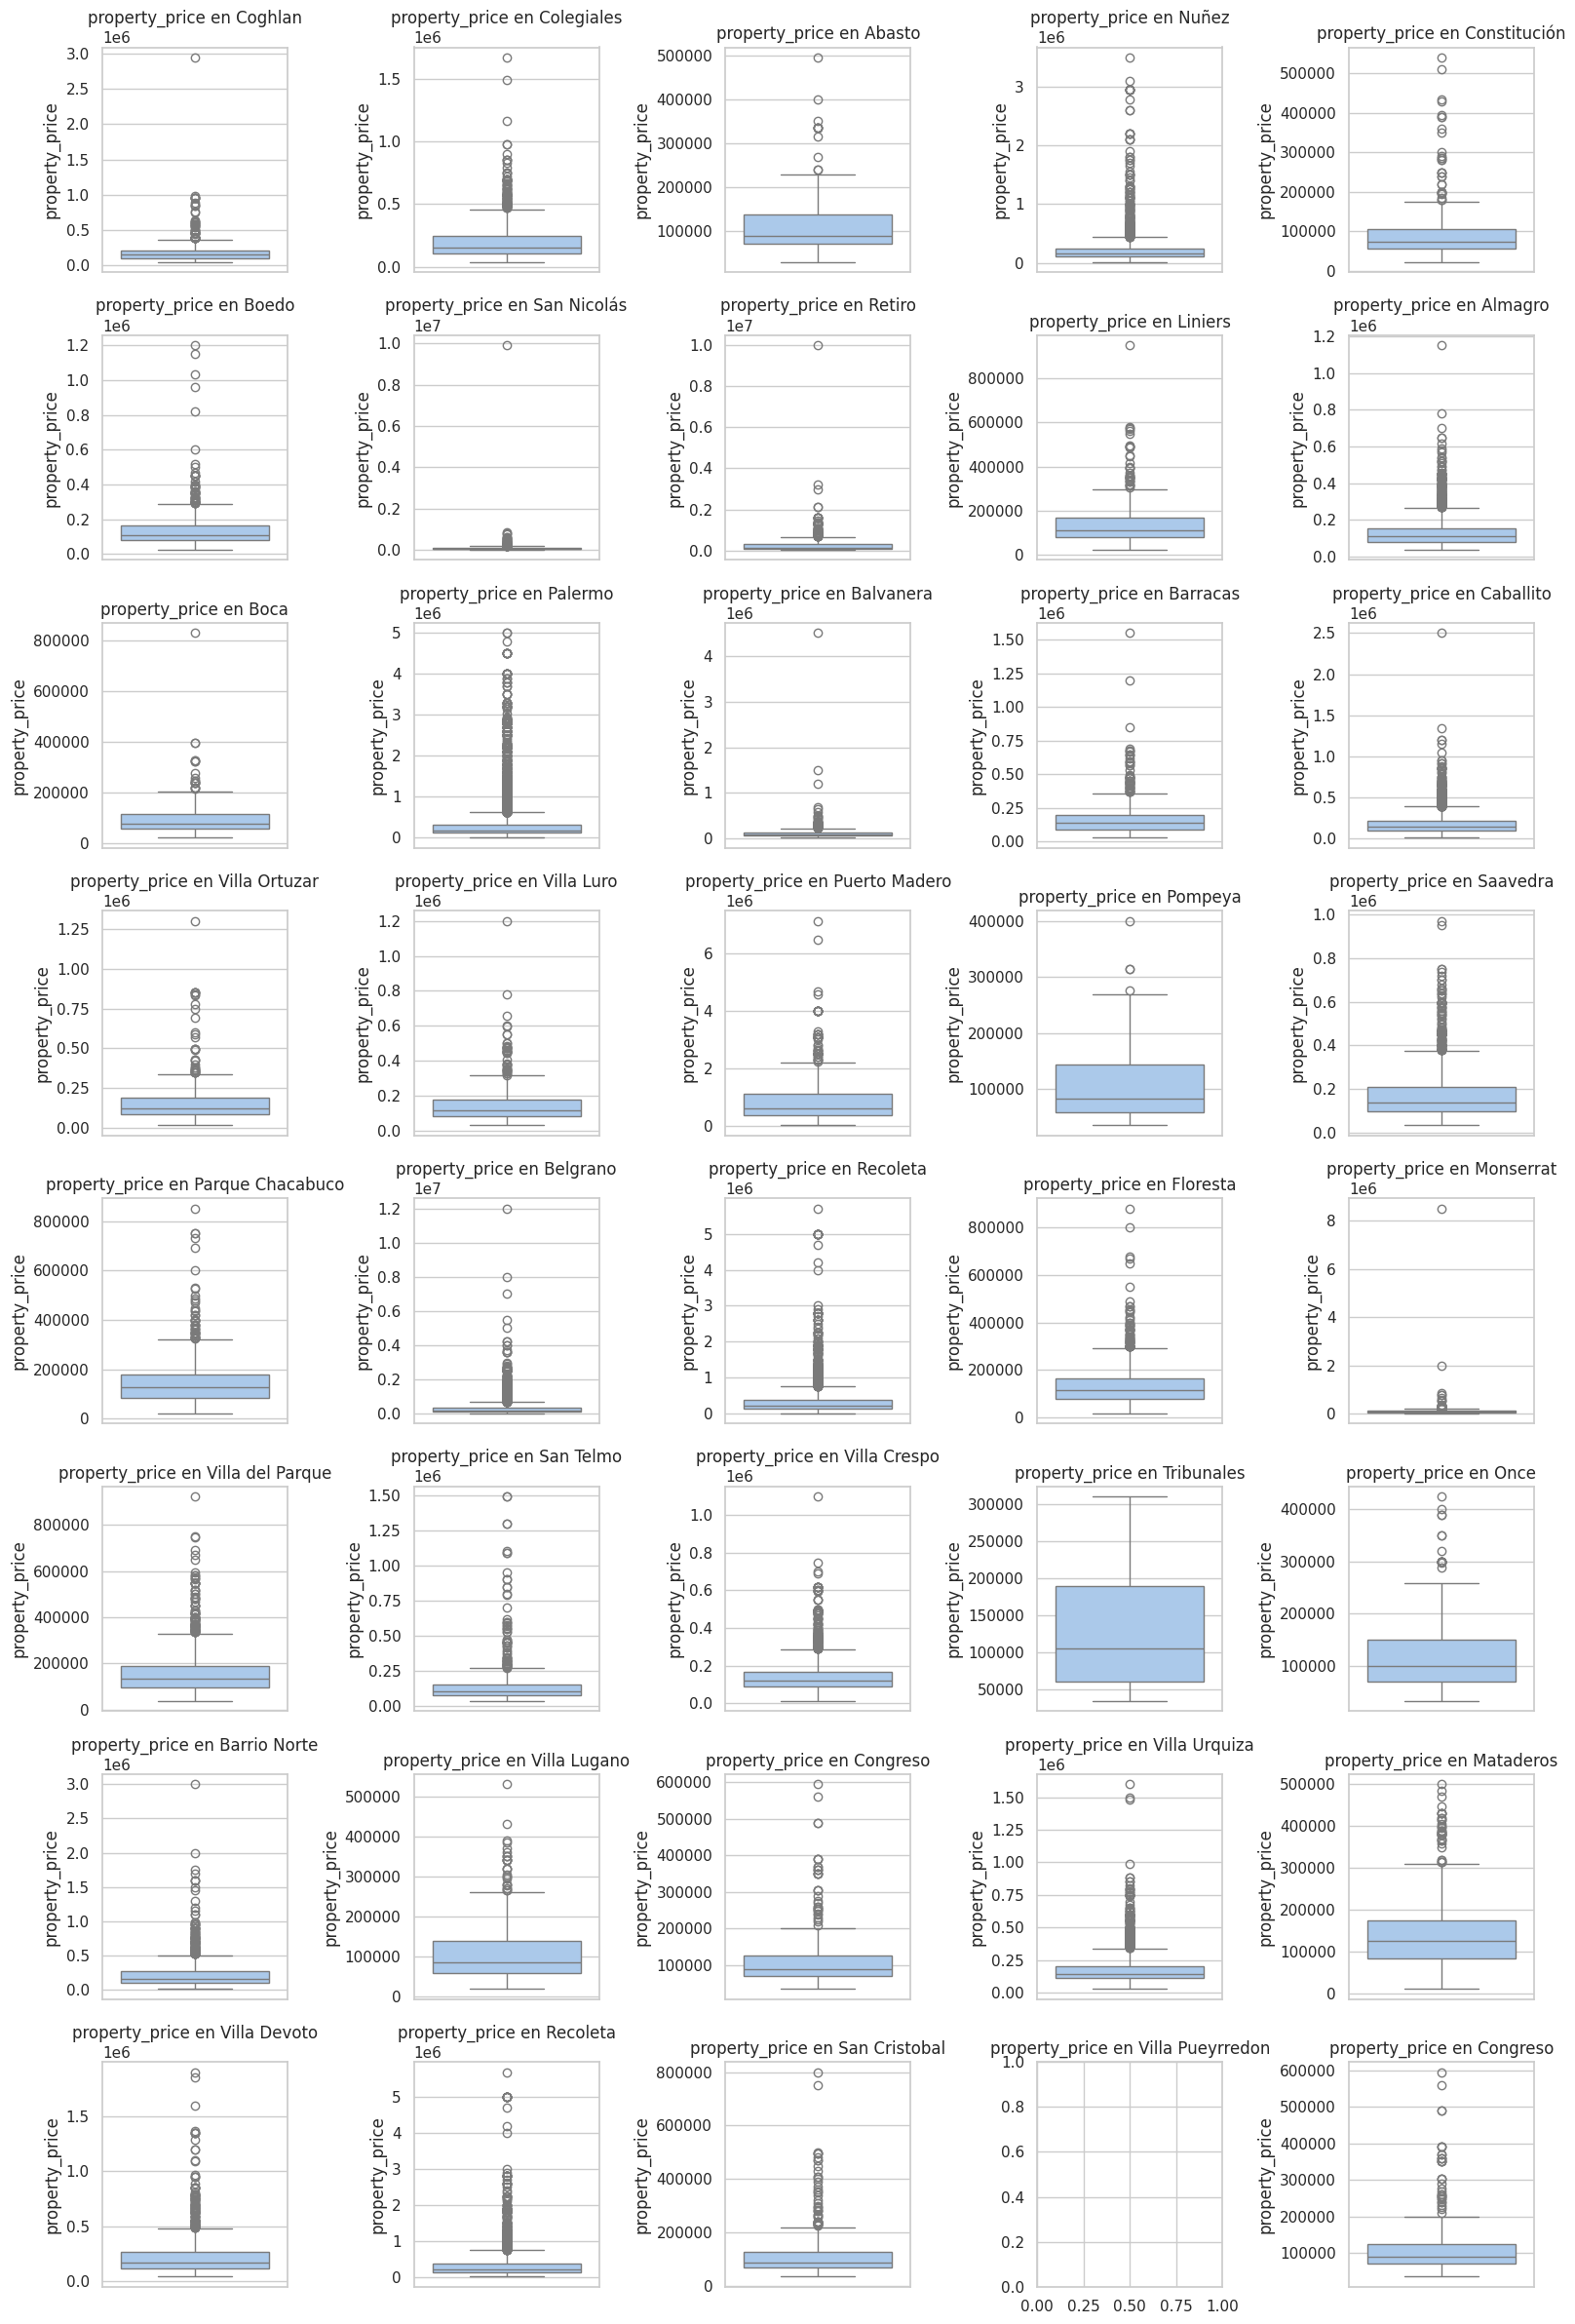

In [ ]:
plot_por_barrio(ds_train, 'property_price')

Hasta el momento, este el analisis según barrio menos homogéneo. Si tomamos el limite superior intercuartil general (305m), se distorcionarían totalmente los datos de barrios como Palermo y Puerto Madero. Teniendo en cuenta lo relevante que es éste dato a la hora de que se establezca el precio de una propiedad, solo trabajaremos con los outliers que sean extremos en el contexto de cada barrio (analisis multivariado).

*Análisis según superficie cubierta (property_surface_covered)*

<Axes: ylabel='property_surface_covered'>

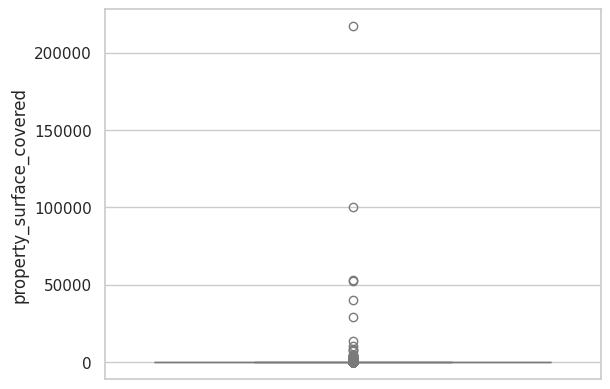

In [ ]:
sns.boxplot(y=ds_train.property_surface_covered)

In [ ]:
limite_rango_iq(ds_train, 'property_surface_covered')

(-32.0, 112.0)

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_covered'] <= 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_covered'].idxmin()
ds_train.loc[min_surface_index]

id                          gjDlqGq2nWf+CPc551sOLA==
start_date                                2021-01-12
end_date                                  2021-06-05
created_on                       2021-01-12 00:00:00
latitud                                   -34.572157
longitud                                  -58.494807
place_l3                               Villa Urquiza
property_type                           Departamento
property_rooms                                   3.0
property_bedrooms                                2.0
property_surface_total                     23.625144
property_surface_covered                         1.0
property_price                              285000.0
Name: 41987, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [ ]:
ds_train[ds_train['property_surface_covered'] < 15]

id  start_date    end_date created_on  \
41987   gjDlqGq2nWf+CPc551sOLA==  2021-01-12  2021-06-05 2021-01-12   
438085  QTGbh9/flIRvmqqlkwOl1w==  2021-10-27  2022-01-27 2021-10-27   
163076  FQSpU3pnT0PqVrPW7NXt8A==  2021-11-28  2022-01-27 2021-11-28   
149693  SXOEETY9QiPb9DxMopgwuw==  2021-05-12  2021-05-18 2021-05-12   
349791  lXU7oBMz1Ea9I174g43XCA==  2021-04-16  2021-06-05 2021-04-16   
...                          ...         ...         ...        ...   
67647   vccy/6SbgVmHL79zN+ceEw==  2021-08-02  2021-08-30 2021-08-02   
404529  d6ZFbQJQzrOl+bdwDJSfVA==  2021-08-13  2021-10-30 2021-08-13   
9388    exED0O9Df+ZJWS57zblzNA==  2021-05-18  2021-06-05 2021-05-18   
25852   sbx+ITFilLxyGxJRTCA3YQ==  2021-06-24  2021-06-30 2021-06-24   
55729   gqPMa7x2H3DETHcZAsv2xA==  2021-01-11  2021-06-05 2021-01-11   

          latitud   longitud          place_l3 property_type  property_rooms  \
41987  -34.572157 -58.494807     Villa Urquiza  Departamento             3.0   
438085 -34.582441 -58.472255     Villa Ortuzar  Departamento             1.0   
163076 -34.586016 -58.411172           Palermo  Departamento             1.0   
149693 -34.594682 -58.442248      Villa Crespo  Departamento             1.0   
349791 -34.633508 -58.474081          Floresta  Departamento             1.0   
...           ...        ...               ...           ...             ...   
67647  -34.623793 -58.402256     San Cristobal  Departamento             1.0   
404529 -34.577548 -58.430848           Palermo  Departamento             1.0   
9388   -34.588209 -58.438824           Palermo  Departamento             1.0   
25852  -34.586147 -58.417939           Palermo  Departamento             1.0   
55729  -34.585964 -58.515477  Villa Pueyrredón            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
41987                 2.0               23.625144                       1.0   
438085                1.0               38.000000                       1.0   
163076                1.0               31.000000                       1.0   
149693                1.0               38.000000                       1.0   
349791                1.0               33.000000                       1.0   
...                   ...                     ...                       ...   
67647                 1.0               36.000000                       1.0   
404529                1.0               40.000000                       1.0   
9388                  1.0               36.000000                       1.0   
25852                 1.0               29.000000                       1.0   
55729                 3.0              117.000000                       1.0   

        property_price  
41987         285000.0  
438085         83000.0  
163076        125000.0  
149693        130000.0  
349791         82500.0  
...                ...  
67647          50000.0  
404529        129000.0  
9388          110000.0  
25852          95000.0  
55729         215000.0  

[499 rows x 13 columns]

Tenemos 147 registros de propiedades que tienen menos de 15m^2 cubiertos, y si bien según código urbanistico de la Ciudad de Buenos Aires no permite departamentos tan pequeños, sabemos que eso puede infringirse. Bajo estos supuestos, y viendo los registros que aparecen, vamos a reemplazar aquellos con superficies demasiado pequeñas (menores a 10m^2) por la superficie total.

In [ ]:
# Reemplazamos el valor de superficie cubierta por el de superficie total cuando el valor sea menor a 10
ds_train.loc[ds_train['property_surface_covered'] < 10, 'property_surface_covered'] = ds_train.loc[ds_train['property_surface_covered'] < 10, 'property_surface_total']

In [ ]:
ds_train[ds_train['property_surface_covered'] < 15]

id  start_date    end_date created_on  \
38433   aZRjphLdiNfPd74mAGbrSg==  2021-07-05  2021-08-09 2021-07-05   
36421   VoyodCc8rftOZHr4TeYcpw==  2021-09-21  2022-02-03 2021-09-21   
326305  s4UQHlmed73o08wupnf2pg==  2021-08-27  9999-12-31 2021-08-27   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
41903   AEb8UstVhCKA3+hCfJU86A==  2021-01-12  2021-06-05 2021-01-12   
168082  nOmTA76B5Fc56I5HKId9Dg==  2021-04-30  2021-06-03 2021-04-30   
357158  OYlpRlGCDSlNEnjAZI3KUw==  2021-06-29  9999-12-31 2021-06-29   
333830  FfMyx7es1we4sMCZL2XVTw==  2021-12-28  2022-02-09 2021-12-28   
408338  OsE/mlsNuKXTyHkubQmHlA==  2021-03-05  2021-05-04 2021-03-05   
422372  N5b4Js+0AgOpW9hLOwOeDA==  2021-07-07  2022-01-27 2021-07-07   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
168108  aO8mzZYRhXeP+QU7ilBhLw==  2021-04-30  2021-06-03 2021-04-30   
268998  5GWt7TvAR8P5gOI8t1bVnw==  2021-01-19  2021-06-05 2021-01-19   
225485  LU1IAN2L0mz4+8+qGftckg==  2021-05-30  2021-06-18 2021-05-30   
19478   J0/gRyRPvFY0WmEU0nY1Fw==  2021-01-27  2021-08-17 2021-01-27   
41866   766MJy1wZVXIvaCTKrsisA==  2021-01-12  2021-06-05 2021-01-12   
227332  em6zu1jxzH6eFzsNOQhHBQ==  2021-02-12  2021-03-05 2021-02-12   
7869    WxvbiPA4bItk7Y2f7NSYJQ==  2021-02-09  9999-12-31 2021-02-09   
86014   pVG9sES9De/1eQ+tB90NjQ==  2021-03-26  2021-06-05 2021-03-26   
216786  YrQqgOmS9no9pw9tljj8Pw==  2021-12-22  2022-01-27 2021-12-22   

          latitud   longitud       place_l3 property_type  property_rooms  \
38433  -34.600832 -58.390383     Tribunales  Departamento        1.000000   
36421  -34.576061 -58.421289        Palermo  Departamento        3.000000   
326305 -34.606251 -58.384552    San Nicolás  Departamento        1.000000   
178234 -34.609567 -58.384745      Monserrat  Departamento        1.000000   
72233  -34.597934 -58.376981         Retiro  Departamento        1.000000   
41903  -34.579301 -58.465854  Villa Ortuzar  Departamento        1.000000   
168082 -34.606525 -58.430740      Caballito  Departamento        2.712902   
357158 -34.627164 -58.405943    San Nicolás            PH        1.810123   
333830 -34.600456 -58.376960         Retiro  Departamento        1.000000   
408338 -34.637323 -58.476409       Floresta  Departamento        1.000000   
422372 -34.589061 -58.391740       Recoleta  Departamento        2.000000   
76920  -34.625870 -58.384003   Constitución  Departamento        1.000000   
168108 -34.606525 -58.430740      Caballito  Departamento        2.712902   
268998 -34.554519 -58.491599       Saavedra  Departamento        2.000000   
225485 -34.597825 -58.376983         Retiro  Departamento        1.000000   
19478  -34.602170 -58.412383         Abasto  Departamento        2.000000   
41866  -34.611753 -58.516570   Villa Devoto  Departamento        1.000000   
227332 -34.633430 -58.480731       Floresta            PH        2.000000   
7869   -34.680073 -58.451069   Villa Lugano  Departamento        2.000000   
86014  -34.591110 -58.400685       Recoleta  Departamento        4.000000   
216786 -34.621967 -58.372598      San Telmo  Departamento        1.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
38433            1.000000               10.000000                 10.000000   
36421            2.995732              127.000000                 11.700000   
326305           1.000000                9.645880                  9.645880   
178234           1.000000               13.000000                 13.000000   
72233            1.000000               14.000000                 14.000000   
41903            1.000000                9.645880                  9.645880   
168082           1.776664               12.000000                 12.000000   
357158           1.000000               35.000000                 14.545865   
333830           1.000000               14.000000            

Ahora nos quedan 84 outliers.

In [ ]:
ds_train[ds_train['property_surface_covered'] > 15000]

id  start_date    end_date created_on  \
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
372779  XzTb7kTEpmAKiyhEGSWz4A==  2021-08-24  2021-09-03 2021-08-24   

          latitud   longitud          place_l3 property_type  property_rooms  \
106598 -34.587320 -58.401556      Barrio Norte  Departamento        2.000000   
352883 -34.550093 -58.483034          Saavedra  Departamento        1.000000   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa        3.680339   
72316  -34.578917 -58.429373           Palermo  Departamento        2.000000   
117835 -34.550093 -58.483034          Saavedra  Departamento        2.000000   
372779 -34.555278 -58.459786          Belgrano  Departamento        4.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
106598           1.000000            56740.000000                   52540.0   
352883           1.000000            29064.000000                   29064.0   
1932             3.402076           228142.236477                  217000.0   
72316            1.000000            61130.000000                   53030.0   
117835           1.000000            43086.000000                   40038.0   
372779           3.000000           100068.000000                  100051.0   

        property_price  
106598        175000.0  
352883         87400.0  
1932          250000.0  
72316         225000.0  
117835        114000.0  
372779        420000.0

Los casos de propiedades con superficie cubierta mayor a 15000, parecen ser errores de escala que pueden solucionarse facilmente.

In [ ]:
condition = ds_train['property_surface_covered'] > 15000
ds_train.loc[condition, 'property_surface_covered'] /= 1000

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 15000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_train[ds_train['property_surface_covered'] > 4000]

id  start_date    end_date created_on  \
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
314541  /lzClyxH96pdJl/JI2ofKg==  2021-01-06  2021-01-09 2021-01-06   
233699  McdySYNyXo2s4UZ2wypUig==  2021-03-20  2022-03-25 2021-03-20   
398069  Z41Yr6x3GUjyoxu+Afv4og==  2021-02-13  2021-03-18 2021-02-13   
94789   jXPtdq0ibrnXyePLhTi27g==  2021-09-24  2021-09-26 2021-09-24   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   

          latitud   longitud       place_l3 property_type  property_rooms  \
313745 -34.649174 -58.413106        Pompeya            PH        6.000000   
1140   -34.605781 -58.376705    San Nicolás  Departamento        4.514314   
314541 -34.555086 -58.459669       Belgrano  Departamento        1.000000   
233699 -34.606260 -58.452737   Villa Crespo  Departamento        2.000000   
398069 -34.558309 -58.459923       Belgrano  Departamento        2.000000   
94789  -34.614279 -58.361092      Caballito  Departamento        2.000000   
459847 -34.628247 -58.437696      Caballito  Departamento        4.000000   
405272 -34.634638 -58.473519       Floresta            PH        4.000000   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento        5.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
313745           2.000000                  8988.0                    7454.0   
1140             3.150928                 10500.0                   10500.0   
314541           1.000000                  5741.0                    4276.0   
233699           1.000000                  4224.0                    4224.0   
398069           1.000000                  6470.0                    4664.0   
94789            1.000000                  5312.0                    4809.0   
459847           3.000000                 18096.0                    8568.0   
405272           3.000000                  8306.0                    7755.0   
264624           4.000000                 14744.0                   13717.0   

        property_price  
313745        125000.0  
1140         9900000.0  
314541         85144.0  
233699        100000.0  
398069        149900.0  
94789         145000.0  
459847        324558.0  
405272        129000.0  
264624        330000.0

Mismo que con las propiedades con superficie cubierta mayor a 5000, parece ser un problema de escala.

In [ ]:
condition = ds_train['property_surface_covered'] > 4000
ds_train.loc[condition, 'property_surface_covered'] /= 100

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 4000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_train[ds_train['property_surface_covered'] > 1100]

id  start_date    end_date created_on  \
263173  YBglCjqyN6JqZ19HsNlLcQ==  2021-02-26  2021-03-27 2021-02-26   
374752  lVGHqc/czs40cpT7bW/dZg==  2021-10-13  2022-01-27 2021-10-13   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
311702  BrohyhZSUQXAX3HqkGGT+w==  2021-01-03  2021-01-08 2021-01-03   
104177  rGOjA8tJXYsGapcTNwIKQA==  2021-05-28  2021-06-13 2021-05-28   
187888  Fm8kbPskFOK8xGRsNuCvWQ==  2021-06-05  2021-06-13 2021-06-05   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   
165965  NzYulXk9Ddrc+qQoqAAGRw==  2021-04-30  2021-06-05 2021-04-30   
354376  oSruKb4+uOYztGpv3h5FKA==  2021-11-04  2022-01-27 2021-11-04   
177140  KVFit7mVm+epRM497KAchw==  2021-03-23  2021-06-05 2021-03-23   
332190  PkbD1ixa/IWHlTjwozccRQ==  2021-09-17  2022-03-09 2021-09-17   
51748   DGUIqrE5dSAcW7/SkUWaQA==  2021-06-23  2021-06-28 2021-06-23   
293109  tB9+CF2yPvyRqYvdI5wVqg==  2021-02-23  2021-06-25 2021-02-23   

          latitud   longitud          place_l3 property_type  property_rooms  \
263173 -34.557749 -58.471384          Belgrano          Casa        8.000000   
374752 -34.609391 -58.376433         Monserrat          Casa       10.000000   
148534 -34.565947 -58.442326          Belgrano          Casa        9.000000   
311702 -34.609829 -58.385083         Monserrat  Departamento        2.000000   
104177 -34.603992 -58.500042  Villa del Parque  Departamento        1.000000   
187888 -34.606771 -58.502277  Villa del Parque  Departamento        2.000000   
85725  -34.572494 -58.462433          Belgrano          Casa        5.000000   
165965 -34.557754 -58.471497           Coghlan          Casa        3.100047   
354376 -34.579394 -58.453519        Colegiales  Departamento        3.000000   
177140 -34.627279 -58.373637          Barracas          Casa        2.799207   
332190 -34.593634 -58.377164            Retiro          Casa        9.690236   
51748  -34.608698 -58.391820         Balvanera  Departamento       10.000000   
293109 -34.603310 -58.419520           Almagro  Departamento        3.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
263173           2.079442             2204.000000               2204.000000   
374752           1.962088             3048.000000               2038.518891   
148534           5.000000             1763.000000               1763.000000   
311702           1.000000             3939.000000               3939.000000   
104177           1.000000             3623.000000               3615.000000   
187888           1.000000             3425.000000               3425.000000   
85725            4.000000             3197.000000               3367.000000   
165965           2.072010             2266.000000               2266.000000   
354376           2.000000               41.000000               3837.000000   
177140           2.639057             2500.000000               2500.000000   
332190           2.079442             1166.000000               1485.000000   
51748            5.000000             1337.768201               1212.000000   
293109           2.000000             5239.000000               3149.671215   

        property_price  
263173       1400000.0  
374752       1985000.0  
148534       8000000.0  
311702         64000.0  
104177        110000.0  
187888         75000.0  
85725       12000000.0  
165965       2950000.0  
354376         83000.0  
177140       1550000.0  
332190      10000000.0  
51748        1500000.0  
293109        119000.0

Entre las anomalías que persisten parecería haber un caso de error de escala. A su vez, en los casos donde las habitaciones son regulares (<=5.0) haremos una corrección logaritmica.

In [ ]:
# Corección de error de tipeo/escala
ds_train.loc[ds_train['id'] == 'mzH1lMHi7l9z9MTU0eMRVg==', 'property_surface_covered'] /= 100
# Corrección logaritmica
ds_train.loc[(ds_train['property_bedrooms'] <= 5.0) & (ds_train['property_surface_covered'] > 1100), 'property_surface_covered'] = np.log(ds_train['property_surface_covered'])



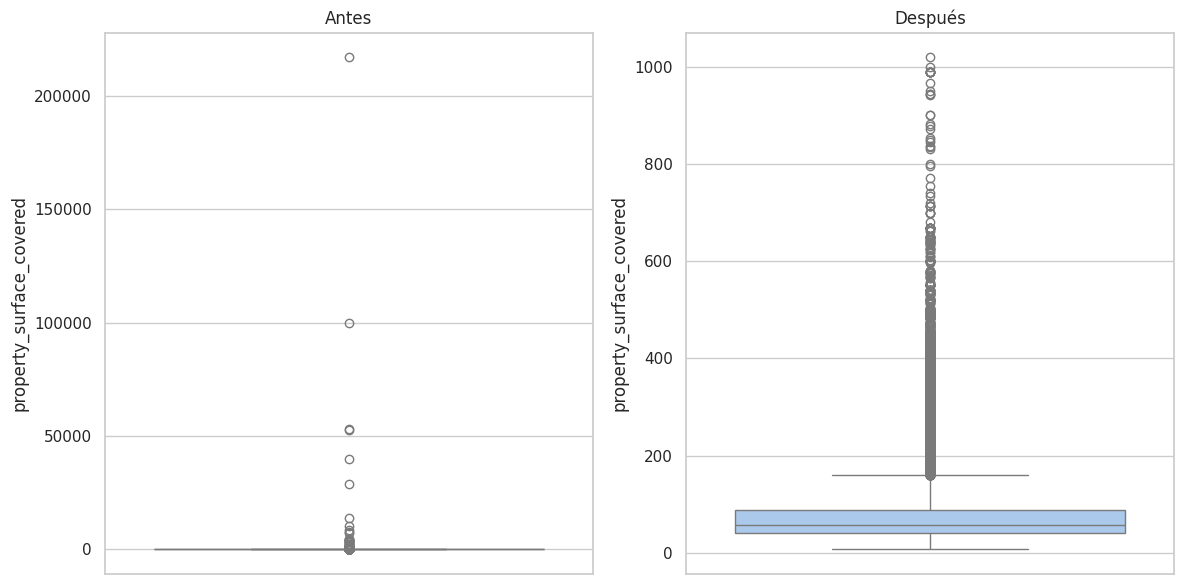

In [ ]:
#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_surface_covered')

*Análisis según superficie total (property_surface_total)*



<Axes: ylabel='property_surface_total'>

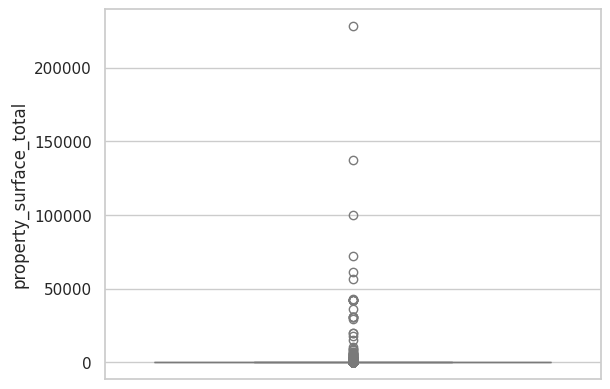

In [ ]:
sns.boxplot(y=ds_train.property_surface_total)

In [ ]:
limite_rango_iq(ds_train, 'property_surface_total')

(-45.00797394608749, 135.00797394608747)

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_total'] < 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_total'].idxmin()
ds_train.loc[min_surface_index]

id                          s4UQHlmed73o08wupnf2pg==
start_date                                2021-08-27
end_date                                  9999-12-31
created_on                       2021-08-27 00:00:00
latitud                                   -34.606251
longitud                                  -58.384552
place_l3                                 San Nicolás
property_type                           Departamento
property_rooms                                   1.0
property_bedrooms                                1.0
property_surface_total                       9.64588
property_surface_covered                     9.64588
property_price                               40548.0
Name: 326305, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [ ]:
ds_train[ds_train['property_surface_total'] < 15]

id  start_date    end_date created_on  \
41192   jLK6eCdVrULnEhLxS2kgUg==  2021-01-12  2021-02-05 2021-01-12   
38433   aZRjphLdiNfPd74mAGbrSg==  2021-07-05  2021-08-09 2021-07-05   
326305  s4UQHlmed73o08wupnf2pg==  2021-08-27  9999-12-31 2021-08-27   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
41903   AEb8UstVhCKA3+hCfJU86A==  2021-01-12  2021-06-05 2021-01-12   
168082  nOmTA76B5Fc56I5HKId9Dg==  2021-04-30  2021-06-03 2021-04-30   
32068   4jwFTdGy7N11fF14hLplcw==  2021-05-17  2021-06-05 2021-05-17   
168118  gsbwHqWC2NW1ywgCJd0xaQ==  2021-04-30  2021-06-03 2021-04-30   
333830  FfMyx7es1we4sMCZL2XVTw==  2021-12-28  2022-02-09 2021-12-28   
408338  OsE/mlsNuKXTyHkubQmHlA==  2021-03-05  2021-05-04 2021-03-05   
21153   us/N38vEYZarzdFzep5a9A==  2021-03-15  2021-03-25 2021-03-15   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
190609  /MC0i98hQuKwdP9/I6NdRg==  2021-10-09  2022-01-27 2021-10-09   
168108  aO8mzZYRhXeP+QU7ilBhLw==  2021-04-30  2021-06-03 2021-04-30   
154950  /4B1aoAn2OzWObpjXevrmg==  2021-02-03  2022-09-01 2021-02-03   
268998  5GWt7TvAR8P5gOI8t1bVnw==  2021-01-19  2021-06-05 2021-01-19   
225485  LU1IAN2L0mz4+8+qGftckg==  2021-05-30  2021-06-18 2021-05-30   
41866   766MJy1wZVXIvaCTKrsisA==  2021-01-12  2021-06-05 2021-01-12   
227332  em6zu1jxzH6eFzsNOQhHBQ==  2021-02-12  2021-03-05 2021-02-12   
7869    WxvbiPA4bItk7Y2f7NSYJQ==  2021-02-09  9999-12-31 2021-02-09   
216786  YrQqgOmS9no9pw9tljj8Pw==  2021-12-22  2022-01-27 2021-12-22   
334734  YHwlmP7ig5lyXrqU3Othlw==  2021-12-28  2022-01-27 2021-12-28   

          latitud   longitud       place_l3 property_type  property_rooms  \
41192  -34.635506 -58.417926          Boedo            PH        4.000000   
38433  -34.600832 -58.390383     Tribunales  Departamento        1.000000   
326305 -34.606251 -58.384552    San Nicolás  Departamento        1.000000   
178234 -34.609567 -58.384745      Monserrat  Departamento        1.000000   
72233  -34.597934 -58.376981         Retiro  Departamento        1.000000   
41903  -34.579301 -58.465854  Villa Ortuzar  Departamento        1.000000   
168082 -34.606525 -58.430740      Caballito  Departamento        2.712902   
32068  -34.571979 -58.446945       Belgrano  Departamento        3.000000   
168118 -34.606525 -58.430740      Caballito  Departamento        2.719904   
333830 -34.600456 -58.376960         Retiro  Departamento        1.000000   
408338 -34.637323 -58.476409       Floresta  Departamento        1.000000   
21153  -34.633819 -58.504568     Villa Luro  Departamento        3.000000   
76920  -34.625870 -58.384003   Constitución  Departamento        1.000000   
190609 -34.568710 -58.473026       Saavedra  Departamento        1.000000   
168108 -34.606525 -58.430740      Caballito  Departamento        2.712902   
154950 -34.637580 -58.500624     Villa Luro  Departamento        1.000000   
268998 -34.554519 -58.491599       Saavedra  Departamento        2.000000   
225485 -34.597825 -58.376983         Retiro  Departamento        1.000000   
41866  -34.611753 -58.516570   Villa Devoto  Departamento        1.000000   
227332 -34.633430 -58.480731       Floresta            PH        2.000000   
7869   -34.680073 -58.451069   Villa Lugano  Departamento        2.000000   
216786 -34.621967 -58.372598      San Telmo  Departamento        1.000000   
334734 -34.563734 -58.483824  Villa Urquiza  Departamento        2.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
41192            3.000000               11.000000                 75.000000   
38433            1.000000               10.000000                 10.000000   
326305           1.000000                9.645880                  9.645880   
178234           1.000000               13.000000                 13.000000   
72233            1.000000               14.000000                 14.000000   
41

Por las razones ya expuestas y teniendo en cuenta que son todos departamentos, decidimos reemplazar los datos de superficie total por los de superficie cubierta.

In [ ]:
# Reemplazamos el valor de superficie cubierta por el de superficie total cuando el valor sea menor a 10
ds_train.loc[ds_train['property_surface_total'] < 15, 'property_surface_total'] = ds_train.loc[ds_train['property_surface_total'] < 15, 'property_surface_covered']

In [ ]:
# Revisamos y solo quedan aquellos casos donde la superficie cubierta también era menor a 15.
ds_train[ds_train['property_surface_total'] < 15]

id  start_date    end_date created_on  \
38433   aZRjphLdiNfPd74mAGbrSg==  2021-07-05  2021-08-09 2021-07-05   
326305  s4UQHlmed73o08wupnf2pg==  2021-08-27  9999-12-31 2021-08-27   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
41903   AEb8UstVhCKA3+hCfJU86A==  2021-01-12  2021-06-05 2021-01-12   
168082  nOmTA76B5Fc56I5HKId9Dg==  2021-04-30  2021-06-03 2021-04-30   
333830  FfMyx7es1we4sMCZL2XVTw==  2021-12-28  2022-02-09 2021-12-28   
408338  OsE/mlsNuKXTyHkubQmHlA==  2021-03-05  2021-05-04 2021-03-05   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
168108  aO8mzZYRhXeP+QU7ilBhLw==  2021-04-30  2021-06-03 2021-04-30   
268998  5GWt7TvAR8P5gOI8t1bVnw==  2021-01-19  2021-06-05 2021-01-19   
225485  LU1IAN2L0mz4+8+qGftckg==  2021-05-30  2021-06-18 2021-05-30   
41866   766MJy1wZVXIvaCTKrsisA==  2021-01-12  2021-06-05 2021-01-12   
227332  em6zu1jxzH6eFzsNOQhHBQ==  2021-02-12  2021-03-05 2021-02-12   
7869    WxvbiPA4bItk7Y2f7NSYJQ==  2021-02-09  9999-12-31 2021-02-09   
216786  YrQqgOmS9no9pw9tljj8Pw==  2021-12-22  2022-01-27 2021-12-22   

          latitud   longitud       place_l3 property_type  property_rooms  \
38433  -34.600832 -58.390383     Tribunales  Departamento        1.000000   
326305 -34.606251 -58.384552    San Nicolás  Departamento        1.000000   
178234 -34.609567 -58.384745      Monserrat  Departamento        1.000000   
72233  -34.597934 -58.376981         Retiro  Departamento        1.000000   
41903  -34.579301 -58.465854  Villa Ortuzar  Departamento        1.000000   
168082 -34.606525 -58.430740      Caballito  Departamento        2.712902   
333830 -34.600456 -58.376960         Retiro  Departamento        1.000000   
408338 -34.637323 -58.476409       Floresta  Departamento        1.000000   
76920  -34.625870 -58.384003   Constitución  Departamento        1.000000   
168108 -34.606525 -58.430740      Caballito  Departamento        2.712902   
268998 -34.554519 -58.491599       Saavedra  Departamento        2.000000   
225485 -34.597825 -58.376983         Retiro  Departamento        1.000000   
41866  -34.611753 -58.516570   Villa Devoto  Departamento        1.000000   
227332 -34.633430 -58.480731       Floresta            PH        2.000000   
7869   -34.680073 -58.451069   Villa Lugano  Departamento        2.000000   
216786 -34.621967 -58.372598      San Telmo  Departamento        1.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
38433            1.000000               10.000000                 10.000000   
326305           1.000000                9.645880                  9.645880   
178234           1.000000               13.000000                 13.000000   
72233            1.000000               14.000000                 14.000000   
41903            1.000000                9.645880                  9.645880   
168082           1.776664               12.000000                 12.000000   
333830           1.000000               14.000000                 14.000000   
408338           1.000000               12.795424                 12.795424   
76920            1.000000               14.000000                 14.000000   
168108           1.776664               12.000000                 12.000000   
268998           1.000000               11.534947                 11.534947   
225485           1.000000               13.000000                 13.000000   
41866            1.000000                9.645880                  9.645880   
227332           1.000000               10.485099                 10.485099   
7869             1.000000               10.485099                 10.485099   
216786           1.000000               14.000000                 14.000000   

        property_price  
38433          35000.0  
326305         40548.0  
178234         55000.0  
72233          45200.0  
41903          98000.0  
168082         220

In [ ]:
ds_train[ds_train['property_surface_total'] > 100000]

id  start_date    end_date created_on  \
129214  tJ7TjXeyIl+4KPkaPqyAYA==  2021-07-01  9999-12-31 2021-07-01   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
372779  XzTb7kTEpmAKiyhEGSWz4A==  2021-08-24  2021-09-03 2021-08-24   

          latitud   longitud          place_l3 property_type  property_rooms  \
129214 -34.599421 -58.386867      Barrio Norte  Departamento        5.000000   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa        3.680339   
372779 -34.555278 -58.459786          Belgrano  Departamento        4.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
129214           3.000000           137000.000000                   135.000   
1932             3.402076           228142.236477                   217.000   
372779           3.000000           100068.000000                   100.051   

        property_price  
129214        390000.0  
1932          250000.0  
372779        420000.0

En el caso de la propiedad de Parque Chacabuco, ninguno de los datos tiene coherencia al mirarlos en conjunto: una casa de 22.75 ambientes, y 17.23 habitaciones, con una superficie cubierta de 217.0 y total de 177198m^2. Tendriamos que imputar todos estos datos lo cual no tendría sentido, nos quedariamos con poco material real.

En los otros dos casos, parece ser más un error de escala asi que lo normalizamos.

In [ ]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_surface_total'] > 170000].index
ds_train.drop(id_outlier,inplace=True)

<ipython-input-380-5a202d8d3887>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Modificamos los otros
condition = ds_train['property_surface_total'] > 100000
ds_train.loc[condition, 'property_surface_total'] /= 1000

ds_train[ds_train['property_surface_total'] > 100000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_train[ds_train['property_surface_total'] > 7000]

id  start_date    end_date created_on  \
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
370919  9p8XKpRRE9vzUT7Y/5FZ7Q==  2021-04-24  2021-06-05 2021-04-24   
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
370918  rnFgWleVdid1Czn05PkodA==  2021-04-24  2021-06-05 2021-04-24   
370922  MkaLWAz6PgutYgXwXxPEjQ==  2021-04-24  2021-06-05 2021-04-24   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
370921  DhCI1Vz1PAu5fOy930TFXw==  2021-04-24  2021-06-05 2021-04-24   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
237392  wGXDCrWhpDX+JQBrC+7jpA==  2021-02-27  2021-03-03 2021-02-27   
84073   vMD1fCSS0kedOs8Bk/PCjA==  2021-02-05  2021-05-16 2021-02-05   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
304492  Psg4w1RO9GxZAski6P2B8g==  2021-04-15  2021-06-05 2021-04-15   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
370917  OC6HYSBo/pqio5ZTLgoPvg==  2021-04-24  2021-06-05 2021-04-24   
275253  5nXtCXuxHhkZ51syuRB7YQ==  2021-09-15  2021-10-07 2021-09-15   
324541  s0do8ciUehI3xXZNULgg+Q==  2021-03-03  2021-03-23 2021-03-03   
219021  WQU6YIN+y4z30xaPRG4LHQ==  2021-03-07  2022-02-09 2021-03-07   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
362741  G7sKDYpvhrBrps0xzAQrmQ==  2021-01-16  2021-04-14 2021-01-16   
370932  IQUQeru+sjv8TBWlLfs+SA==  2021-04-24  2021-06-05 2021-04-24   
370920  HVcSoFtn8OjGl2rbv0GsBw==  2021-04-24  2021-06-05 2021-04-24   
263945  xTMT4WGUrto9Ee8CBjxUxw==  2021-02-26  2021-02-28 2021-02-26   
300394  E2FhGbtCzmdLHk9QEY47BA==  2021-08-10  2021-09-15 2021-08-10   

          latitud   longitud       place_l3 property_type  property_rooms  \
313745 -34.649174 -58.413106        Pompeya            PH        6.000000   
370919 -34.571747 -58.422612        Palermo  Departamento        5.000000   
106598 -34.587320 -58.401556   Barrio Norte  Departamento        2.000000   
1140   -34.605781 -58.376705    San Nicolás  Departamento        4.514314   
370918 -34.571747 -58.422612        Palermo  Departamento        4.000000   
370922 -34.571747 -58.422612        Palermo  Departamento        5.000000   
352883 -34.550093 -58.483034       Saavedra  Departamento        1.000000   
370921 -34.571747 -58.422612        Palermo  Departamento        5.000000   
72316  -34.578917 -58.429373        Palermo  Departamento        2.000000   
237392 -34.628721 -58.421383          Boedo            PH        4.000000   
84073  -34.588175 -58.396261       Recoleta  Departamento        1.000000   
117835 -34.550093 -58.483034       Saavedra  Departamento        2.000000   
304492 -34.579163 -58.455725     Colegiales  Departamento        1.000000   
459847 -34.628247 -58.437696      Caballito  Departamento        4.000000   
370917 -34.571747 -58.422612        Palermo  Departamento        4.000000   
275253 -34.579163 -58.455725     Colegiales  Departamento        1.000000   
324541 -34.628721 -58.421383          Boedo            PH        4.000000   
219021 -34.636532 -58.376406       Barracas  Departamento        4.000000   
405272 -34.634638 -58.473519       Floresta            PH        4.000000   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento        5.000000   
362741 -34.579163 -58.455725     Colegiales  Departamento        1.000000   
370932 -34.571747 -58.422612        Palermo  Departamento        4.000000   
370920 -34.571747 -58.422612        Palermo  Departamento        5.000000   
263945 -34.576096 -58.441278        Palermo  Departamento        3.000000   
300394 -34.579163 -58.455725     Colegiales  Departamento        1.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
313745           2.000000                  8988.0                    74.540   
370919           4.000

Se ve una tendencia entre la superficie total y la superficie cubierta que indicaría un error de escala. Vamos a corregirlo.

In [ ]:
# Buscamos las filas donde property_surface_total / 100 == property_surface_covered y hacemos una máscara.
mask = ds_train['property_surface_total'] / 100 == ds_train['property_surface_covered']

# Reemplazamos property_surface_total con property_surface_covered en esos casos
ds_train.loc[mask, 'property_surface_total'] = ds_train.loc[mask, 'property_surface_covered']

In [ ]:
ds_train[ds_train['property_surface_total'] > 7000]

id  start_date    end_date created_on  \
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
370919  9p8XKpRRE9vzUT7Y/5FZ7Q==  2021-04-24  2021-06-05 2021-04-24   
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
370918  rnFgWleVdid1Czn05PkodA==  2021-04-24  2021-06-05 2021-04-24   
370922  MkaLWAz6PgutYgXwXxPEjQ==  2021-04-24  2021-06-05 2021-04-24   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
370921  DhCI1Vz1PAu5fOy930TFXw==  2021-04-24  2021-06-05 2021-04-24   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
237392  wGXDCrWhpDX+JQBrC+7jpA==  2021-02-27  2021-03-03 2021-02-27   
84073   vMD1fCSS0kedOs8Bk/PCjA==  2021-02-05  2021-05-16 2021-02-05   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
304492  Psg4w1RO9GxZAski6P2B8g==  2021-04-15  2021-06-05 2021-04-15   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
370917  OC6HYSBo/pqio5ZTLgoPvg==  2021-04-24  2021-06-05 2021-04-24   
275253  5nXtCXuxHhkZ51syuRB7YQ==  2021-09-15  2021-10-07 2021-09-15   
324541  s0do8ciUehI3xXZNULgg+Q==  2021-03-03  2021-03-23 2021-03-03   
219021  WQU6YIN+y4z30xaPRG4LHQ==  2021-03-07  2022-02-09 2021-03-07   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
362741  G7sKDYpvhrBrps0xzAQrmQ==  2021-01-16  2021-04-14 2021-01-16   
370932  IQUQeru+sjv8TBWlLfs+SA==  2021-04-24  2021-06-05 2021-04-24   
370920  HVcSoFtn8OjGl2rbv0GsBw==  2021-04-24  2021-06-05 2021-04-24   
263945  xTMT4WGUrto9Ee8CBjxUxw==  2021-02-26  2021-02-28 2021-02-26   
300394  E2FhGbtCzmdLHk9QEY47BA==  2021-08-10  2021-09-15 2021-08-10   

          latitud   longitud       place_l3 property_type  property_rooms  \
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
370919 -34.571747 -58.422612        Palermo  Departamento             5.0   
106598 -34.587320 -58.401556   Barrio Norte  Departamento             2.0   
370918 -34.571747 -58.422612        Palermo  Departamento             4.0   
370922 -34.571747 -58.422612        Palermo  Departamento             5.0   
352883 -34.550093 -58.483034       Saavedra  Departamento             1.0   
370921 -34.571747 -58.422612        Palermo  Departamento             5.0   
72316  -34.578917 -58.429373        Palermo  Departamento             2.0   
237392 -34.628721 -58.421383          Boedo            PH             4.0   
84073  -34.588175 -58.396261       Recoleta  Departamento             1.0   
117835 -34.550093 -58.483034       Saavedra  Departamento             2.0   
304492 -34.579163 -58.455725     Colegiales  Departamento             1.0   
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   
370917 -34.571747 -58.422612        Palermo  Departamento             4.0   
275253 -34.579163 -58.455725     Colegiales  Departamento             1.0   
324541 -34.628721 -58.421383          Boedo            PH             4.0   
219021 -34.636532 -58.376406       Barracas  Departamento             4.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
362741 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370932 -34.571747 -58.422612        Palermo  Departamento             4.0   
370920 -34.571747 -58.422612        Palermo  Departamento             5.0   
263945 -34.576096 -58.441278        Palermo  Departamento             3.0   
300394 -34.579163 -58.455725     Colegiales  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
313745                2.0                  8988.0                    74.540   
370919                4.0                 42110.0                   307.000   
106598                1.0                 56740.0                    52.540   
370918      

Algunos registros específicos parecen ser errores de tipeo/escala. Los corregimos manualmente y el resto serán corregidos logaritmicamente.

In [ ]:
# Corección de error de tipeo/escala
condition = (ds_train['property_surface_total'] == 31000) & (ds_train['property_surface_covered'] == 26)
condition2 = (ds_train['property_surface_total'] == 42110.0) & (ds_train['property_surface_covered'] == 307)
ds_train.loc[condition, 'property_surface_total'] /= 1000
ds_train.loc[condition2, 'property_surface_total'] /= 100


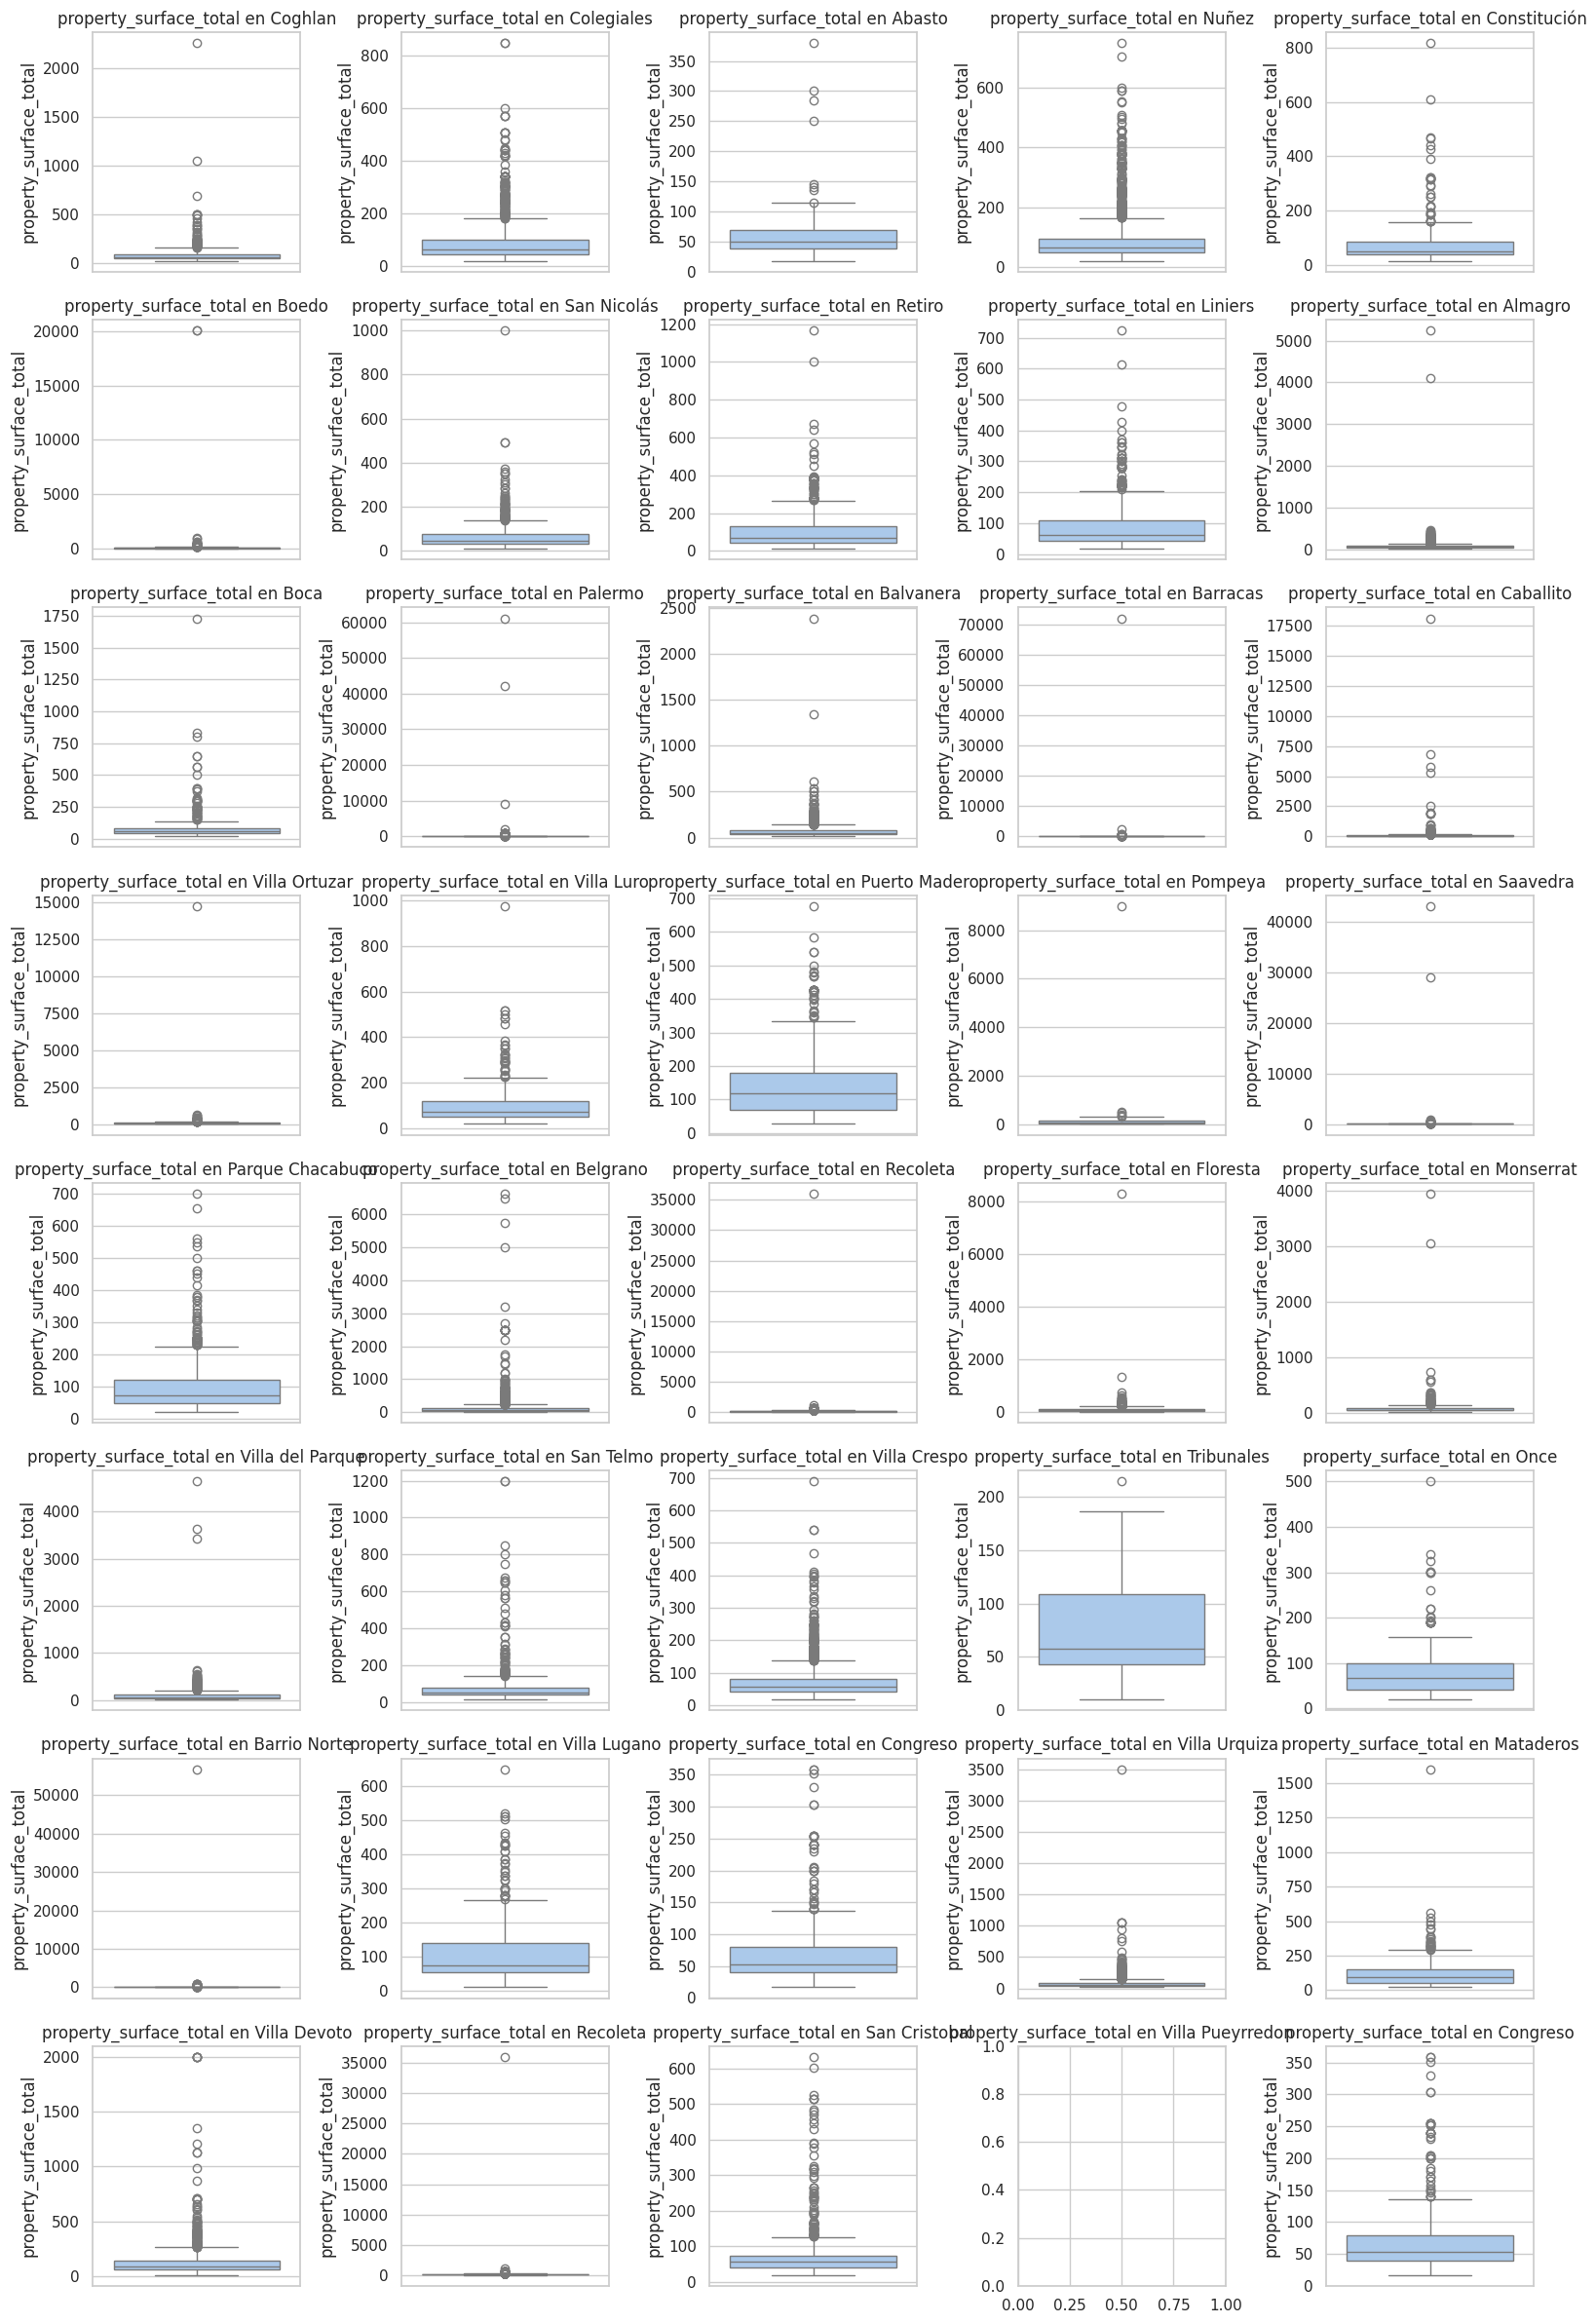

In [ ]:
plot_por_barrio(ds_train, 'property_surface_total')

Podemos ver en las comparaciones de los barrios que incluso en aquellos que tienen más variaciones de tamaño de superficie total, los valores por encima de 3000 son outliers extremos, asi que normalizaremos esos valores.

In [ ]:
# Corrección logaritmica
ds_train.loc[(ds_train['property_surface_total'] > 3000.0), 'property_surface_total'] = np.log(ds_train['property_surface_total'])

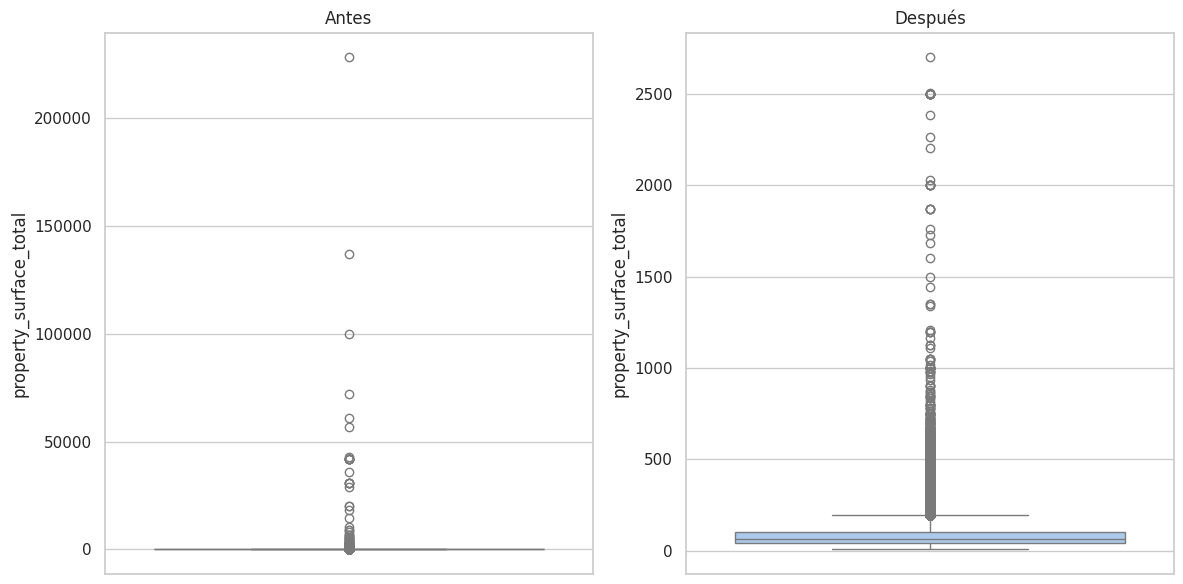

In [ ]:
#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_surface_total')

**Z-Score, normal y modificado**

In [ ]:
def plot_z(df, variable):
  plt.hist(df[variable])
  plt.title("Histograma Z-Score "+ variable)
  plt.xlabel("Z-Score "+variable)
  plt.tight_layout()
  plt.show()
  return

<ipython-input-390-1ce1084e760a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-390-1ce1084e760a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



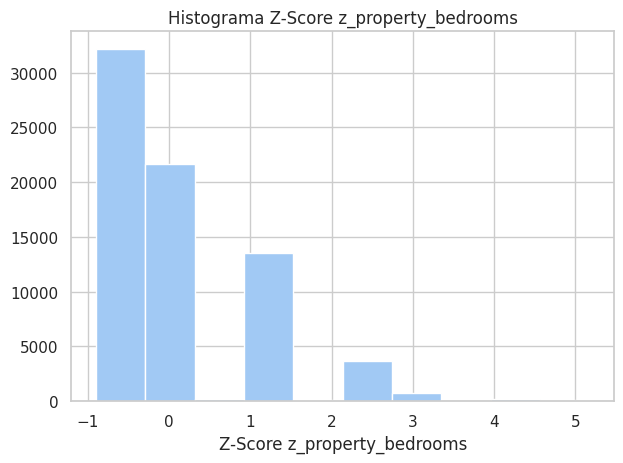

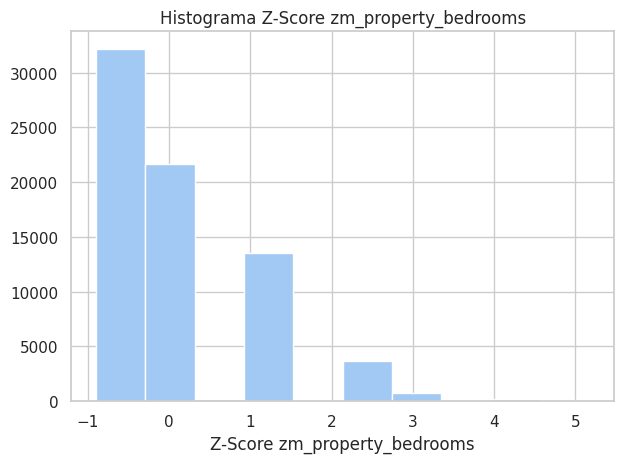

In [ ]:
# Z Score property_bedrooms
ds_train['z_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)
ds_train['zm_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)

plot_z(ds_train, 'z_property_bedrooms')
plot_z(ds_train, 'zm_property_bedrooms')


In [ ]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
89489   6iQtmcGaWGarTIP6napDzA==  2021-05-14  2021-06-05 2021-05-14   
203006  H9wTldjozQrmEWDoyADKMg==  2021-07-24  2021-11-03 2021-07-24   
12640   jFhNkPF2x2KS1B8CVd1/PA==  2021-07-06  2021-12-15 2021-07-06   
146361  xrT9pdhOLwZN0Q1J9N/UPg==  2021-08-19  2022-07-02 2021-08-19   
38077   e2cW0CGqKRbaH5w5VORanA==  2021-07-05  9999-12-31 2021-07-05   
...                          ...         ...         ...        ...   
271208  2IZbKDc95KKtOfP5YzETSA==  2021-07-13  2021-07-14 2021-07-13   
457366  addYhPIIGDmKeww0LFYSTg==  2021-05-08  2021-06-05 2021-05-08   
372213  rveI+SmujzZkFyUAjyIGGQ==  2021-08-24  2021-08-24 2021-08-24   
301648  mtpUHpAUZ4hE/PR4Bevnxw==  2021-08-10  2021-09-15 2021-08-10   
204107  AN09t0cj6CnyV9CYFqPsTg==  2021-05-10  2021-06-05 2021-05-10   

          latitud   longitud          place_l3 property_type  property_rooms  \
89489  -34.596868 -58.383801          Recoleta  Departamento            10.0   
203006 -34.609373 -58.396092         Balvanera  Departamento             7.0   
12640  -34.603268 -58.377549       San Nicolás  Departamento             7.0   
146361 -34.621572 -58.521443        Villa Real            PH             6.0   
38077  -34.594483 -58.380075            Retiro  Departamento             9.0   
...           ...        ...               ...           ...             ...   
271208 -34.602308 -58.462373          Paternal          Casa             7.0   
457366 -34.631404 -58.403266  Parque Patricios          Casa             7.0   
372213 -34.574127 -58.479163     Villa Urquiza          Casa             7.0   
301648 -34.593316 -58.377201            Retiro  Departamento             9.0   
204107 -34.590275 -58.383917          Recoleta  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
89489                 6.0                   388.0                     311.0   
203006                6.0                   219.0                     219.0   
12640                 6.0                   247.0                     247.0   
146361                6.0                   151.0                     108.0   
38077                 6.0                   320.0                     320.0   
...                   ...                     ...                       ...   
271208                6.0                   200.0                     200.0   
457366                6.0                   280.0                     230.0   
372213                6.0                   282.0                     282.0   
301648                7.0                   380.0                     350.0   
204107                6.0                   379.0                     379.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
89489         650000.0             4.159413              4.159413  
203006        350000.0             4.159413              4.159413  
12640         200000.0             4.159413              4.159413  
146361        315000.0             4.159413              4.159413  
38077         520000.0             4.159413              4.159413  
...                ...                  ...                   ...  
271208        330000.0             4.159413              4.159413  
457366        426000.0             4.159413              4.159413  
372213        400000.0             4.159413              4.159413  
301648        650000.0             5.171340              5.171340  
204107       1150000.0             4.159413              4.159413  

[259 rows x 15 columns]

In [ ]:
ds_train[(ds_train['zm_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
89489   6iQtmcGaWGarTIP6napDzA==  2021-05-14  2021-06-05 2021-05-14   
203006  H9wTldjozQrmEWDoyADKMg==  2021-07-24  2021-11-03 2021-07-24   
12640   jFhNkPF2x2KS1B8CVd1/PA==  2021-07-06  2021-12-15 2021-07-06   
146361  xrT9pdhOLwZN0Q1J9N/UPg==  2021-08-19  2022-07-02 2021-08-19   
38077   e2cW0CGqKRbaH5w5VORanA==  2021-07-05  9999-12-31 2021-07-05   
...                          ...         ...         ...        ...   
271208  2IZbKDc95KKtOfP5YzETSA==  2021-07-13  2021-07-14 2021-07-13   
457366  addYhPIIGDmKeww0LFYSTg==  2021-05-08  2021-06-05 2021-05-08   
372213  rveI+SmujzZkFyUAjyIGGQ==  2021-08-24  2021-08-24 2021-08-24   
301648  mtpUHpAUZ4hE/PR4Bevnxw==  2021-08-10  2021-09-15 2021-08-10   
204107  AN09t0cj6CnyV9CYFqPsTg==  2021-05-10  2021-06-05 2021-05-10   

          latitud   longitud          place_l3 property_type  property_rooms  \
89489  -34.596868 -58.383801          Recoleta  Departamento            10.0   
203006 -34.609373 -58.396092         Balvanera  Departamento             7.0   
12640  -34.603268 -58.377549       San Nicolás  Departamento             7.0   
146361 -34.621572 -58.521443        Villa Real            PH             6.0   
38077  -34.594483 -58.380075            Retiro  Departamento             9.0   
...           ...        ...               ...           ...             ...   
271208 -34.602308 -58.462373          Paternal          Casa             7.0   
457366 -34.631404 -58.403266  Parque Patricios          Casa             7.0   
372213 -34.574127 -58.479163     Villa Urquiza          Casa             7.0   
301648 -34.593316 -58.377201            Retiro  Departamento             9.0   
204107 -34.590275 -58.383917          Recoleta  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
89489                 6.0                   388.0                     311.0   
203006                6.0                   219.0                     219.0   
12640                 6.0                   247.0                     247.0   
146361                6.0                   151.0                     108.0   
38077                 6.0                   320.0                     320.0   
...                   ...                     ...                       ...   
271208                6.0                   200.0                     200.0   
457366                6.0                   280.0                     230.0   
372213                6.0                   282.0                     282.0   
301648                7.0                   380.0                     350.0   
204107                6.0                   379.0                     379.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
89489         650000.0             4.159413              4.159413  
203006        350000.0             4.159413              4.159413  
12640         200000.0             4.159413              4.159413  
146361        315000.0             4.159413              4.159413  
38077         520000.0             4.159413              4.159413  
...                ...                  ...                   ...  
271208        330000.0             4.159413              4.159413  
457366        426000.0             4.159413              4.159413  
372213        400000.0             4.159413              4.159413  
301648        650000.0             5.171340              5.171340  
204107       1150000.0             4.159413              4.159413  

[259 rows x 15 columns]

In [ ]:
ds_train[(ds_train['z_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

In [ ]:
ds_train[(ds_train['zm_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

Siguiendo el Z score, podemos ver que no existen outliers negativos, incluso usando un valor mínimo de -1. Usando la regla de oro de 3.5, podemos ver que si lo existen positivos y en una cantidad bastante significativa (275 registros). Vamos a ampliar ligeramente este factor.

In [ ]:
ds_train[(ds_train['z_property_bedrooms'] > 5)]

id  start_date    end_date created_on  \
446881  FCKQIqoZzcZ7V9FAbGTc7g==  2021-05-22  2021-06-07 2021-05-22   
421589  S9r34tSB8+FE5vkjVO4w+Q==  2021-07-07  2021-08-03 2021-07-07   
316979  qEFSh4OMmD1vteEduetkcw==  2021-09-29  2021-12-19 2021-09-29   
198127  la5vVFPvjtlJv3F690Sn6A==  2021-02-14  2021-03-01 2021-02-14   
354636  jMJzyQRQyB7RMx45YwYLCw==  2021-03-31  2021-11-03 2021-03-31   
...                          ...         ...         ...        ...   
247708  apOYQ/oKpXN+V8QXbEgMVg==  2021-09-13  2022-01-27 2021-09-13   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
449622  YxjhWpsXv+4ySaNcSmtSxw==  2021-12-16  2022-02-09 2021-12-16   
81379   KTRv8eydPSmcTC2epBmirg==  2021-03-12  2021-05-01 2021-03-12   
301648  mtpUHpAUZ4hE/PR4Bevnxw==  2021-08-10  2021-09-15 2021-08-10   

          latitud   longitud           place_l3 property_type  property_rooms  \
446881 -34.629273 -58.418845              Boedo          Casa        2.484907   
421589 -34.604969 -58.478785   Villa del Parque          Casa        8.506732   
316979 -34.626540 -58.373731          San Telmo          Casa       10.000000   
198127 -34.625901 -58.465396             Flores            PH       10.000000   
354636 -34.641514 -58.367007               Boca            PH       10.000000   
...           ...        ...                ...           ...             ...   
247708 -34.625905 -58.474918             Flores          Casa        9.000000   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
449622 -34.546268 -58.459154              Nuñez            PH        8.000000   
81379  -34.565236 -58.486268      Villa Urquiza          Casa        8.000000   
301648 -34.593316 -58.377201             Retiro  Departamento        9.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
446881                7.0              500.000000                     500.0   
421589                7.0              440.000000                     235.0   
316979                7.0              604.379529                     490.0   
198127                7.0              386.000000                     231.0   
354636                7.0              123.000000                     118.0   
...                   ...                     ...                       ...   
247708                7.0              427.165829                     322.0   
387679                7.0              250.000000                     250.0   
449622                7.0              246.000000                     172.0   
81379                 7.0              590.000000                     530.0   
301648                7.0              380.000000                     350.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
446881        450000.0              5.17134               5.17134  
421589        260000.0              5.17134               5.17134  
316979        800000.0              5.17134               5.17134  
198127        280000.0              5.17134               5.17134  
354636        150000.0              5.17134               5.17134  
...                ...                  ...                   ...  
247708        350000.0              5.17134               5.17134  
387679        212000.0              5.17134               5.17134  
449622        370000.0              5.17134               5.17134  
81379        1599000.0              5.17134               5.17134  
301648        650000.0              5.17134               5.17134  

[77 rows x 15 columns]

No podemos sacar ninguna conclusión de los registros, así que esperaremos al análisis multivariado para tomar decisiones al respecto de estos outliers.

### Análisis multivariado

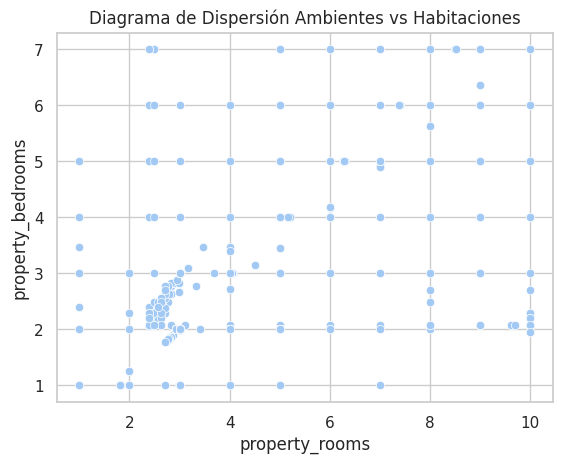

In [ ]:
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones")
plt.show()

En el analisis univariado solucionamos los outliers imposibles.  

In [ ]:
ds_train[(ds_train['property_rooms'] < ds_train['property_bedrooms'])]

id  start_date    end_date created_on  \
435163  nEIiRl3eCOjQrXmnfgEl8w==  2021-08-25  2021-12-09 2021-08-25   
446881  FCKQIqoZzcZ7V9FAbGTc7g==  2021-05-22  2021-06-07 2021-05-22   
347315  WEJXNsXZ0AcnqQRbnxgLEw==  2021-09-30  2022-01-27 2021-09-30   
115166  +m3+nsAwQ9Us0fjB6pJ8Mg==  2021-12-07  2022-01-27 2021-12-07   
458670  naEatqtTCG8ALXICib4ZxQ==  2021-01-05  2022-08-12 2021-01-05   
...                          ...         ...         ...        ...   
395126  NbR1tY7TfgYah0FfWgZSLw==  2021-02-13  2021-03-01 2021-02-13   
76073   Jt/9lF6VB8kH44uAfH5YoA==  2021-07-17  2021-07-18 2021-07-17   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
115489  BtICH9RxtgHdJDZ+32rCdA==  2021-12-07  2022-01-27 2021-12-07   
357373  0Cx8DNFG2VczH79R6SsM7Q==  2021-06-29  2021-11-19 2021-06-29   

          latitud   longitud           place_l3 property_type  property_rooms  \
435163 -34.555071 -58.464449              Nuñez          Casa        2.484907   
446881 -34.629273 -58.418845              Boedo          Casa        2.484907   
347315 -34.634550 -58.472085           Floresta          Casa        2.397895   
115166 -34.620586 -58.439740          Caballito            PH        2.000000   
458670 -34.577390 -58.475421      Villa Urquiza            PH        5.000000   
...           ...        ...                ...           ...             ...   
395126 -34.659578 -58.436102      Villa Soldati          Casa        5.000000   
76073  -34.599605 -58.467986           Paternal          Casa        2.000000   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
115489 -34.613261 -58.361513      Puerto Madero  Departamento        3.000000   
357373 -34.621352 -58.463325             Flores          Casa        2.484907   

        property_bedrooms  property_surface_total  property_surface_covered  \
435163                4.0              422.176754                     350.0   
446881                7.0              500.000000                     500.0   
347315                6.0              486.000000                     424.0   
115166                3.0              140.000000                     140.0   
458670                6.0              125.000000                     100.0   
...                   ...                     ...                       ...   
395126                6.0              223.000000                     215.0   
76073                 3.0              176.000000                     108.0   
387679                7.0              250.000000                     250.0   
115489                4.0              170.000000                     166.0   
357373                3.0              504.362257                     440.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
435163       1050000.0             2.135558              2.135558  
446881        450000.0             5.171340              5.171340  
347315        880000.0             4.159413              4.159413  
115166        215000.0             1.123631              1.123631  
458670        265000.0             4.159413              4.159413  
...                ...                  ...                   ...  
395126        239000.0             4.159413              4.159413  
76073         190000.0             1.123631              1.123631  
387679        212000.0             5.171340              5.171340  
115489       1250000.0             2.135558              2.135558  
357373        650000.0             1.123631              1.123631  

[131 rows x 15 columns]

Tenemos 130 registros en los que el número de habitaciones es mayor que el de ambientes.

In [ ]:
# Caso: más habitaciones que ambientes
condition= (ds_train['property_rooms'] < ds_train['property_bedrooms'])
ds_train[condition]

id  start_date    end_date created_on  \
435163  nEIiRl3eCOjQrXmnfgEl8w==  2021-08-25  2021-12-09 2021-08-25   
446881  FCKQIqoZzcZ7V9FAbGTc7g==  2021-05-22  2021-06-07 2021-05-22   
347315  WEJXNsXZ0AcnqQRbnxgLEw==  2021-09-30  2022-01-27 2021-09-30   
115166  +m3+nsAwQ9Us0fjB6pJ8Mg==  2021-12-07  2022-01-27 2021-12-07   
458670  naEatqtTCG8ALXICib4ZxQ==  2021-01-05  2022-08-12 2021-01-05   
...                          ...         ...         ...        ...   
395126  NbR1tY7TfgYah0FfWgZSLw==  2021-02-13  2021-03-01 2021-02-13   
76073   Jt/9lF6VB8kH44uAfH5YoA==  2021-07-17  2021-07-18 2021-07-17   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
115489  BtICH9RxtgHdJDZ+32rCdA==  2021-12-07  2022-01-27 2021-12-07   
357373  0Cx8DNFG2VczH79R6SsM7Q==  2021-06-29  2021-11-19 2021-06-29   

          latitud   longitud           place_l3 property_type  property_rooms  \
435163 -34.555071 -58.464449              Nuñez          Casa        2.484907   
446881 -34.629273 -58.418845              Boedo          Casa        2.484907   
347315 -34.634550 -58.472085           Floresta          Casa        2.397895   
115166 -34.620586 -58.439740          Caballito            PH        2.000000   
458670 -34.577390 -58.475421      Villa Urquiza            PH        5.000000   
...           ...        ...                ...           ...             ...   
395126 -34.659578 -58.436102      Villa Soldati          Casa        5.000000   
76073  -34.599605 -58.467986           Paternal          Casa        2.000000   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
115489 -34.613261 -58.361513      Puerto Madero  Departamento        3.000000   
357373 -34.621352 -58.463325             Flores          Casa        2.484907   

        property_bedrooms  property_surface_total  property_surface_covered  \
435163                4.0              422.176754                     350.0   
446881                7.0              500.000000                     500.0   
347315                6.0              486.000000                     424.0   
115166                3.0              140.000000                     140.0   
458670                6.0              125.000000                     100.0   
...                   ...                     ...                       ...   
395126                6.0              223.000000                     215.0   
76073                 3.0              176.000000                     108.0   
387679                7.0              250.000000                     250.0   
115489                4.0              170.000000                     166.0   
357373                3.0              504.362257                     440.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
435163       1050000.0             2.135558              2.135558  
446881        450000.0             5.171340              5.171340  
347315        880000.0             4.159413              4.159413  
115166        215000.0             1.123631              1.123631  
458670        265000.0             4.159413              4.159413  
...                ...                  ...                   ...  
395126        239000.0             4.159413              4.159413  
76073         190000.0             1.123631              1.123631  
387679        212000.0             5.171340              5.171340  
115489       1250000.0             2.135558              2.135558  
357373        650000.0             1.123631              1.123631  

[131 rows x 15 columns]

Varios de estos registros tienen valores irracionales para una habitación (2.397... en vez de números enteros) y podrían haber sido resultados de imputaciones y transformaciones anteriores.
Una solución podría ser copiar los valores de habitaciones a ambientes, pero previniendo que algunos puedan ser valores verdaderos y para que no se pierdan, probaremos invirtiendo las columnas de estos casos en específico ya que muchos tienen sentido de esa manera (casas con 6 ambientes y 4 habitaciones, departamentos de 2 ambientes y una habitación, por dar unos ejemplos). Es un cambio riesgoso pero se tendrá en cuenta por si llegara a haber discrepancias en resultados futuros.

In [ ]:
# Creamos una máscara booleana para nuestra condición
mask = ds_train['property_rooms'] < ds_train['property_bedrooms']

# Invertimos los valores usando la máscara
ds_train.loc[mask, ['property_rooms', 'property_bedrooms']] = ds_train.loc[mask, ['property_bedrooms', 'property_rooms']].values


In [ ]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
89489   6iQtmcGaWGarTIP6napDzA==  2021-05-14  2021-06-05 2021-05-14   
203006  H9wTldjozQrmEWDoyADKMg==  2021-07-24  2021-11-03 2021-07-24   
12640   jFhNkPF2x2KS1B8CVd1/PA==  2021-07-06  2021-12-15 2021-07-06   
146361  xrT9pdhOLwZN0Q1J9N/UPg==  2021-08-19  2022-07-02 2021-08-19   
38077   e2cW0CGqKRbaH5w5VORanA==  2021-07-05  9999-12-31 2021-07-05   
...                          ...         ...         ...        ...   
271208  2IZbKDc95KKtOfP5YzETSA==  2021-07-13  2021-07-14 2021-07-13   
457366  addYhPIIGDmKeww0LFYSTg==  2021-05-08  2021-06-05 2021-05-08   
372213  rveI+SmujzZkFyUAjyIGGQ==  2021-08-24  2021-08-24 2021-08-24   
301648  mtpUHpAUZ4hE/PR4Bevnxw==  2021-08-10  2021-09-15 2021-08-10   
204107  AN09t0cj6CnyV9CYFqPsTg==  2021-05-10  2021-06-05 2021-05-10   

          latitud   longitud          place_l3 property_type  property_rooms  \
89489  -34.596868 -58.383801          Recoleta  Departamento            10.0   
203006 -34.609373 -58.396092         Balvanera  Departamento             7.0   
12640  -34.603268 -58.377549       San Nicolás  Departamento             7.0   
146361 -34.621572 -58.521443        Villa Real            PH             6.0   
38077  -34.594483 -58.380075            Retiro  Departamento             9.0   
...           ...        ...               ...           ...             ...   
271208 -34.602308 -58.462373          Paternal          Casa             7.0   
457366 -34.631404 -58.403266  Parque Patricios          Casa             7.0   
372213 -34.574127 -58.479163     Villa Urquiza          Casa             7.0   
301648 -34.593316 -58.377201            Retiro  Departamento             9.0   
204107 -34.590275 -58.383917          Recoleta  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
89489                 6.0                   388.0                     311.0   
203006                6.0                   219.0                     219.0   
12640                 6.0                   247.0                     247.0   
146361                6.0                   151.0                     108.0   
38077                 6.0                   320.0                     320.0   
...                   ...                     ...                       ...   
271208                6.0                   200.0                     200.0   
457366                6.0                   280.0                     230.0   
372213                6.0                   282.0                     282.0   
301648                7.0                   380.0                     350.0   
204107                6.0                   379.0                     379.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
89489         650000.0             4.159413              4.159413  
203006        350000.0             4.159413              4.159413  
12640         200000.0             4.159413              4.159413  
146361        315000.0             4.159413              4.159413  
38077         520000.0             4.159413              4.159413  
...                ...                  ...                   ...  
271208        330000.0             4.159413              4.159413  
457366        426000.0             4.159413              4.159413  
372213        400000.0             4.159413              4.159413  
301648        650000.0             5.171340              5.171340  
204107       1150000.0             4.159413              4.159413  

[259 rows x 15 columns]

267 registros permanecen como outliers.

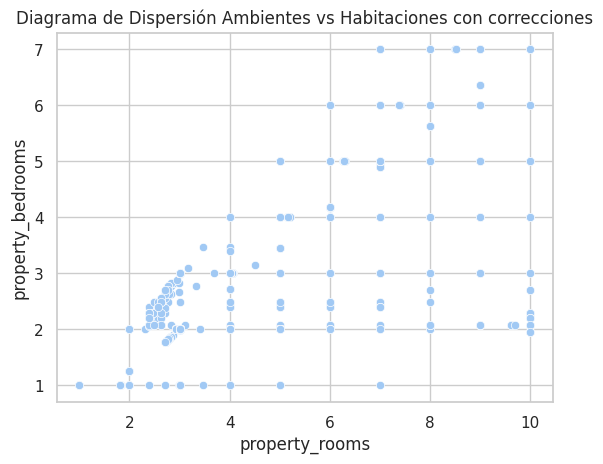

In [ ]:
# Visualización después de correcciones
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones con correcciones")
plt.show()


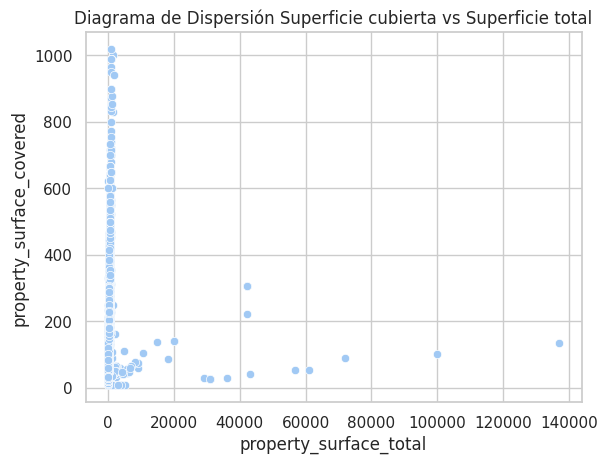

In [ ]:
sns.scatterplot(y=ds_train["property_surface_covered"], x=df["property_surface_total"])
plt.title("Diagrama de Dispersión Superficie cubierta vs Superficie total")
plt.show()

En primer lugar, vamos a distinguir los casos triviales donde la superficie cubierta es mayor a la superficie total.

In [ ]:
# Casos donde la superficie cubierta es mayor a la total
ds_train[(ds_train['property_surface_total'] < ds_train['property_surface_covered'])]

id  start_date    end_date created_on  \
182205  v5NfrN+68lhwxAlp5mjlFw==  2021-08-06  2022-05-08 2021-08-06   
201468  8jYjdlkwNW+QVGTdd4j2Qw==  2021-11-15  2022-01-15 2021-11-15   
78370   jF/fZIePy83R5XK/unOklg==  2021-11-10  2022-01-25 2021-11-10   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
365106  jMXR0OsLHb39TWl9ebzYBw==  2021-04-10  2021-06-05 2021-04-10   
...                          ...         ...         ...        ...   
73623   zF0WlWRmPCI5wBgjtWtiOg==  2021-12-06  2021-12-23 2021-12-06   
394550  g71CVVDHEOpv7j5KuOyMLQ==  2021-02-13  2021-05-10 2021-02-13   
447958  wAVEaRnrXlNw5V7uA+7rGw==  2021-05-22  2021-06-05 2021-05-22   
96129   +cXs7hTCbMnccH6n5OLoNA==  2021-07-02  9999-12-31 2021-07-02   
38374   MYqxXyyEoxlQ4RgMKi93xw==  2021-07-05  9999-12-31 2021-07-05   

          latitud   longitud          place_l3 property_type  property_rooms  \
182205 -34.627059 -58.445419         Caballito  Departamento             3.0   
201468 -34.607234 -58.482215  Villa del Parque          Casa             5.0   
78370  -34.553364 -58.438450          Belgrano            PH             3.0   
313745 -34.649174 -58.413106           Pompeya            PH             6.0   
365106 -34.621211 -58.422309           Almagro  Departamento             6.0   
...           ...        ...               ...           ...             ...   
73623  -34.624582 -58.437626         Caballito  Departamento             4.0   
394550 -34.623619 -58.494258          Floresta          Casa             4.0   
447958 -34.560106 -58.458265          Belgrano            PH             5.0   
96129  -34.623213 -58.419315             Boedo  Departamento             3.0   
38374  -34.586916 -58.452582         Chacarita  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
182205                2.0               40.000000                 48.662749   
201468                3.0              172.000000                190.825107   
78370                 1.0               90.000000                 94.784584   
313745                2.0                9.103646                 74.540000   
365106                4.0              110.000000                177.409733   
...                   ...                     ...                       ...   
73623                 3.0              119.000000                119.348585   
394550                3.0               75.000000                102.000000   
447958                4.0              134.000000                151.860822   
96129                 2.0               52.000000                 55.820299   
38374                 2.0               56.000000                 57.000000   

        property_price  z_property_bedrooms  zm_property_bedrooms  
182205         82000.0             0.111704              0.111704  
201468        260000.0             1.123631              1.123631  
78370         220000.0            -0.900224             -0.900224  
313745        125000.0             0.111704              0.111704  
365106        210000.0             2.135558              2.135558  
...                ...                  ...                   ...  
73623         348000.0             1.123631              1.123631  
394550        195000.0             1.123631              1.123631  
447958        340000.0             2.135558              2.135558  
96129         120000.0             0.111704              0.111704  
38374         115000.0             0.111704              0.111704  

[631 rows x 15 columns]

**Isolation forest**

In [ ]:
# Cargo los datos
X =ds_train.copy()
X.head()

id  start_date    end_date created_on  \
383306  R0XtDXoFG7M4+e3GXz6/hw==  2021-04-27  2021-05-13 2021-04-27   
113494  paHtTc3maD9aa5logktjLQ==  2021-06-09  2022-06-03 2021-06-09   
235485  LHLKFOA3jnFpRfgyIZr1tg==  2021-06-02  2021-06-12 2021-06-02   
303208  HzdKVUadbgWKfr16PE84Ww==  2021-08-26  2021-11-03 2021-08-26   
201667  smr7cTzVTmuq599mjicjsQ==  2021-11-15  2021-12-28 2021-11-15   

          latitud   longitud      place_l3 property_type  property_rooms  \
383306 -34.603058 -58.507786  Villa Devoto  Departamento             3.0   
113494 -34.603988 -58.415864       Almagro  Departamento             1.0   
235485 -34.596416 -58.444260  Villa Crespo  Departamento             3.0   
303208 -34.600071 -58.436597  Villa Crespo  Departamento             2.0   
201667 -34.590463 -58.422436       Palermo  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
383306                2.0                   110.0                      93.0   
113494                1.0                    23.0                      23.0   
235485                2.0                    51.0                      50.0   
303208                1.0                    44.0                      40.0   
201667                1.0                    57.0                      53.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
383306        260000.0             0.111704              0.111704  
113494         54900.0            -0.900224             -0.900224  
235485         68000.0             0.111704              0.111704  
303208         95000.0            -0.900224             -0.900224  
201667        199800.0            -0.900224             -0.900224

In [ ]:
# Limpio el dataset
X.drop(columns=['latitud', 'longitud', 'created_on', 'end_date', 'start_date', 'z_property_bedrooms', 'zm_property_bedrooms'], inplace=True)
X.head()

id      place_l3 property_type  property_rooms  \
383306  R0XtDXoFG7M4+e3GXz6/hw==  Villa Devoto  Departamento             3.0   
113494  paHtTc3maD9aa5logktjLQ==       Almagro  Departamento             1.0   
235485  LHLKFOA3jnFpRfgyIZr1tg==  Villa Crespo  Departamento             3.0   
303208  HzdKVUadbgWKfr16PE84Ww==  Villa Crespo  Departamento             2.0   
201667  smr7cTzVTmuq599mjicjsQ==       Palermo  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
383306                2.0                   110.0                      93.0   
113494                1.0                    23.0                      23.0   
235485                2.0                    51.0                      50.0   
303208                1.0                    44.0                      40.0   
201667                1.0                    57.0                      53.0   

        property_price  
383306        260000.0  
113494         54900.0  
235485         68000.0  
303208         95000.0  
201667        199800.0

In [ ]:
# Label encoding de los nombres de las ciudades y el tipo de propiedad

label_encoder = LabelEncoder()
X['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
ds_train['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
X['type_encoded'] = label_encoder.fit_transform(X['property_type'])
ds_train['type_encoded'] = label_encoder.fit_transform(X['place_l3'])

X

<ipython-input-406-64ff5b082a66>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-406-64ff5b082a66>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id      place_l3 property_type  property_rooms  \
383306  R0XtDXoFG7M4+e3GXz6/hw==  Villa Devoto  Departamento             3.0   
113494  paHtTc3maD9aa5logktjLQ==       Almagro  Departamento             1.0   
235485  LHLKFOA3jnFpRfgyIZr1tg==  Villa Crespo  Departamento             3.0   
303208  HzdKVUadbgWKfr16PE84Ww==  Villa Crespo  Departamento             2.0   
201667  smr7cTzVTmuq599mjicjsQ==       Palermo  Departamento             2.0   
...                          ...           ...           ...             ...   
393524  ZiYW1J2pRzgAUnxNS/IsLQ==  Monte Castro            PH             3.0   
233054  I3i4O/m4u2YnmTQL35JGJQ==       Palermo  Departamento             2.0   
378137  PK2uEnPlPU19XNFfaLGmtA==    Villa Luro  Departamento             1.0   
86207   nci6gPryf/Of3iuykX3yQw==     San Telmo  Departamento             6.0   
408486  TM13eK6R421Utco6S5X6rg==     San Telmo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
383306                2.0                   110.0                      93.0   
113494                1.0                    23.0                      23.0   
235485                2.0                    51.0                      50.0   
303208                1.0                    44.0                      40.0   
201667                1.0                    57.0                      53.0   
...                   ...                     ...                       ...   
393524                2.0                    98.0                      74.0   
233054                1.0                    48.0                      48.0   
378137                1.0                    75.0                      34.0   
86207                 5.0                   207.0                     207.0   
408486                2.0                   108.0                     108.0   

        property_price  place_encoded  type_encoded  
383306        260000.0             47             1  
113494         54900.0              2             1  
235485         68000.0             46             1  
303208         95000.0             46             1  
201667        199800.0             27             1  
...                ...            ...           ...  
393524        129900.0             24             2  
233054         82000.0             27             1  
378137        102500.0             50             1  
86207         340000.0             42             1  
408486        135000.0             42             1  

[72211 rows x 10 columns]

In [ ]:
X.drop(columns=['place_l3', 'property_type', 'id'], inplace=True)

In [ ]:
# Creo el modelo
iforest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=5,
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)

# Entreno y genero la predicción
pred = iforest.fit_predict(X)

# Almaceno scores y etiquetas
X["scores"] = iforest.decision_function(X)
X["outlier_label"] = pred

# Observaciones anómalas
X[X.outlier_label == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



property_rooms  property_bedrooms  property_surface_total  \
82225         7.000000           3.000000                   318.0   
229380        4.000000           2.000000                   220.0   
175118        7.000000           5.000000                   360.0   
62612         6.000000           4.000000                   230.0   
151271        7.000000           5.000000                   360.0   
...                ...                ...                     ...   
457717        6.000000           3.000000                   330.0   
68261         8.000000           5.000000                   976.0   
83048         2.773533           1.822918                   365.0   
204107        6.000000           6.000000                   379.0   
46471         6.000000           3.000000                   276.0   

        property_surface_covered  property_price  place_encoded  type_encoded  \
82225                      318.0       1900000.0             36             1   
229380                     220.0       1680000.0             35             1   
175118                     300.0        750000.0             18             0   
62612                      143.0        220000.0             47             2   
151271                     250.0        365000.0             10             0   
...                          ...             ...            ...           ...   
457717                     300.0       1250000.0             37             1   
68261                      650.0       1500000.0              7             0   
83048                      365.0        650000.0             27             0   
204107                     379.0       1150000.0             36             1   
46471                      276.0       1500000.0             27             1   

          scores  outlier_label  
82225  -0.069188             -1  
229380 -0.011739             -1  
175118 -0.082241             -1  
62612  -0.018695             -1  
151271 -0.063173             -1  
...          ...            ...  
457717 -0.032692             -1  
68261  -0.178238             -1  
83048  -0.076309             -1  
204107 -0.084288             -1  
46471  -0.026206             -1  

[3611 rows x 9 columns]

In [ ]:
# Cantidad de obs. anómalas
X.outlier_label.value_counts()

outlier_label
 1    68600
-1     3611
Name: count, dtype: int64

Obtuvimos 3611 anomalías. Visualizamos.

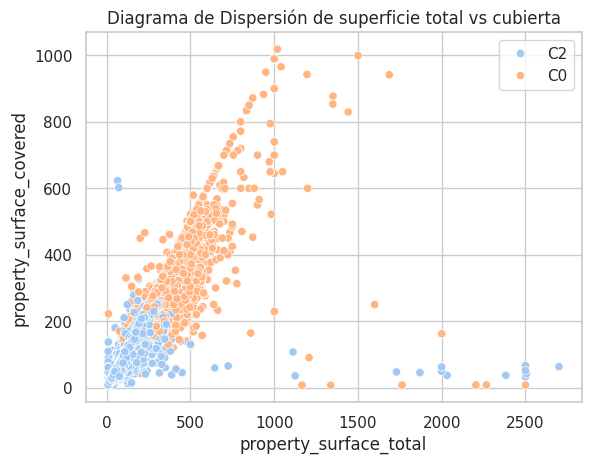

In [ ]:
# Grafico dispersograma
color = [f"C{n+1}" for n in (X["outlier_label"].values)]

sns.scatterplot(x=X["property_surface_total"], y=X["property_surface_covered"], hue=color)
plt.title("Diagrama de Dispersión de superficie total vs cubierta")
plt.show()

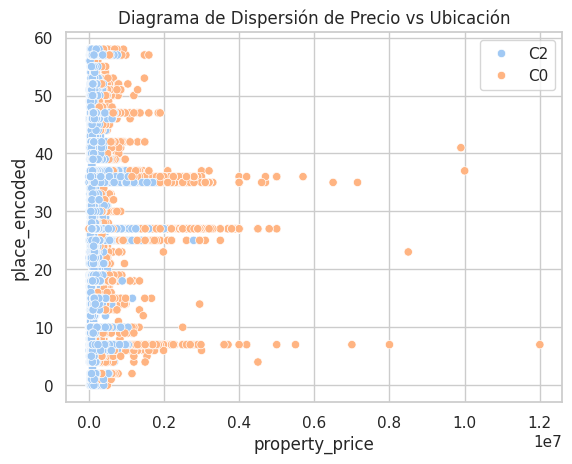

In [ ]:
sns.scatterplot(x=X["property_price"], y=X["place_encoded"], hue=color)
plt.title("Diagrama de Dispersión de Precio vs Ubicación")
plt.show()

In [ ]:
# # Selecciono el árbol
# estimator = iforest.estimators_[5]

# # Grafico
# plt.figure(figsize=(25, 25))
# sk.tree.plot_tree(estimator, feature_names=X.columns, filled=True, max_depth=3)
# plt.show()

PENDIENTE no se que hacer con estos resultados :))))

**LOF**

Vamos a intentar detectar outliers multivariados usando LOF.

In [ ]:
def lof(df, var1, var2, name):
  radius = calculo_lof(df, var1, var2, name)
  grafico_lof(df, var1, var2, name, radius)
  return


def calculo_lof(df, var1, var2, name):
  # CÁLCULO
  # Conjunto de entrenamiento
  X = df[[var1, var2]].values

  # Creo el clasificador
  clf = LocalOutlierFactor(n_neighbors=20)

  # Genero prediccion
  y_pred = clf.fit_predict(X)

  # Guardo los scores
  df[name] = clf.negative_outlier_factor_

  #VISUALIZACION
  # Calculo radio para plotear score
  radius = (df[name].max() - df[name]) / (df[name].max() - df[name].min())
  return radius


def grafico_lof(df, var1, var2, name, radius):
  # Grafico LOF
  plt.figure(figsize=(10, 10))
  plt.title("Local Outlier Factor (LOF)" + name)
  plt.scatter(
      df[var1].values,
      df[var2].values,
      edgecolor="grey",
      s=30,
      label="datos",
      facecolors="none",
  )
  plt.scatter(
      df[var1].values,
      df[var2].values,
      s=1300 * radius,
      edgecolors="red",
      facecolors="none",
      label="Outlier scores",
  )
  legend = plt.legend(loc="upper left")
  legend.legendHandles[0]._sizes = [10]
  legend.legendHandles[1]._sizes = [20]
  plt.show()
  return

In [ ]:
def lof_per_barrio(df, var1, var2, name):
  # Lista de barrios
  barrios = ['Coghlan','Colegiales','Abasto','Nuñez','Constitución',
              'Boedo', 'San Nicolás', 'Retiro', 'Liniers', 'Almagro',
              'Boca', 'Palermo', 'Balvanera','Barracas', 'Caballito',
              'Villa Ortuzar', 'Villa Luro', 'Puerto Madero', 'Pompeya', 'Saavedra',
              'Parque Chacabuco', 'Belgrano', 'Recoleta', 'Floresta', 'Monserrat',
              'Villa del Parque', 'San Telmo', 'Villa Crespo', 'Tribunales', 'Once',
              'Barrio Norte', 'Villa Lugano', 'Congreso', 'Villa Urquiza', 'Mataderos',
              'Villa Devoto', 'Recoleta', 'San Cristobal', 'Villa Pueyrredon', 'Congreso']

  # Subplots
  fig, axs = plt.subplots(8, 5, figsize=(16, 24))
  axs = axs.flatten()

  for i, barrio in enumerate(barrios):
      filtered_data = ds_train[ds_train['place_l3'] == barrio]

      # CÁLCULO
      # Conjunto de entrenamiento
      X = filtered_data[var1,var2].values
      # Creo el clasificador
      clf = LocalOutlierFactor(n_neighbors=20)
      # Genero prediccion
      y_pred = clf.fit_predict(X)
      # Guardo los scores
      filtered_data[name] = clf.negative_outlier_factor_

      #VISUALIZACION
      # Calculo radio para plotear score
      radius = (filtered_data[name].max() - filtered_data[name]) / (filtered_data[name].max() - filtered_data[name].min())

      # Grafico LOF
      plt.figure(figsize=(10, 10))
      plt.scatter(
          filtered_data[var1].values,
          filtered_data[var2].values,
          edgecolor="grey",
          s=30,
          label="datos",
          facecolors="none",
      )
      plt.scatter(
          filtered_data[var1].values,
          filtered_data[var2].values,
          s=1300 * radius,
          edgecolors="red",
          facecolors="none",
          label="Outlier scores",
      )
      legend = plt.legend(loc="upper left")
      legend.legendHandles[0]._sizes = [10]
      legend.legendHandles[1]._sizes = [20]


      axs[i].set_title(f'{var1}, {var2} en {barrio}')

  # Adjust layout
  plt.tight_layout()
  # Show the plot
  plt.show()
  return

#### Superficie cubierta vs superficie total

<ipython-input-413-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-413-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-413-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



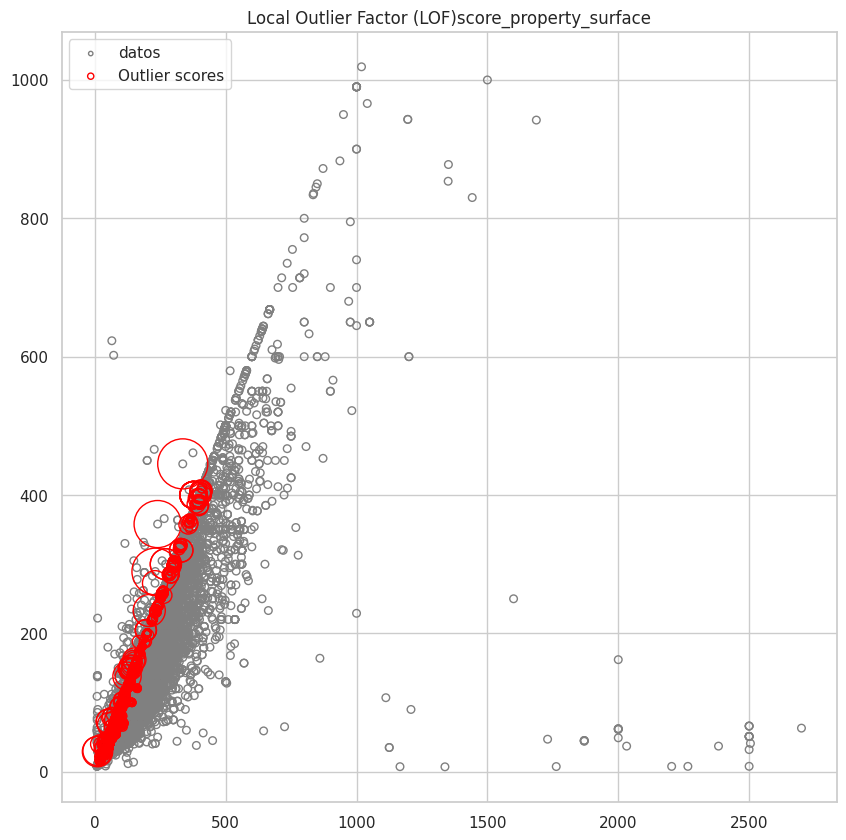

In [ ]:
lof(ds_train, 'property_surface_total', 'property_surface_covered', 'score_property_surface')

Precio vs Superficie total

<ipython-input-413-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-413-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-413-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



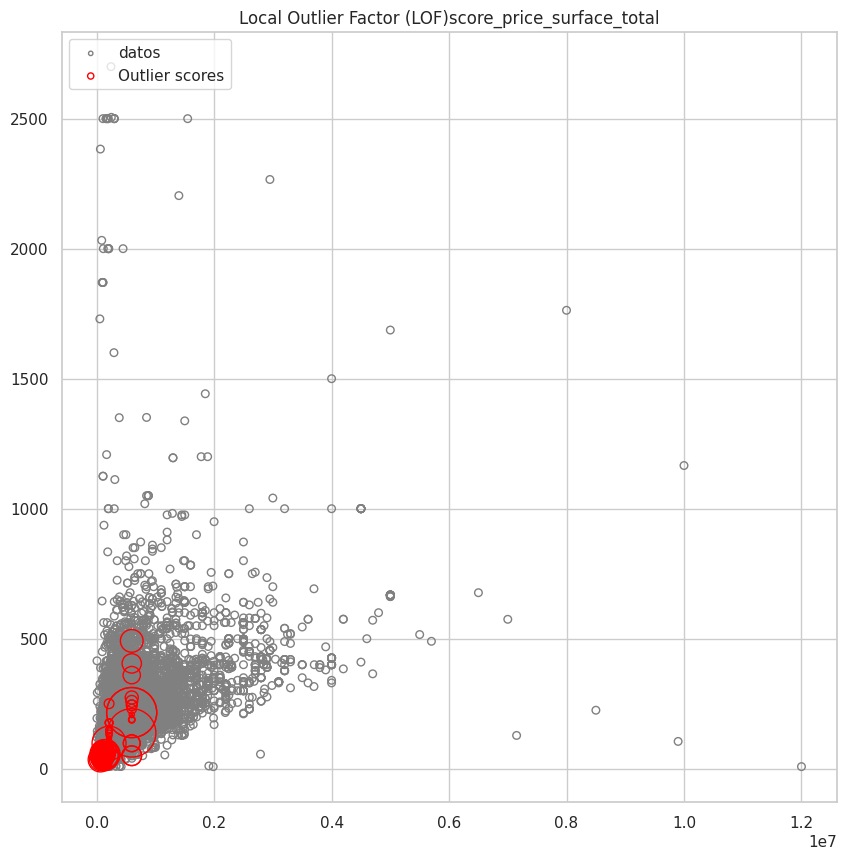

In [ ]:
lof(ds_train, 'property_price', 'property_surface_total', 'score_price_surface_total')

<ipython-input-413-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-413-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-413-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



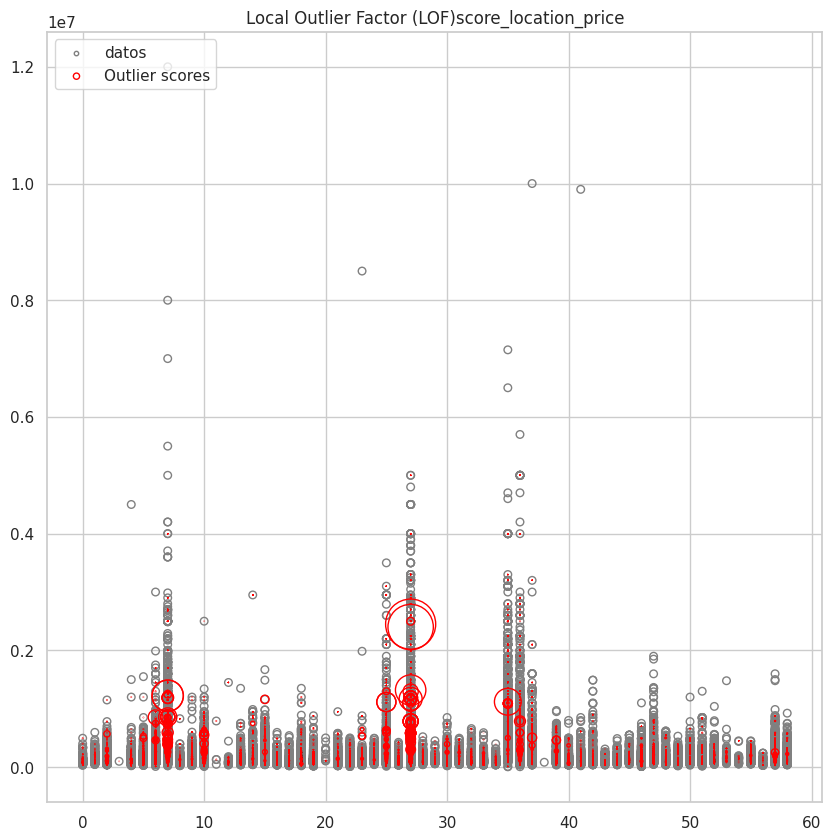

In [ ]:
lof(ds_train, 'place_encoded', 'property_price', 'score_location_price')

<ipython-input-413-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-413-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-413-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



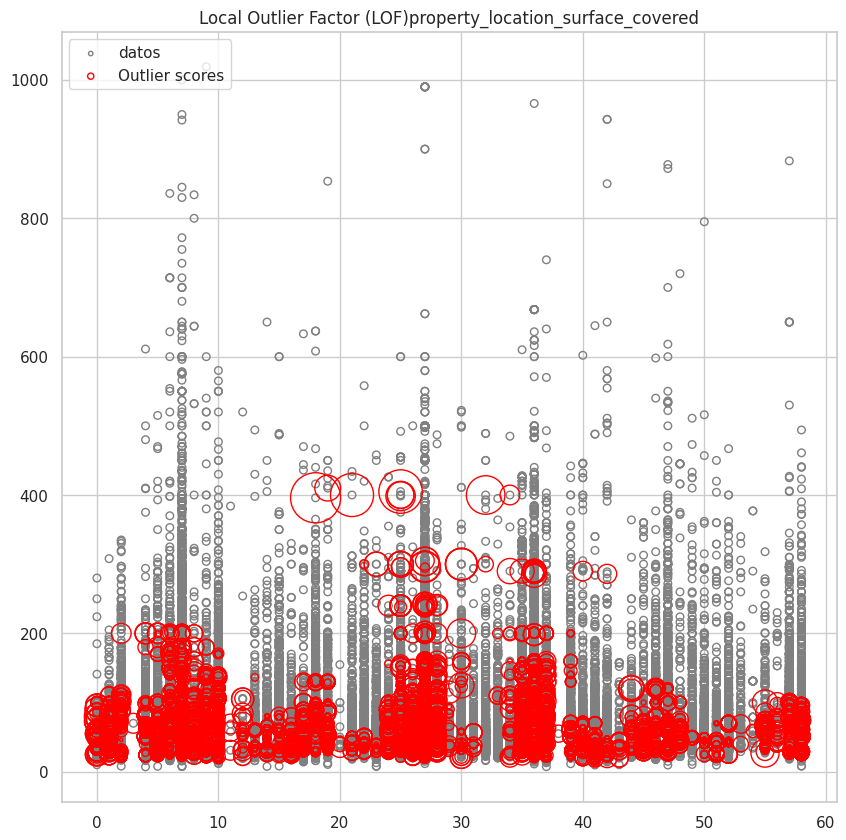

In [ ]:
lof(ds_train, 'place_encoded', 'property_surface_covered', 'property_location_surface_covered')

### Relación precio de venta-metros de superficie



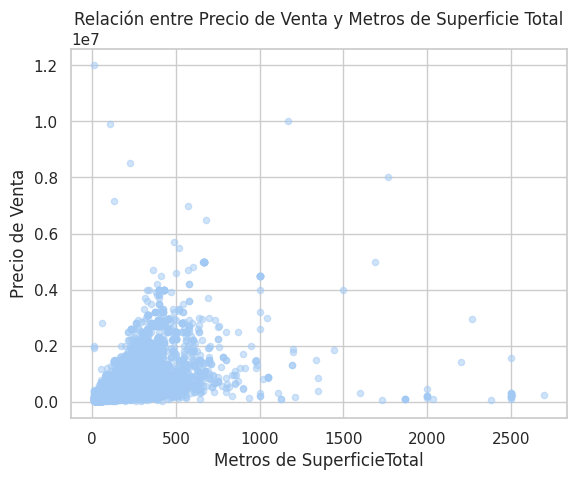

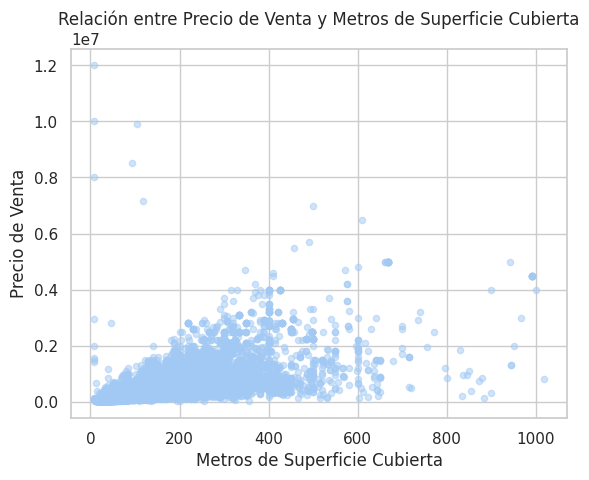

In [ ]:
ds_train.plot.scatter(x='property_surface_total', y='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Total')
plt.xlabel('Metros de SuperficieTotal')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()


ds_train.plot.scatter(x='property_surface_covered', y='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Cubierta')
plt.xlabel('Metros de Superficie Cubierta')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

Podemos ver algunos datos atípicos donde a pesar de muchos precios de superficie, el precio es demasiado bajo, y su opuesto, precio muy alto para supercie muy limitada.

PENDIENTE